In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from prophet import Prophet
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import logging
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # For formatting axes if needed
import os # Import os module for directory operations
import re # Import re for cleaning filenames

# Suppress excessive logging and warnings
warnings.filterwarnings('ignore')
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

In [2]:
raw_data = pd.read_excel('data_tphcm_regression.xlsx')
raw_data.head()

Năm  Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)  \
0  2019                                              12647   
1  2020                                              12976   
2  2021                                              12940   
3  2022                                              13332   
4  2023                                              13468   

   Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)  \
0                                            96484   
1                                            97583   
2                                            98504   
3                                            99468   
4                                           100309   

   Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)  \
0                                          13.1   
1                                          13.3   
2                                          13.1   
3                                          13.4   
4                                          13.4   

   Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7)  \
0                                               6908                   
1                                               6765                   
2                                               6517                   
3                                               6891                   
4                                               7125                   

   Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8)  \
0                                              54659                 
1                                              53610                 
2                                              49072                 
3                                              50605                 
4                                              51287                 

   Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9)  \
0                                               12.6              
1                                               12.6              
2                                               13.3              
3                                               13.6              
4                                               13.9              

   Quy mô GRDP (GDP) giá hiện hành HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 10)  \
0                                            2051780                         
1                                            2055017                         
2                                            2067397                         
3                                            2346329                         
4                                            2500589                         

   Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)  \
0                                            7707200                       
1                                            8044386                       
2                                            8487476                       
3                                            9548738                       
4                                           10221815                       

   Quy mô GRDP (GDP) giá hiện hành HCM(n)/Cả nước (Đơn vị: %) (Mã số: 12)  \
0                                               26.6                        
1                                               25.5                        
2                                               24.4                        
3                                               24.6                        
4                                               24.5                        

   ...  Số DN đang hoạt động (31/12) HCM(n)/Cả nước (Đơn vị: %) (Mã số: 39)  \
0  ...                                               37.1                     
1  ...                                               37.0                     
2  ...                                               37.0                     
3  ...                               

In [3]:
# # Remove unneeded columns
# raw_data = raw_data.drop(columns=[
#     'Tỷ lệ lao động qua đào tạo trên địa bàn tỉnh', 
#     'Tỷ lệ lao động qua đào tạo có bằng cấp, chứng chỉ', 
#     'Tỷ lệ hộ dân sử dụng nước sạch', 
#     'Tỷ lệ hộ đô thị sử dụng nước sạch', 
#     'Tỷ lệ hộ nông thôn sử dụng nước sạch', 
#     'Tỷ lệ thu gom chất thải rắn sinh hoạt đô thị',
#     'Tỷ lệ thu gom chất thải rắn sinh hoạt nông thôn',
#     'Tỷ lệ che phủ rừng',
#     ])

In [4]:
raw_data

Năm  Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)  \
0  2019                                              12647   
1  2020                                              12976   
2  2021                                              12940   
3  2022                                              13332   
4  2023                                              13468   

   Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)  \
0                                            96484   
1                                            97583   
2                                            98504   
3                                            99468   
4                                           100309   

   Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)  \
0                                          13.1   
1                                          13.3   
2                                          13.1   
3                                          13.4   
4                                          13.4   

   Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7)  \
0                                               6908                   
1                                               6765                   
2                                               6517                   
3                                               6891                   
4                                               7125                   

   Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8)  \
0                                              54659                 
1                                              53610                 
2                                              49072                 
3                                              50605                 
4                                              51287                 

   Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9)  \
0                                               12.6              
1                                               12.6              
2                                               13.3              
3                                               13.6              
4                                               13.9              

   Quy mô GRDP (GDP) giá hiện hành HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 10)  \
0                                            2051780                         
1                                            2055017                         
2                                            2067397                         
3                                            2346329                         
4                                            2500589                         

   Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)  \
0                                            7707200                       
1                                            8044386                       
2                                            8487476                       
3                                            9548738                       
4                                           10221815                       

   Quy mô GRDP (GDP) giá hiện hành HCM(n)/Cả nước (Đơn vị: %) (Mã số: 12)  \
0                                               26.6                        
1                                               25.5                        
2                                               24.4                        
3                                               24.6                        
4                                               24.5                        

   ...  Số DN đang hoạt động (31/12) HCM(n)/Cả nước (Đơn vị: %) (Mã số: 39)  \
0  ...                                               37.1                     
1  ...                                               37.0                     
2  ...                                               37.0                     
3  ...                               

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 46 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Năm                                                                                    5 non-null      int64  
 1   Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)                                      5 non-null      int64  
 2   Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)                                        5 non-null      int64  
 3   Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)                                           5 non-null      float64
 4   Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7)                      5 non-null      int64  
 5   Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8)                   

In [6]:
# df_vinh_long = raw_data[raw_data['Tỉnh'] == 'Vĩnh Long']
# df_vinh_long.head()

In [7]:
# df_ben_tre = raw_data[raw_data['Tỉnh'] == 'Bến Tre']
# df_ben_tre.head()

In [8]:
# df_tra_vinh = raw_data[raw_data['Tỉnh'] == 'Trà Vinh']
# df_tra_vinh.head()

In [9]:
# Define forecast years
forecast_years = np.arange(2024, 2031).reshape(-1, 1)
forecast_df = pd.DataFrame({'Năm': forecast_years.flatten()})

In [10]:
forecast_df

Năm
0  2024
1  2025
2  2026
3  2027
4  2028
5  2029
6  2030

In [11]:
# Identify features to forecast (all numeric columns except 'Năm')
features_to_forecast = raw_data.select_dtypes(include=np.number).columns.tolist()
features_to_forecast.remove('Năm')

In [12]:
features_to_forecast

['Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)',
 'Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)',
 'Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)',
 'Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7)',
 'Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8)',
 'Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9)',
 'Quy mô GRDP (GDP) giá hiện hành HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 10)',
 'Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)',
 'Quy mô GRDP (GDP) giá hiện hành HCM(n)/Cả nước (Đơn vị: %) (Mã số: 12)',
 'Quy mô GRDP (GDP) giá 2010 HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 13)',
 'Quy mô GRDP (GDP) giá 2010 Cả nước (Đơn vị: Tỷ đồng) (Mã số: 14)',
 'Quy mô GRDP (GDP) giá 2010 HCM(n)/Cả nước (Đơn vị: %) (Mã số: 15)',
 'Chỉ số phát triển GRDP HCM (New) (Đơn vị: %) (Mã số: 16)',
 'Chỉ số phát triển GRDP Cả nước (Đơn vị: %) (Mã số: 17)',
 'Chỉ số phát triển GRDP HCM(n)-Cả nước (Đơn vị: Điểm %) (Mã số: 18)',
 'Thu ngân sách 

In [13]:
all_forecasts = {}
all_forecasts

{}

In [14]:
# province_dfs = {
#     "Vĩnh Long": df_vinh_long,
#     "Bến Tre": df_ben_tre,
#     "Trà Vinh": df_tra_vinh
# }

In [15]:
# print("\n--- Merging Provinces and Forecasting ---")
# # Ensure 'Năm' is a column for merging, then set back to index for summing
# df_vinh_long_yr = df_vinh_long.reset_index()
# df_ben_tre_yr = df_ben_tre.reset_index()
# df_tra_vinh_yr = df_tra_vinh.reset_index()

In [16]:
# df_vinh_long_yr

In [17]:
# # Merge based on year, sum numeric columns
# df_merged = pd.merge(df_vinh_long_yr, df_ben_tre_yr, on=['Năm', 'Tỉnh'], how='outer', suffixes=('_VL', '_BT'))
# df_merged = pd.merge(df_merged, df_tra_vinh_yr, on=['Năm', 'Tỉnh'], how='outer', suffixes=('', '_TV'))

In [18]:
# df_merged.head()

In [19]:
# Group by year and sum all numeric columns (which should be the features)
df_merged_sum = raw_data.groupby('Năm')[features_to_forecast].sum().sort_index()
df_merged_sum.head()

Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)  \
Năm                                                       
2019                                              12647   
2020                                              12976   
2021                                              12940   
2022                                              13332   
2023                                              13468   

      Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)  \
Năm                                                     
2019                                            96484   
2020                                            97583   
2021                                            98504   
2022                                            99468   
2023                                           100309   

      Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)  \
Năm                                                  
2019                                          13.1   
2020                                          13.3   
2021                                          13.1   
2022                                          13.4   
2023                                          13.4   

      Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7)  \
Năm                                                                       
2019                                               6908                   
2020                                               6765                   
2021                                               6517                   
2022                                               6891                   
2023                                               7125                   

      Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8)  \
Năm                                                                     
2019                                              54659                 
2020                                              53610                 
2021                                              49072                 
2022                                              50605                 
2023                                              51287                 

      Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9)  \
Năm                                                                  
2019                                               12.6              
2020                                               12.6              
2021                                               13.3              
2022                                               13.6              
2023                                               13.9              

      Quy mô GRDP (GDP) giá hiện hành HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 10)  \
Năm                                                                             
2019                                            2051780                         
2020                                            2055017                         
2021                                            2067397                         
2022                                            2346329                         
2023                                            2500589                         

      Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)  \
Năm                                                                           
2019                                            7707200                       
2020                                            8044386                       
2021                                            8487476                       
2022                                            9548738                       
2023                                           10221815                       

      Quy mô GRDP (GDP) giá hiện hành HCM(n)/Cả nước (Đơn vị: %) (Mã số: 12)  \
Năm                                                                            
20

In [20]:
merged_forecasts_dict = {}

In [21]:
def forecast_linear_regression(series: pd.Series):
    """Forecasts using Linear Regression based on Year."""
    df = series.reset_index()
    df.columns = ['Năm', 'Value']

    # Prepare data for sklearn
    X_train = df['Năm'].values.reshape(-1, 1)
    y_train = df['Value'].values

    # Handle potential NaN/inf values if any exist before fitting
    if not np.all(np.isfinite(y_train)):
         print(f"Warning: Non-finite values found in series {series.name}. Skipping linear regression.")
         return pd.Series(index=forecast_years.flatten(), dtype=float)


    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    predictions = model.predict(forecast_years)
    return pd.Series(predictions, index=forecast_years.flatten())

def forecast_10_percent_growth(series: pd.Series):
    """Forecasts assuming 10% compound annual growth from the last value."""
    last_year = series.index.max()
    last_value = series.loc[last_year]

    # Handle potential NaN/inf values
    if not np.isfinite(last_value):
        print(f"Warning: Last value for {series.name} is non-finite. Cannot apply 10% growth.")
        return pd.Series(index=forecast_years.flatten(), dtype=float)


    forecast_values = []
    for year in forecast_years.flatten():
        growth_factor = 1.1 ** (year - last_year)
        forecast_values.append(last_value * growth_factor)
    return pd.Series(forecast_values, index=forecast_years.flatten())

def forecast_8_percent_growth(series: pd.Series):
    """Forecasts assuming 8% compound annual growth from the last value."""
    last_year = series.index.max()
    last_value = series.loc[last_year]

    if not np.isfinite(last_value):
        print(f"Warning: Last value for {series.name} is non‑finite. Cannot apply 8% growth.")
        return pd.Series(index=forecast_years.flatten(), dtype=float)

    forecast_values = [
        last_value * (1.08 ** (year - last_year))
        for year in forecast_years.flatten()
    ]
    return pd.Series(forecast_values, index=forecast_years.flatten())


def forecast_mixed_growth(series: pd.Series, switch_periods: int = 2):
    """
    Forecasts with 8% annual growth for the first `switch_periods` years,
    then 10% annual growth thereafter.
    """
    last_year = series.index.max()
    last_value = series.loc[last_year]

    if not np.isfinite(last_value):
        print(f"Warning: Last value for {series.name} is non‑finite. Cannot apply mixed growth.")
        return pd.Series(index=forecast_years.flatten(), dtype=float)

    values = []
    for year in forecast_years.flatten():
        delta = year - last_year
        if delta <= 0:
            values.append(np.nan)
        else:
            if delta <= switch_periods:
                # 8% for first `switch_periods` years
                values.append(last_value * (1.08 ** delta))
            else:
                # compound: 8% for first `switch_periods`, then 10% thereafter
                first_phase = last_value * (1.08 ** switch_periods)
                remaining = delta - switch_periods
                values.append(first_phase * (1.10 ** remaining))
    return pd.Series(values, index=forecast_years.flatten())

def forecast_exponential_smoothing(series: pd.Series) -> pd.Series:
    """Forecast using Exponential Smoothing Regression."""
    df = series.reset_index()
    df.columns = ['Năm', 'Value']

    # Use a simple additive trend component (no seasonality)
    model = ExponentialSmoothing(
        df['Value'], 
        trend='add',  # Additive trend component
        seasonal=None  # No seasonal component due to limited data
    ).fit()

    # Forecast the next values
    forecast_values = model.forecast(len(forecast_years))
    return forecast_values

    
def forecast_arima(series: pd.Series) -> pd.Series:
    """
    Forecast a time series with ARIMA.
    Falls back to a simpler (0,d,0) model if the default (1,d,1) fails.

    Returns a Series whose index == forecast_years.
    If the series is unusable, returns an all-NaN Series with the same index.
    """
    y = series.copy()
    d = 0

    if y.std() > 1e-9 and adfuller(y)[1] > 0.05:
        d = 1
        diff = y.diff().dropna()
        if diff.std() > 1e-9 and adfuller(diff)[1] > 0.05:
            d = 2

    for order in [(1, d, 1), (0, d, 0)]:
        try:
            fit = ARIMA(
                y, order=order,
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit()
            fc = fit.get_forecast(len(forecast_years)).predicted_mean
            fc.index = forecast_years.flatten()
            return fc
        except Exception:
            continue

    return pd.Series(index=forecast_years, dtype=float)


def forecast_prophet(series: pd.Series):
    """Forecasts using Facebook Prophet."""
    df = series.reset_index()
    df.columns = ['Năm', 'y']
    df['ds'] = pd.to_datetime(df['Năm'].astype(str) + '-12-31') # Use year-end for annual data

     # Handle potential NaN/inf values
    if not np.all(np.isfinite(df['y'].values)):
         print(f"Warning: Non-finite values found in series {series.name}. Skipping Prophet.")
         return pd.Series(index=forecast_years.flatten(), dtype=float)


    try:
        model = Prophet(growth='linear', yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
        model.fit(df[['ds', 'y']])

        # Create future dataframe
        future_dates = model.make_future_dataframe(periods=len(forecast_years), freq='A-DEC') # Annual frequency ending Dec 31st
        # Adjust future dates to match target years if needed
        future_dates['year'] = future_dates['ds'].dt.year
        future_dates = future_dates[future_dates['year'].isin(forecast_years.flatten())]


        # Predict
        forecast_result = model.predict(future_dates)
        predictions = forecast_result[['ds', 'yhat']].set_index('ds')['yhat']
        predictions.index = predictions.index.year # Use year as index
        # Ensure all forecast years are present, filling missing ones potentially with NaN
        predictions = predictions.reindex(forecast_years.flatten())
        return predictions
    except Exception as e:
        print(f"Error fitting Prophet for {series.name}: {e}")
        return pd.Series(index=forecast_years.flatten(), dtype=float)


In [22]:
df_merged_sum

Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)  \
Năm                                                       
2019                                              12647   
2020                                              12976   
2021                                              12940   
2022                                              13332   
2023                                              13468   

      Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)  \
Năm                                                     
2019                                            96484   
2020                                            97583   
2021                                            98504   
2022                                            99468   
2023                                           100309   

      Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)  \
Năm                                                  
2019                                          13.1   
2020                                          13.3   
2021                                          13.1   
2022                                          13.4   
2023                                          13.4   

      Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7)  \
Năm                                                                       
2019                                               6908                   
2020                                               6765                   
2021                                               6517                   
2022                                               6891                   
2023                                               7125                   

      Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8)  \
Năm                                                                     
2019                                              54659                 
2020                                              53610                 
2021                                              49072                 
2022                                              50605                 
2023                                              51287                 

      Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9)  \
Năm                                                                  
2019                                               12.6              
2020                                               12.6              
2021                                               13.3              
2022                                               13.6              
2023                                               13.9              

      Quy mô GRDP (GDP) giá hiện hành HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 10)  \
Năm                                                                             
2019                                            2051780                         
2020                                            2055017                         
2021                                            2067397                         
2022                                            2346329                         
2023                                            2500589                         

      Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)  \
Năm                                                                           
2019                                            7707200                       
2020                                            8044386                       
2021                                            8487476                       
2022                                            9548738                       
2023                                           10221815                       

      Quy mô GRDP (GDP) giá hiện hành HCM(n)/Cả nước (Đơn vị: %) (Mã số: 12)  \
Năm                                                                            
20

In [23]:
# first, make sure df_merged_sum has a 'Năm' column
df_merged_reset = df_merged_sum.reset_index()  # brings the PeriodIndex ‘Năm’ back as a column

# combine province-level and merged data into one dict
# all_inputs = {**province_dfs, 'Merged': df_merged_reset}
all_inputs = {'HCM': df_merged_reset}
all_forecasts = {}
all_inputs

{'HCM':     Năm  Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)  \
 0  2019                                              12647   
 1  2020                                              12976   
 2  2021                                              12940   
 3  2022                                              13332   
 4  2023                                              13468   
 
    Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)  \
 0                                            96484   
 1                                            97583   
 2                                            98504   
 3                                            99468   
 4                                           100309   
 
    Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)  \
 0                                          13.1   
 1                                          13.3   
 2                                          13.1   
 3                                          13.4   
 4                   

In [24]:
df_merged_reset

Năm  Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)  \
0  2019                                              12647   
1  2020                                              12976   
2  2021                                              12940   
3  2022                                              13332   
4  2023                                              13468   

   Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)  \
0                                            96484   
1                                            97583   
2                                            98504   
3                                            99468   
4                                           100309   

   Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)  \
0                                          13.1   
1                                          13.3   
2                                          13.1   
3                                          13.4   
4                                          13.4   

   Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7)  \
0                                               6908                   
1                                               6765                   
2                                               6517                   
3                                               6891                   
4                                               7125                   

   Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8)  \
0                                              54659                 
1                                              53610                 
2                                              49072                 
3                                              50605                 
4                                              51287                 

   Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9)  \
0                                               12.6              
1                                               12.6              
2                                               13.3              
3                                               13.6              
4                                               13.9              

   Quy mô GRDP (GDP) giá hiện hành HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 10)  \
0                                            2051780                         
1                                            2055017                         
2                                            2067397                         
3                                            2346329                         
4                                            2500589                         

   Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)  \
0                                            7707200                       
1                                            8044386                       
2                                            8487476                       
3                                            9548738                       
4                                           10221815                       

   Quy mô GRDP (GDP) giá hiện hành HCM(n)/Cả nước (Đơn vị: %) (Mã số: 12)  \
0                                               26.6                        
1                                               25.5                        
2                                               24.4                        
3                                               24.6                        
4                                               24.5                        

   ...  Số DN đang hoạt động (31/12) HCM(n)/Cả nước (Đơn vị: %) (Mã số: 39)  \
0  ...                                               37.1                     
1  ...                                               37.0                     
2  ...                                               37.0                     
3  ...                               

In [25]:
# List of features that contain "(Đơn vị: %)"
def find_percentage_columns(df):
    """
    Find all columns in the dataframe that contain '(Đơn vị: %)' in their name.
    
    Args:
        df: pandas DataFrame to search in
        
    Returns:
        List of column names containing '(Đơn vị: %)'
    """
    percentage_columns = [col for col in df.columns if '(Đơn vị: %)' in col]
    return percentage_columns

# Example usage:
percentage_columns = find_percentage_columns(raw_data)
print(f"Found {len(percentage_columns)} columns with percentage units:")
percentage_columns

Found 15 columns with percentage units:


['Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)',
 'Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9)',
 'Quy mô GRDP (GDP) giá hiện hành HCM(n)/Cả nước (Đơn vị: %) (Mã số: 12)',
 'Quy mô GRDP (GDP) giá 2010 HCM(n)/Cả nước (Đơn vị: %) (Mã số: 15)',
 'Chỉ số phát triển GRDP HCM (New) (Đơn vị: %) (Mã số: 16)',
 'Chỉ số phát triển GRDP Cả nước (Đơn vị: %) (Mã số: 17)',
 'Thu ngân sách HCM(n)/Cả nước (Đơn vị: %) (Mã số: 21)',
 'Chi ngân sách HCM(n)/Cả nước (Đơn vị: %) (Mã số: 24)',
 'Vốn đầu tư xã hội (HHI) HCM(n)/Cả nước (Đơn vị: %) (Mã số: 30)',
 'Số dự án FDI lũy kế HCM(n)/Cả nước (Đơn vị: %) (Mã số: 33)',
 'Vốn FDI lũy kế HCM(n)/Cả nước (Đơn vị: %) (Mã số: 36)',
 'Số DN đang hoạt động (31/12) HCM(n)/Cả nước (Đơn vị: %) (Mã số: 39)',
 'Số hộ cá thể HCM(n)/Cả nước (Đơn vị: %) (Mã số: 42)',
 'Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ HCM(n)/Cả nước (Đơn vị: %) (Mã số: 45)',
 'Giá trị xuất khẩu HCM(n)/Cả nước (Đơn vị: %) (Mã số: 48)']

In [26]:
columns_for_10_percent = [
    'Quy mô GRDP (GDP) giá hiện hành HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 10)',
    'Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)',
    'Quy mô GRDP (GDP) giá 2010 HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 13)',
    'Quy mô GRDP (GDP) giá 2010 Cả nước (Đơn vị: Tỷ đồng) (Mã số: 14)',
    'Thu ngân sách HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 19)',
    'Thu ngân sách Cả nước (Đơn vị: Tỷ đồng) (Mã số: 20)',
    'GRDP bình quân đầu người HCM (New) (Đơn vị: Triệu đồng) (Mã số: 25)',
    'GRDP bình quân đầu người Cả nước (Đơn vị: Triệu đồng) (Mã số: 26)',
    'Vốn đầu tư xã hội (HHI) HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 28)',
    'Vốn đầu tư xã hội (HHI) Cả nước (Đơn vị: Tỷ đồng) (Mã số: 29)',
    'Số dự án FDI lũy kế HCM (New) (Đơn vị: Dự án) (Mã số: 31)',
    'Số dự án FDI lũy kế Cả nước (Đơn vị: Dự án) (Mã số: 32)',
    'Vốn FDI lũy kế HCM (New) (Đơn vị: Triệu USD) (Mã số: 34)',
    'Vốn FDI lũy kế Cả nước (Đơn vị: Triệu USD) (Mã số: 35)',
    'Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 43)',
    'Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ Cả nước (Đơn vị: Tỷ đồng) (Mã số: 44)',
]

In [27]:
raw_data.columns

Index(['Năm', 'Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)',
       'Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)',
       'Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)',
       'Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7)',
       'Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8)',
       'Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9)',
       'Quy mô GRDP (GDP) giá hiện hành HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 10)',
       'Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)',
       'Quy mô GRDP (GDP) giá hiện hành HCM(n)/Cả nước (Đơn vị: %) (Mã số: 12)',
       'Quy mô GRDP (GDP) giá 2010 HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 13)',
       'Quy mô GRDP (GDP) giá 2010 Cả nước (Đơn vị: Tỷ đồng) (Mã số: 14)',
       'Quy mô GRDP (GDP) giá 2010 HCM(n)/Cả nước (Đơn vị: %) (Mã số: 15)',
       'Chỉ số phát triển GRDP HCM (New) (Đơn vị: %) (Mã số: 16)',
       'Chỉ số phát triển GRDP Cả nước (Đơn vị: %) (Mã số: 17

In [28]:
# Define features where we won't use ARIMA
features_without_arima = [
    'Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)',
    'Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)',
    'Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)',
    'Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7)',
    'Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8)',
    'Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9)',
    'Chỉ số phát triển GRDP HCM (New) (Đơn vị: %) (Mã số: 16)',
    'Chỉ số phát triển GRDP Cả nước (Đơn vị: %) (Mã số: 17)',
    'Chỉ số phát triển GRDP HCM(n)-Cả nước (Đơn vị: Điểm %) (Mã số: 18)',
    'Thu ngân sách HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 19)',
    'Thu ngân sách Cả nước (Đơn vị: Tỷ đồng) (Mã số: 20)',
    'Thu ngân sách HCM(n)/Cả nước (Đơn vị: %) (Mã số: 21)',
    'Chi ngân sách HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 22)',
    'Chi ngân sách Cả nước (Đơn vị: Tỷ đồng) (Mã số: 23)',
    'Chi ngân sách HCM(n)/Cả nước (Đơn vị: %) (Mã số: 24)',
    'Vốn FDI lũy kế HCM (New) (Đơn vị: Triệu USD) (Mã số: 34)',
    'Vốn FDI lũy kế Cả nước (Đơn vị: Triệu USD) (Mã số: 35)',
    'Vốn FDI lũy kế HCM(n)/Cả nước (Đơn vị: %) (Mã số: 36)',
    'Số DN đang hoạt động (31/12) HCM (New) (Đơn vị: DN) (Mã số: 37)',
    'Số DN đang hoạt động (31/12) Cả nước (Đơn vị: DN) (Mã số: 38)',
    'Số DN đang hoạt động (31/12) HCM(n)/Cả nước (Đơn vị: %) (Mã số: 39)',
    'Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 43)',
    'Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ Cả nước (Đơn vị: Tỷ đồng) (Mã số: 44)',
    'Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ HCM(n)/Cả nước (Đơn vị: %) (Mã số: 45)',
    'Giá trị xuất khẩu HCM (New) (Đơn vị: Triệu USD) (Mã số: 46)',
    'Giá trị xuất khẩu Cả nước (Đơn vị: Triệu USD) (Mã số: 47)',
    'Giá trị xuất khẩu HCM(n)/Cả nước (Đơn vị: %) (Mã số: 48)',
]

# Function to check if a column should have ARIMA applied
def should_skip_arima(feature_name):
    if feature_name in features_without_arima:
        return True
    return False

In [29]:
# Create a list of features that should be clipped at 0 (non-negative values only)
features_clip_at_zero = percentage_columns

for name, df in all_inputs.items():
    print(f"--- Forecasting for {name} ---")
    forecasts_by_feature = {}

    # set Năm as integer index and sort
    df_i = df.set_index('Năm').sort_index()

    for feature in features_to_forecast:
        print(f"   Forecasting {feature}...")
        s = df_i[feature].astype(float)

        # skip constant or all‑NaN series
        if s.nunique() <= 1 or not np.any(np.isfinite(s)):
            print(f"      Skipping {feature} for {name}: constant or non‑finite.")
            empty = pd.DataFrame(index=forecast_years.flatten(), 
                                 columns=['Linear Regression','Prophet','10% Growth','8% Growth','Mixed Growth','ARIMA'])
            forecasts_by_feature[feature] = empty
            continue

        # special case "Dân số": only do linear regression
        if feature == "Dân số":
            print(f"      Only Linear Regression for {feature}")
            lr = forecast_linear_regression(s)
            # Apply clipping if feature is in the clipping list
            if feature in features_clip_at_zero:
                lr = lr.clip(lower=0)
            df_fc = pd.DataFrame({
                'Linear Regression': lr,
                'Prophet': np.nan,
                '10% Growth': np.nan,
                '8% Growth': np.nan,
                'Exponential Smoothing': np.nan,
                'Mixed Growth': np.nan,
                'ARIMA': np.nan
            }, index=forecast_years.flatten())
            forecasts_by_feature[feature] = df_fc
            continue

        # otherwise, do all methods
        df_fc = pd.DataFrame(index=forecast_years.flatten())
        
        # 1) Linear Regression
        lr = forecast_linear_regression(s)
        if feature in features_clip_at_zero:
            lr = lr.clip(lower=0)
        df_fc['Linear Regression'] = lr

        # 2) Prophet
        pr = forecast_prophet(s)
        if feature in features_clip_at_zero:
            pr = pr.clip(lower=0)
        df_fc['Prophet'] = pr

        # 3) 10% growth
        if feature in columns_for_10_percent:
            g10 = forecast_10_percent_growth(s)
            if feature in features_clip_at_zero:
                g10 = g10.clip(lower=0)
            df_fc['10% Growth'] = g10
        else:
            df_fc['10% Growth'] = np.nan

        # 4) 8% growth
        if feature in columns_for_10_percent:
            g8 = forecast_8_percent_growth(s)
            if feature in features_clip_at_zero:
                g8 = g8.clip(lower=0)
            df_fc['8% Growth'] = g8
        else:
            df_fc['8% Growth'] = np.nan

        # 5) mixed growth
        if feature in columns_for_10_percent:
            gm = forecast_mixed_growth(s, switch_periods=2)
            if feature in features_clip_at_zero:
                gm = gm.clip(lower=0)
            df_fc['Mixed Growth'] = gm
        else:
            df_fc['Mixed Growth'] = np.nan

        # 6) Exponential Smoothing
        es = forecast_exponential_smoothing(s)
        if feature in features_clip_at_zero:
            es = es.clip(lower=0)
        df_fc['Exponential Smoothing'] = es.values

        # 7) ARIMA
        if should_skip_arima(feature):
            print(f"Skipping ARIMA for {feature} (feature in skip list)")
            df_fc['ARIMA'] = np.nan
        else:
            try:
                s_period = s.copy()
                s_period.index = pd.PeriodIndex(s_period.index, freq='A-DEC', name='Năm')
                ar = forecast_arima(s_period)
                if feature in features_clip_at_zero:
                    ar = ar.clip(lower=0)
                df_fc['ARIMA'] = ar
            except Exception as e:
                print(f"ARIMA failed for {feature} in {name}: {e}")
                df_fc['ARIMA'] = np.nan

        forecasts_by_feature[feature] = df_fc

    # concatenate each feature's DataFrame side by side
    all_forecasts[name] = pd.concat(forecasts_by_feature, axis=1)

print("\n--- All forecasting complete ---")

11:20:38 - cmdstanpy - INFO - Chain [1] start processing
11:20:38 - cmdstanpy - INFO - Chain [1] done processing


--- Forecasting for HCM ---
   Forecasting Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)...
Skipping ARIMA for Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4) (feature in skip list)
   Forecasting Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)...


11:20:38 - cmdstanpy - INFO - Chain [1] start processing
11:20:40 - cmdstanpy - INFO - Chain [1] done processing
11:20:40 - cmdstanpy - INFO - Chain [1] start processing
11:20:41 - cmdstanpy - INFO - Chain [1] done processing
11:20:41 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5) (feature in skip list)
   Forecasting Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)...
Skipping ARIMA for Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6) (feature in skip list)
   Forecasting Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7)...


11:20:41 - cmdstanpy - INFO - Chain [1] done processing
11:20:41 - cmdstanpy - INFO - Chain [1] start processing
11:20:41 - cmdstanpy - INFO - Chain [1] done processing
11:20:41 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7) (feature in skip list)
   Forecasting Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8)...
Skipping ARIMA for Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8) (feature in skip list)
   Forecasting Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9)...


11:20:41 - cmdstanpy - INFO - Chain [1] done processing
11:20:41 - cmdstanpy - INFO - Chain [1] start processing
11:20:41 - cmdstanpy - INFO - Chain [1] done processing
11:20:41 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9) (feature in skip list)
   Forecasting Quy mô GRDP (GDP) giá hiện hành HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 10)...
   Forecasting Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)...


11:20:41 - cmdstanpy - INFO - Chain [1] done processing
11:20:41 - cmdstanpy - INFO - Chain [1] start processing


   Forecasting Quy mô GRDP (GDP) giá hiện hành HCM(n)/Cả nước (Đơn vị: %) (Mã số: 12)...


11:20:44 - cmdstanpy - INFO - Chain [1] done processing
11:20:44 - cmdstanpy - INFO - Chain [1] start processing
11:20:44 - cmdstanpy - INFO - Chain [1] done processing
11:20:44 - cmdstanpy - INFO - Chain [1] start processing


   Forecasting Quy mô GRDP (GDP) giá 2010 HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 13)...
   Forecasting Quy mô GRDP (GDP) giá 2010 Cả nước (Đơn vị: Tỷ đồng) (Mã số: 14)...


11:20:47 - cmdstanpy - INFO - Chain [1] done processing
11:20:47 - cmdstanpy - INFO - Chain [1] start processing


   Forecasting Quy mô GRDP (GDP) giá 2010 HCM(n)/Cả nước (Đơn vị: %) (Mã số: 15)...


11:20:49 - cmdstanpy - INFO - Chain [1] done processing
11:20:49 - cmdstanpy - INFO - Chain [1] start processing
11:20:49 - cmdstanpy - INFO - Chain [1] done processing
11:20:49 - cmdstanpy - INFO - Chain [1] start processing


   Forecasting Chỉ số phát triển GRDP HCM (New) (Đơn vị: %) (Mã số: 16)...
Skipping ARIMA for Chỉ số phát triển GRDP HCM (New) (Đơn vị: %) (Mã số: 16) (feature in skip list)
   Forecasting Chỉ số phát triển GRDP Cả nước (Đơn vị: %) (Mã số: 17)...


11:20:49 - cmdstanpy - INFO - Chain [1] done processing
11:20:49 - cmdstanpy - INFO - Chain [1] start processing
11:20:49 - cmdstanpy - INFO - Chain [1] done processing
11:20:49 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Chỉ số phát triển GRDP Cả nước (Đơn vị: %) (Mã số: 17) (feature in skip list)
   Forecasting Chỉ số phát triển GRDP HCM(n)-Cả nước (Đơn vị: Điểm %) (Mã số: 18)...
Skipping ARIMA for Chỉ số phát triển GRDP HCM(n)-Cả nước (Đơn vị: Điểm %) (Mã số: 18) (feature in skip list)
   Forecasting Thu ngân sách HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 19)...


11:20:49 - cmdstanpy - INFO - Chain [1] done processing
11:20:49 - cmdstanpy - INFO - Chain [1] start processing
11:20:49 - cmdstanpy - INFO - Chain [1] done processing
11:20:50 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Thu ngân sách HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 19) (feature in skip list)
   Forecasting Thu ngân sách Cả nước (Đơn vị: Tỷ đồng) (Mã số: 20)...
Skipping ARIMA for Thu ngân sách Cả nước (Đơn vị: Tỷ đồng) (Mã số: 20) (feature in skip list)
   Forecasting Thu ngân sách HCM(n)/Cả nước (Đơn vị: %) (Mã số: 21)...


11:20:50 - cmdstanpy - INFO - Chain [1] done processing
11:20:50 - cmdstanpy - INFO - Chain [1] start processing
11:20:50 - cmdstanpy - INFO - Chain [1] done processing
11:20:50 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Thu ngân sách HCM(n)/Cả nước (Đơn vị: %) (Mã số: 21) (feature in skip list)
   Forecasting Chi ngân sách HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 22)...
Skipping ARIMA for Chi ngân sách HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 22) (feature in skip list)
   Forecasting Chi ngân sách Cả nước (Đơn vị: Tỷ đồng) (Mã số: 23)...


11:20:50 - cmdstanpy - INFO - Chain [1] done processing
11:20:50 - cmdstanpy - INFO - Chain [1] start processing
11:20:50 - cmdstanpy - INFO - Chain [1] done processing
11:20:50 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Chi ngân sách Cả nước (Đơn vị: Tỷ đồng) (Mã số: 23) (feature in skip list)
   Forecasting Chi ngân sách HCM(n)/Cả nước (Đơn vị: %) (Mã số: 24)...
Skipping ARIMA for Chi ngân sách HCM(n)/Cả nước (Đơn vị: %) (Mã số: 24) (feature in skip list)
   Forecasting GRDP bình quân đầu người HCM (New) (Đơn vị: Triệu đồng) (Mã số: 25)...


11:20:50 - cmdstanpy - INFO - Chain [1] done processing
11:20:50 - cmdstanpy - INFO - Chain [1] start processing
11:20:50 - cmdstanpy - INFO - Chain [1] done processing


   Forecasting GRDP bình quân đầu người Cả nước (Đơn vị: Triệu đồng) (Mã số: 26)...


11:20:50 - cmdstanpy - INFO - Chain [1] start processing
11:20:50 - cmdstanpy - INFO - Chain [1] done processing


   Forecasting GRDP bình quân đầu người HCM(n)/Cả nước (Đơn vị: lần) (Mã số: 27)...
   Forecasting Vốn đầu tư xã hội (HHI) HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 28)...


11:20:51 - cmdstanpy - INFO - Chain [1] start processing
11:20:51 - cmdstanpy - INFO - Chain [1] done processing
11:20:51 - cmdstanpy - INFO - Chain [1] start processing
11:20:51 - cmdstanpy - INFO - Chain [1] done processing
11:20:51 - cmdstanpy - INFO - Chain [1] start processing


   Forecasting Vốn đầu tư xã hội (HHI) Cả nước (Đơn vị: Tỷ đồng) (Mã số: 29)...
   Forecasting Vốn đầu tư xã hội (HHI) HCM(n)/Cả nước (Đơn vị: %) (Mã số: 30)...


11:20:51 - cmdstanpy - INFO - Chain [1] done processing
11:20:51 - cmdstanpy - INFO - Chain [1] start processing
11:20:51 - cmdstanpy - INFO - Chain [1] done processing


   Forecasting Số dự án FDI lũy kế HCM (New) (Đơn vị: Dự án) (Mã số: 31)...
   Forecasting Số dự án FDI lũy kế Cả nước (Đơn vị: Dự án) (Mã số: 32)...


11:20:51 - cmdstanpy - INFO - Chain [1] start processing
11:20:53 - cmdstanpy - INFO - Chain [1] done processing
11:20:53 - cmdstanpy - INFO - Chain [1] start processing
11:20:53 - cmdstanpy - INFO - Chain [1] done processing


   Forecasting Số dự án FDI lũy kế HCM(n)/Cả nước (Đơn vị: %) (Mã số: 33)...
   Forecasting Vốn FDI lũy kế HCM (New) (Đơn vị: Triệu USD) (Mã số: 34)...


11:20:53 - cmdstanpy - INFO - Chain [1] start processing
11:20:56 - cmdstanpy - INFO - Chain [1] done processing
11:20:56 - cmdstanpy - INFO - Chain [1] start processing
11:20:56 - cmdstanpy - INFO - Chain [1] done processing
11:20:56 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Vốn FDI lũy kế HCM (New) (Đơn vị: Triệu USD) (Mã số: 34) (feature in skip list)
   Forecasting Vốn FDI lũy kế Cả nước (Đơn vị: Triệu USD) (Mã số: 35)...
Skipping ARIMA for Vốn FDI lũy kế Cả nước (Đơn vị: Triệu USD) (Mã số: 35) (feature in skip list)
   Forecasting Vốn FDI lũy kế HCM(n)/Cả nước (Đơn vị: %) (Mã số: 36)...


11:20:56 - cmdstanpy - INFO - Chain [1] done processing
11:20:56 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Vốn FDI lũy kế HCM(n)/Cả nước (Đơn vị: %) (Mã số: 36) (feature in skip list)
   Forecasting Số DN đang hoạt động (31/12) HCM (New) (Đơn vị: DN) (Mã số: 37)...


11:20:58 - cmdstanpy - INFO - Chain [1] done processing
11:20:58 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Số DN đang hoạt động (31/12) HCM (New) (Đơn vị: DN) (Mã số: 37) (feature in skip list)
   Forecasting Số DN đang hoạt động (31/12) Cả nước (Đơn vị: DN) (Mã số: 38)...


11:21:01 - cmdstanpy - INFO - Chain [1] done processing
11:21:01 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Số DN đang hoạt động (31/12) Cả nước (Đơn vị: DN) (Mã số: 38) (feature in skip list)
   Forecasting Số DN đang hoạt động (31/12) HCM(n)/Cả nước (Đơn vị: %) (Mã số: 39)...


11:21:03 - cmdstanpy - INFO - Chain [1] done processing
11:21:03 - cmdstanpy - INFO - Chain [1] start processing
11:21:03 - cmdstanpy - INFO - Chain [1] done processing
11:21:03 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Số DN đang hoạt động (31/12) HCM(n)/Cả nước (Đơn vị: %) (Mã số: 39) (feature in skip list)
   Forecasting Số hộ cá thể HCM (New) (Đơn vị: Hộ) (Mã số: 40)...
   Forecasting Số hộ cá thể Cả nước (Đơn vị: Hộ) (Mã số: 41)...


11:21:06 - cmdstanpy - INFO - Chain [1] done processing
11:21:06 - cmdstanpy - INFO - Chain [1] start processing
11:21:06 - cmdstanpy - INFO - Chain [1] done processing


   Forecasting Số hộ cá thể HCM(n)/Cả nước (Đơn vị: %) (Mã số: 42)...
   Forecasting Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 43)...


11:21:06 - cmdstanpy - INFO - Chain [1] start processing
11:21:06 - cmdstanpy - INFO - Chain [1] done processing
11:21:06 - cmdstanpy - INFO - Chain [1] start processing
11:21:06 - cmdstanpy - INFO - Chain [1] done processing
11:21:06 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 43) (feature in skip list)
   Forecasting Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ Cả nước (Đơn vị: Tỷ đồng) (Mã số: 44)...
Skipping ARIMA for Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ Cả nước (Đơn vị: Tỷ đồng) (Mã số: 44) (feature in skip list)
   Forecasting Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ HCM(n)/Cả nước (Đơn vị: %) (Mã số: 45)...


11:21:06 - cmdstanpy - INFO - Chain [1] done processing
11:21:06 - cmdstanpy - INFO - Chain [1] start processing
11:21:06 - cmdstanpy - INFO - Chain [1] done processing
11:21:06 - cmdstanpy - INFO - Chain [1] start processing


Skipping ARIMA for Doanh thu tổng mức bán lẻ hàng hóa và dịch vụ HCM(n)/Cả nước (Đơn vị: %) (Mã số: 45) (feature in skip list)
   Forecasting Giá trị xuất khẩu HCM (New) (Đơn vị: Triệu USD) (Mã số: 46)...
Skipping ARIMA for Giá trị xuất khẩu HCM (New) (Đơn vị: Triệu USD) (Mã số: 46) (feature in skip list)
   Forecasting Giá trị xuất khẩu Cả nước (Đơn vị: Triệu USD) (Mã số: 47)...


11:21:06 - cmdstanpy - INFO - Chain [1] done processing
11:21:06 - cmdstanpy - INFO - Chain [1] start processing
11:21:06 - cmdstanpy - INFO - Chain [1] done processing


Skipping ARIMA for Giá trị xuất khẩu Cả nước (Đơn vị: Triệu USD) (Mã số: 47) (feature in skip list)
   Forecasting Giá trị xuất khẩu HCM(n)/Cả nước (Đơn vị: %) (Mã số: 48)...
Skipping ARIMA for Giá trị xuất khẩu HCM(n)/Cả nước (Đơn vị: %) (Mã số: 48) (feature in skip list)

--- All forecasting complete ---


In [30]:
print("\n--- Forecast Results ---")

for name, forecasts in all_forecasts.items():
    print(f"\n--- {name} Forecasts (2025-2030) ---")
    # Show results for a key indicator, e.g., GRDP theo giá so sánh (tỷ dồng)
    grdp_col_name = 'Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)'
    if grdp_col_name in forecasts.columns.get_level_values(0):
         print(f"\nForecasts for: {grdp_col_name}")
         print(forecasts[grdp_col_name])
    else:
         print(f"\n{grdp_col_name} not found in forecasts for {name}.")


    # Optionally display all forecasts (can be very large)
    # print("\nFull Forecast Table:")
    # print(forecasts)

    # Example: Accessing forecast for a specific feature and model
    # try:
    #     print("\nExample: Vĩnh Long - GRDP theo giá hiện hành - Prophet Forecast:")
    #     print(all_forecasts['Vĩnh Long'][('GRDP theo giá hiện hành', 'Prophet')])
    # except KeyError as e:
    #     print(f"Could not access example forecast: {e}")


--- Forecast Results ---

--- HCM Forecasts (2025-2030) ---

Forecasts for: Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)
      Linear Regression       Prophet    10% Growth     8% Growth  \
2024         10761997.6  1.110670e+07  1.124400e+07  1.103956e+07   
2025         11415355.8  1.195027e+07  1.236840e+07  1.192273e+07   
2026         12068714.0  1.279383e+07  1.360524e+07  1.287654e+07   
2027         12722072.2  1.363740e+07  1.496576e+07  1.390667e+07   
2028         13375430.4  1.448328e+07  1.646234e+07  1.501920e+07   
2029         14028788.6  1.532685e+07  1.810857e+07  1.622074e+07   
2030         14682146.8  1.617041e+07  1.991943e+07  1.751839e+07   

      Mixed Growth  Exponential Smoothing         ARIMA  
2024  1.103956e+07           1.094470e+07  1.111552e+07  
2025  1.192273e+07           1.166700e+07  1.188383e+07  
2026  1.311500e+07           1.238930e+07  1.272340e+07  
2027  1.442650e+07           1.311160e+07  1.352247e+07  
2028  1.58

In [31]:
df_merged_sum

Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)  \
Năm                                                       
2019                                              12647   
2020                                              12976   
2021                                              12940   
2022                                              13332   
2023                                              13468   

      Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)  \
Năm                                                     
2019                                            96484   
2020                                            97583   
2021                                            98504   
2022                                            99468   
2023                                           100309   

      Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)  \
Năm                                                  
2019                                          13.1   
2020                                          13.3   
2021                                          13.1   
2022                                          13.4   
2023                                          13.4   

      Lao động đang làm việc HCM (New) (Đơn vị: 1.000 người) (Mã số: 7)  \
Năm                                                                       
2019                                               6908                   
2020                                               6765                   
2021                                               6517                   
2022                                               6891                   
2023                                               7125                   

      Lao động đang làm việc Cả nước (Đơn vị: 1.000 người) (Mã số: 8)  \
Năm                                                                     
2019                                              54659                 
2020                                              53610                 
2021                                              49072                 
2022                                              50605                 
2023                                              51287                 

      Lao động đang làm việc HCM(n)/Cả nước (Đơn vị: %) (Mã số: 9)  \
Năm                                                                  
2019                                               12.6              
2020                                               12.6              
2021                                               13.3              
2022                                               13.6              
2023                                               13.9              

      Quy mô GRDP (GDP) giá hiện hành HCM (New) (Đơn vị: Tỷ đồng) (Mã số: 10)  \
Năm                                                                             
2019                                            2051780                         
2020                                            2055017                         
2021                                            2067397                         
2022                                            2346329                         
2023                                            2500589                         

      Quy mô GRDP (GDP) giá hiện hành Cả nước (Đơn vị: Tỷ đồng) (Mã số: 11)  \
Năm                                                                           
2019                                            7707200                       
2020                                            8044386                       
2021                                            8487476                       
2022                                            9548738                       
2023                                           10221815                       

      Quy mô GRDP (GDP) giá hiện hành HCM(n)/Cả nước (Đơn vị: %) (Mã số: 12)  \
Năm                                                                            
20

In [32]:
print("\n--- Generating and Saving Forecast Visualizations with Table (No Point Labels, Renamed Merged) ---")

# Define the output directory
output_dir = 'output_plots_with_table' # Keep same directory
os.makedirs(output_dir, exist_ok=True)

# Ensure historical dataframes have 'Năm' as index for plotting
# df_vinh_long_hist = df_vinh_long.set_index('Năm')
# df_ben_tre_hist = df_ben_tre.set_index('Năm')
# df_tra_vinh_hist = df_tra_vinh.set_index('Năm')
df_hcmc_hist = raw_data.set_index('Năm')
# df_merged_sum is already indexed by 'Năm'

historical_data_map = {
    # "Vĩnh Long": df_vinh_long_hist,
    # "Bến Tre": df_ben_tre_hist,
    # "Trà Vinh": df_tra_vinh_hist,
    # "Merged": df_merged_sum # Keep key as "Merged" for lookup
    'HCM': df_hcmc_hist
}

# Define colors for different models
colors = {
    'Historical': 'black',
    'Linear Regression': 'blue',
    '10% Growth': 'red',
    '8% Growth': 'orange',
    'Mixed Growth': 'yellow',
    'Exponential Smoothing': 'green',
    'ARIMA': 'purple',
    'Prophet': 'brown'
}
# Define models to include in table (can be adjusted)
models_for_table = ['Historical','Linear Regression', '10% Growth', '8% Growth', 'Mixed Growth', 'Exponential Smoothing', 'ARIMA', 'Prophet']


--- Generating and Saving Forecast Visualizations with Table (No Point Labels, Renamed Merged) ---


In [33]:
all_forecasts

{'HCM':      Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)                \
                                      Linear Regression       Prophet   
 2024                                           13672.0  13693.778326   
 2025                                           13871.8  13905.389573   
 2026                                           14071.6  14117.000819   
 2027                                           14271.4  14328.612065   
 2028                                           14471.2  14540.803069   
 2029                                           14671.0  14752.414315   
 2030                                           14870.8  14964.025561   
 
                                                                     \
      10% Growth 8% Growth Mixed Growth Exponential Smoothing ARIMA   
 2024        NaN       NaN          NaN          13671.734497   NaN   
 2025        NaN       NaN          NaN          13871.445811   NaN   
 2026        NaN       NaN          NaN          1

In [34]:
name

'HCM'

In [35]:
forecasts

Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)                \
                                     Linear Regression       Prophet   
2024                                           13672.0  13693.778326   
2025                                           13871.8  13905.389573   
2026                                           14071.6  14117.000819   
2027                                           14271.4  14328.612065   
2028                                           14471.2  14540.803069   
2029                                           14671.0  14752.414315   
2030                                           14870.8  14964.025561   

                                                                    \
     10% Growth 8% Growth Mixed Growth Exponential Smoothing ARIMA   
2024        NaN       NaN          NaN          13671.734497   NaN   
2025        NaN       NaN          NaN          13871.445811   NaN   
2026        NaN       NaN          NaN          14071.157124   NaN   
2027        NaN       NaN          NaN          14270.868438   NaN   
2028        NaN       NaN          NaN          14470.579751   NaN   
2029        NaN       NaN          NaN          14670.291064   NaN   
2030        NaN       NaN          NaN          14870.002378   NaN   

     Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)                 \
                                   Linear Regression        Prophet   
2024                                        101330.1  101152.324345   
2025                                        102283.6  101993.325029   
2026                                        103237.1  102834.325712   
2027                                        104190.6  103675.326396   
2028                                        105144.1  104518.631191   
2029                                        106097.6  105359.631874   
2030                                        107051.1  106200.632557   

                 ...  \
     10% Growth  ...   
2024        NaN  ...   
2025        NaN  ...   
2026        NaN  ...   
2027        NaN  ...   
2028        NaN  ...   
2029        NaN  ...   
2030        NaN  ...   

     Giá trị xuất khẩu Cả nước (Đơn vị: Triệu USD) (Mã số: 47)  \
                                                  Mixed Growth   
2024                                                NaN          
2025                                                NaN          
2026                                                NaN          
2027                                                NaN          
2028                                                NaN          
2029                                                NaN          
2030                                                NaN          

                                  \
     Exponential Smoothing ARIMA   
2024         374503.901079   NaN   
2025         392865.907571   NaN   
2026         411227.914064   NaN   
2027         429589.920556   NaN   
2028         447951.927049   NaN   
2029         466313.933541   NaN   
2030         484675.940034   NaN   

     Giá trị xuất khẩu HCM(n)/Cả nước (Đơn vị: %) (Mã số: 48)             \
                                            Linear Regression    Prophet   
2024                                              21.01        20.777439   
2025                                              19.66        19.313288   
2026                                              18.31        17.849138   
2027                                              16.96        16.384988   
2028                                              15.61        14.916826   
2029                                              14.26        13.452676   
2030                                              12.91        11.988526   

                                                                    
     10% Growth 8% Growth Mixed Growth Exponential Smoothing ARIMA  
2024        NaN       NaN          NaN             21.009667   NaN  
2025        NaN       NaN          NaN             19.65

In [36]:
historical_data_map

{'HCM':       Dân số HCM (New) (Đơn vị: 1.000 người) (Mã số: 4)  \
 Năm                                                       
 2019                                              12647   
 2020                                              12976   
 2021                                              12940   
 2022                                              13332   
 2023                                              13468   
 
       Dân số Cả nước (Đơn vị: 1.000 người) (Mã số: 5)  \
 Năm                                                     
 2019                                            96484   
 2020                                            97583   
 2021                                            98504   
 2022                                            99468   
 2023                                           100309   
 
       Dân số HCM(n)/Cả nước (Đơn vị: %) (Mã số: 6)  \
 Năm                                                  
 2019                                          13.1  


Processing plots for: HCM
  Saved plot with table: output_plots_with_table\HCM_Dân_số_HCM_New_Đơn_vị_1000_người_Mã_số_4_with_table.png


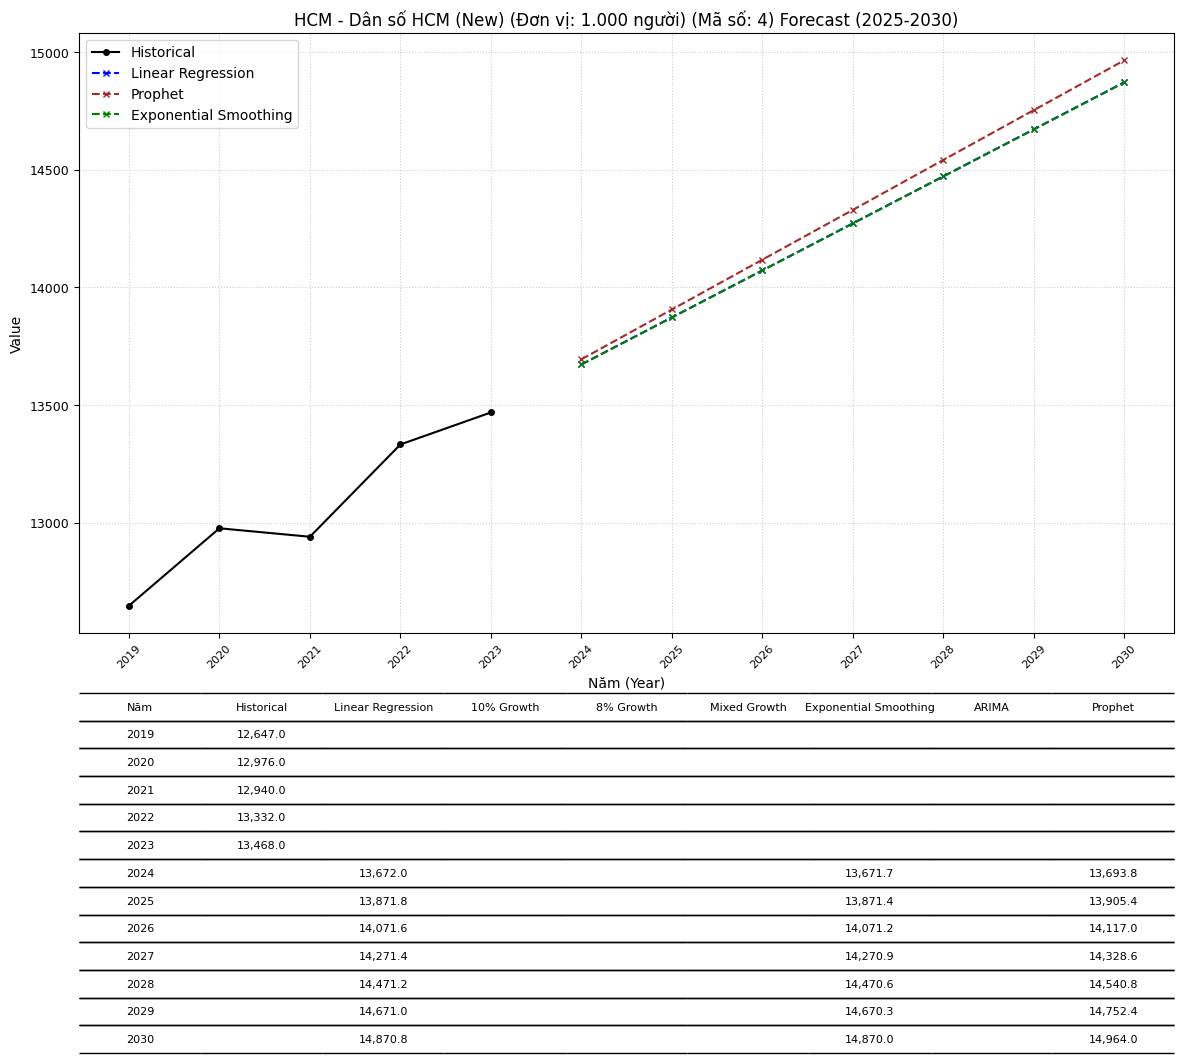

  Saved plot with table: output_plots_with_table\HCM_Dân_số_Cả_nước_Đơn_vị_1000_người_Mã_số_5_with_table.png


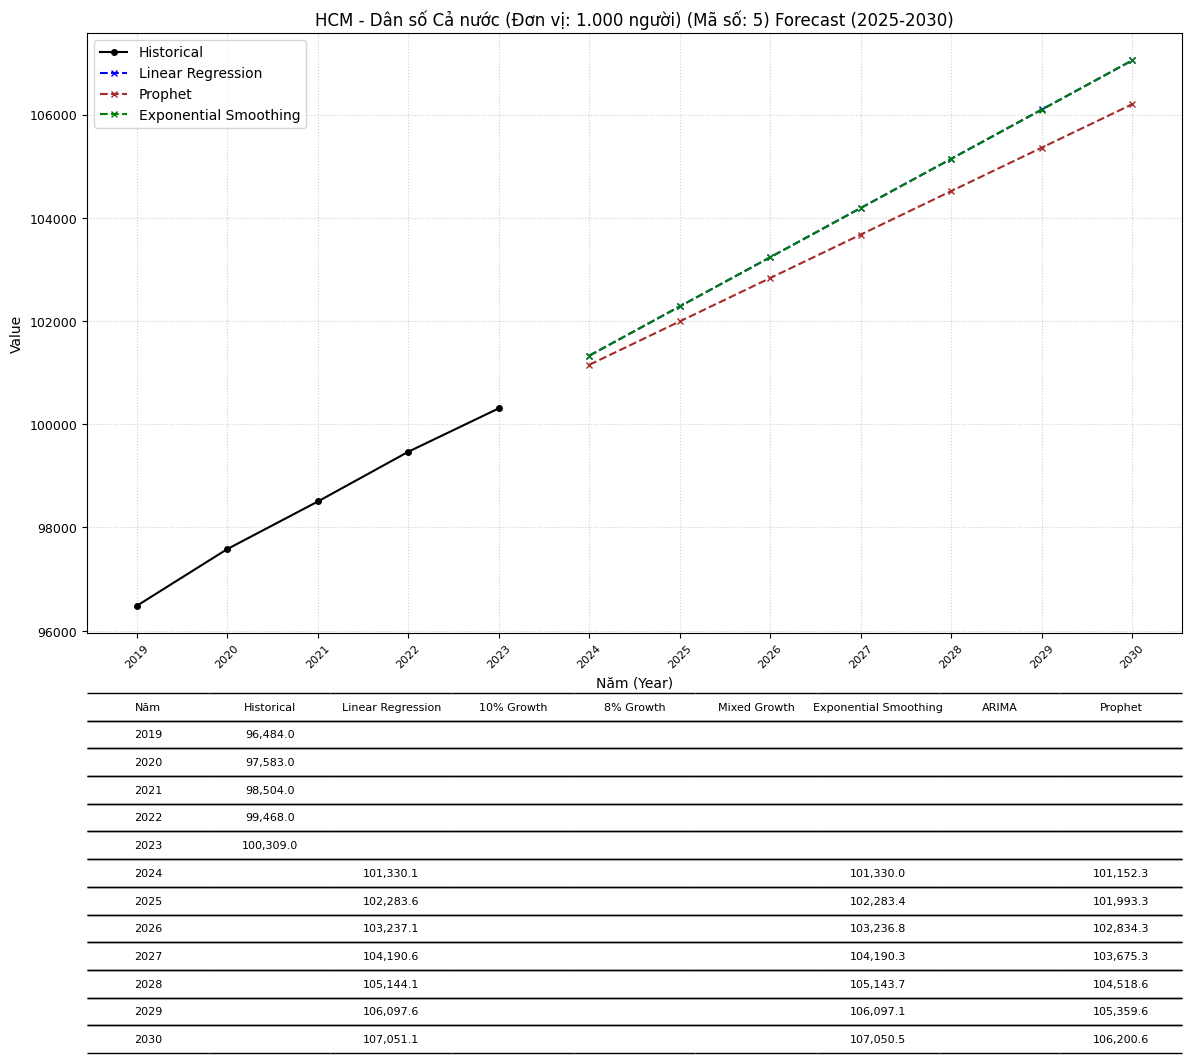

  Saved plot with table: output_plots_with_table\HCM_Dân_số_HCMnCả_nước_Đơn_vị_%_Mã_số_6_with_table.png


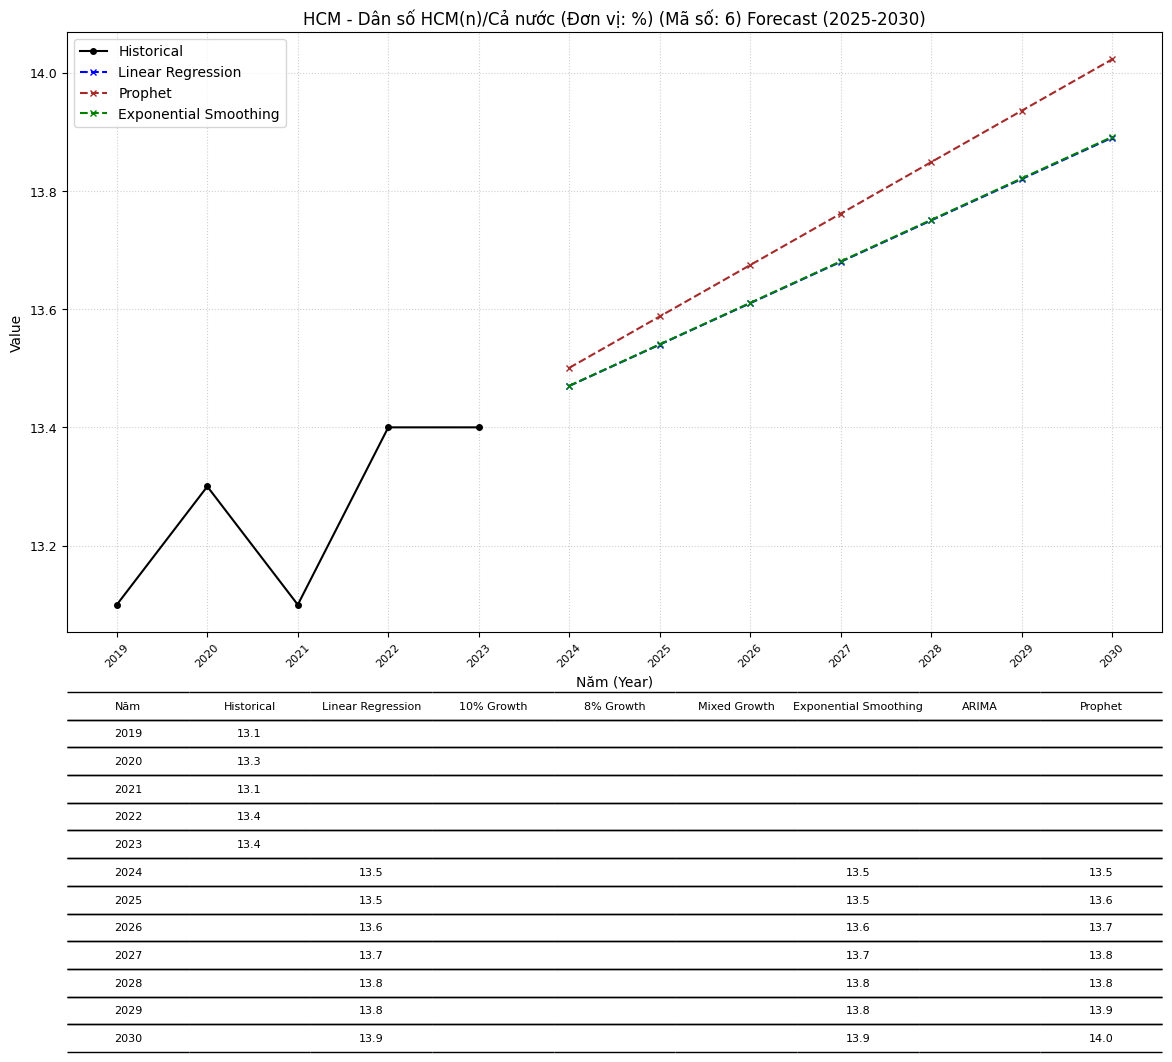

  Saved plot with table: output_plots_with_table\HCM_Lao_động_đang_làm_việc_HCM_New_Đơn_vị_1000_người_Mã_số_7_with_table.png


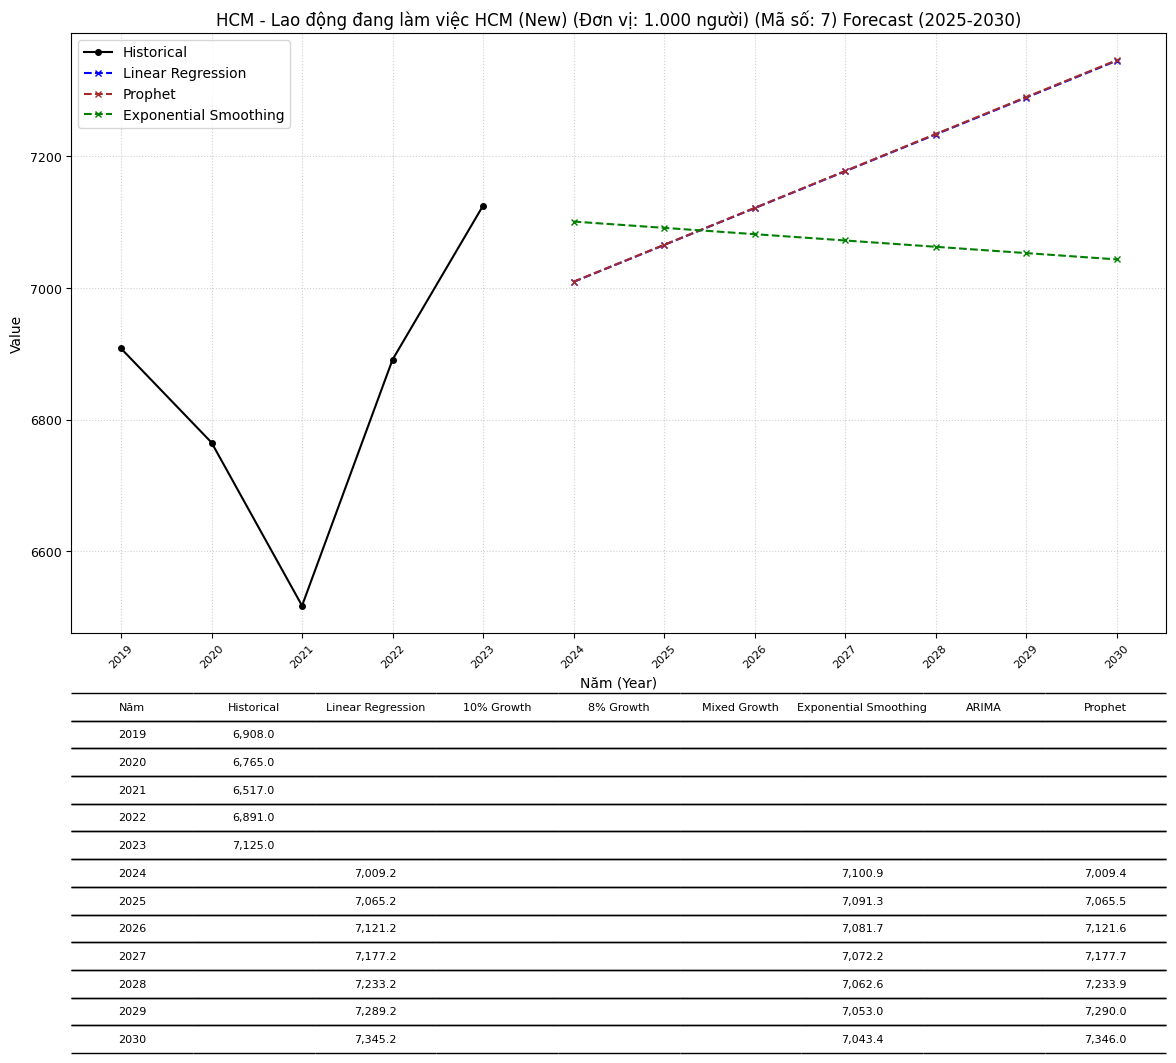

  Saved plot with table: output_plots_with_table\HCM_Lao_động_đang_làm_việc_Cả_nước_Đơn_vị_1000_người_Mã_số_8_with_table.png


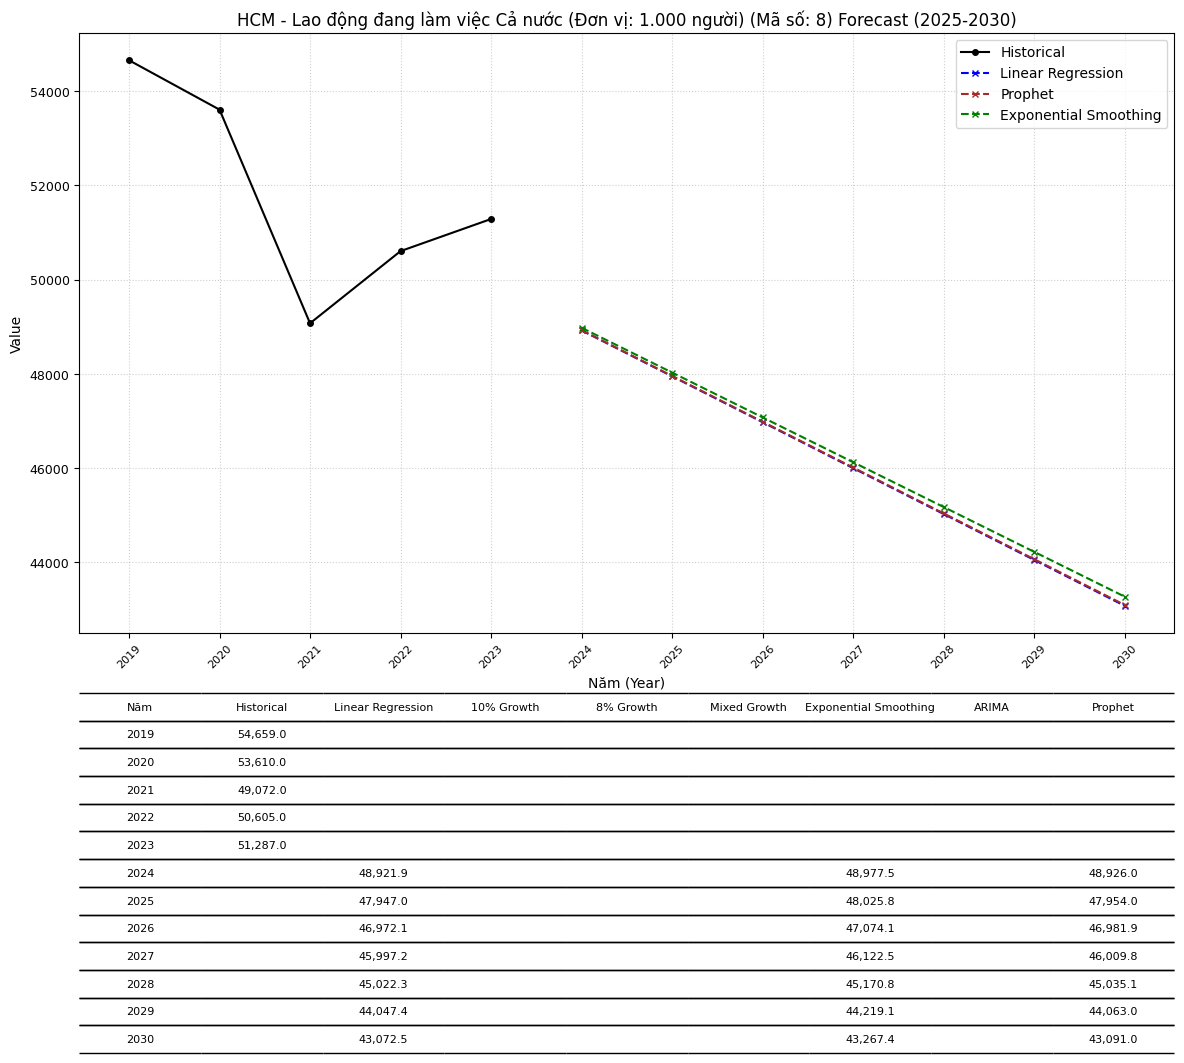

  Saved plot with table: output_plots_with_table\HCM_Lao_động_đang_làm_việc_HCMnCả_nước_Đơn_vị_%_Mã_số_9_with_table.png


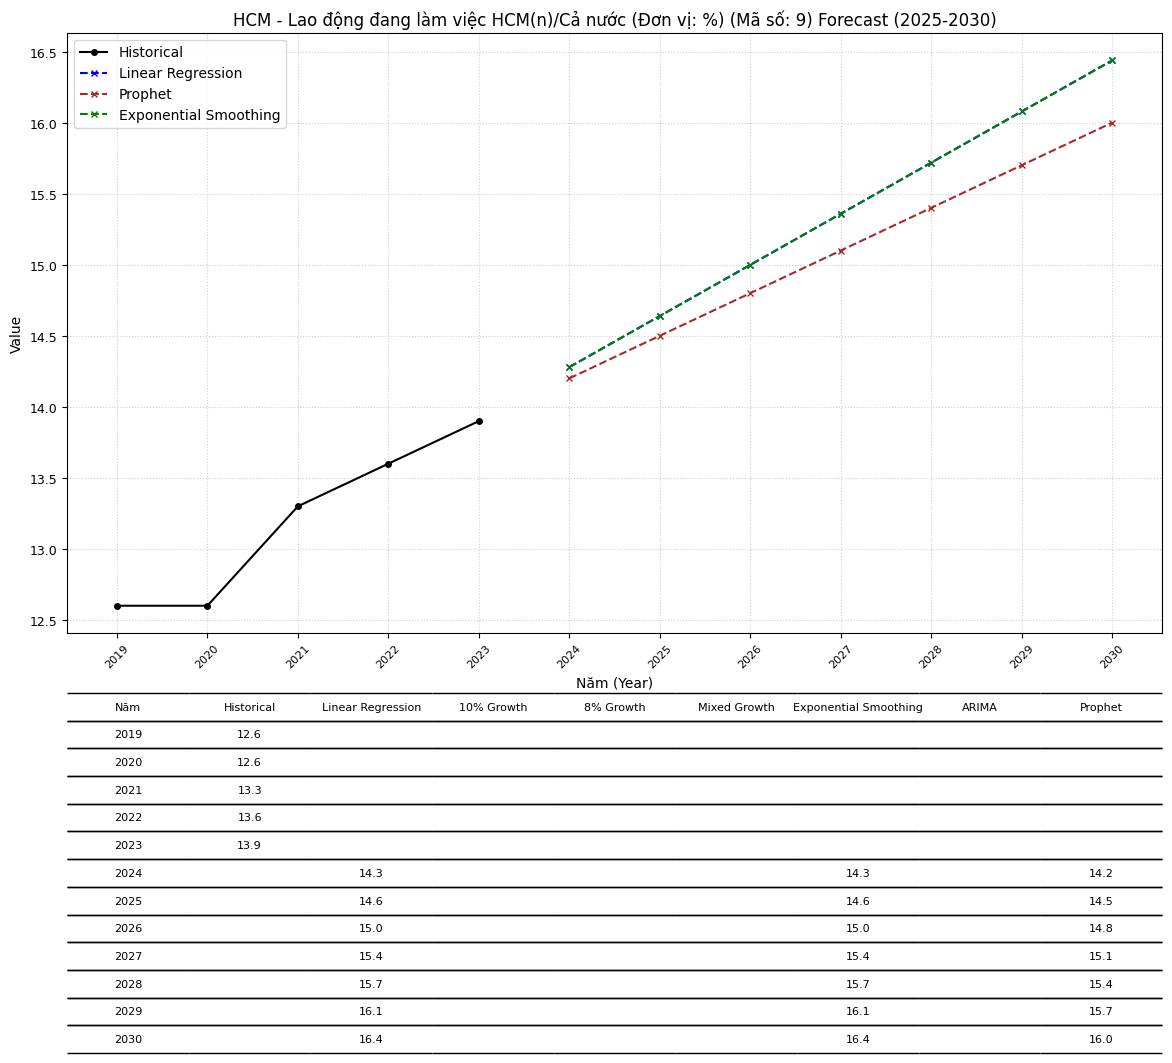

  Saved plot with table: output_plots_with_table\HCM_Quy_mô_GRDP_GDP_giá_hiện_hành_HCM_New_Đơn_vị_Tỷ_đồng_Mã_số_10_with_table.png


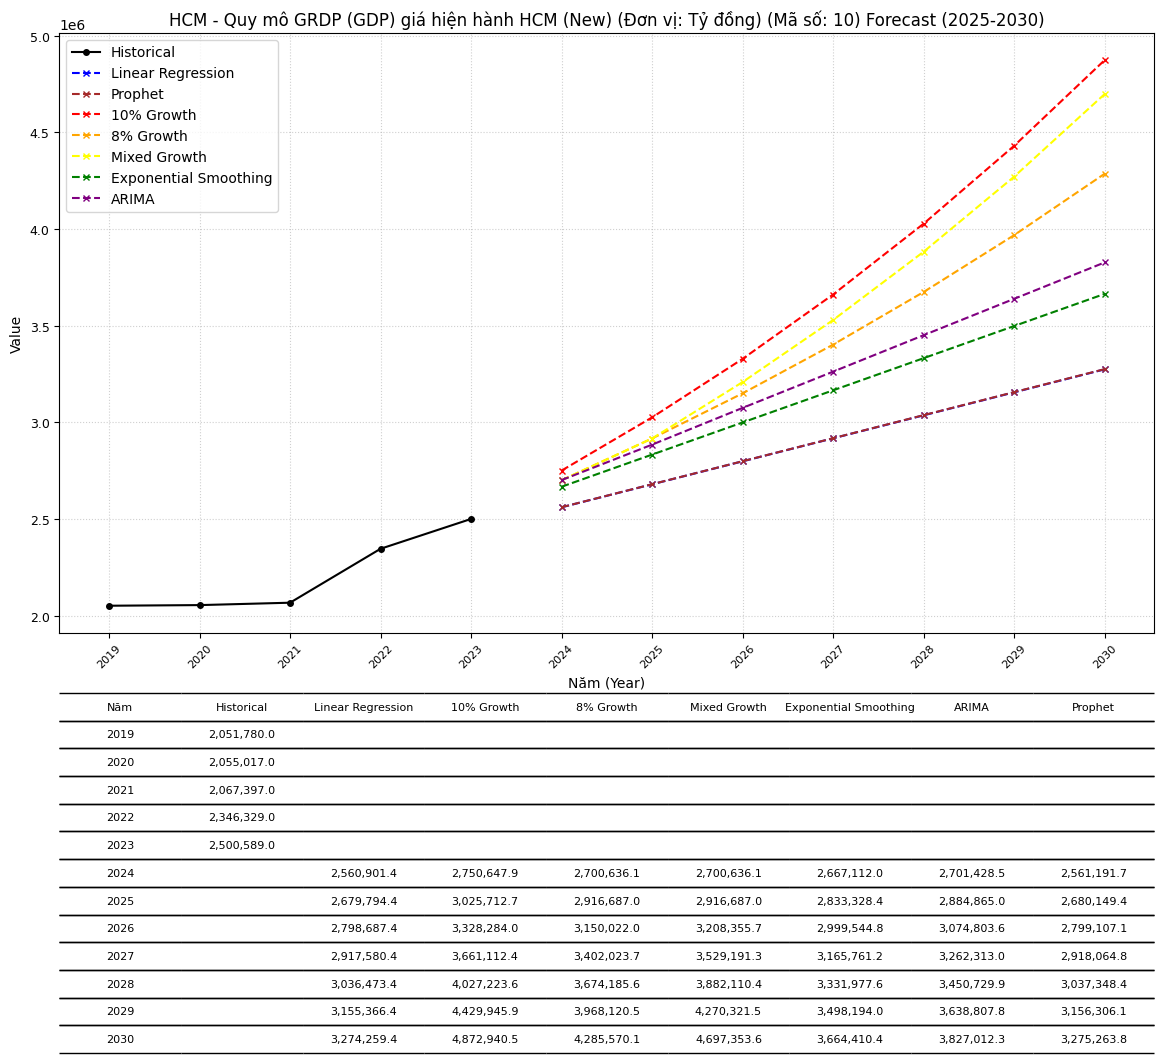

  Saved plot with table: output_plots_with_table\HCM_Quy_mô_GRDP_GDP_giá_hiện_hành_Cả_nước_Đơn_vị_Tỷ_đồng_Mã_số_11_with_table.png


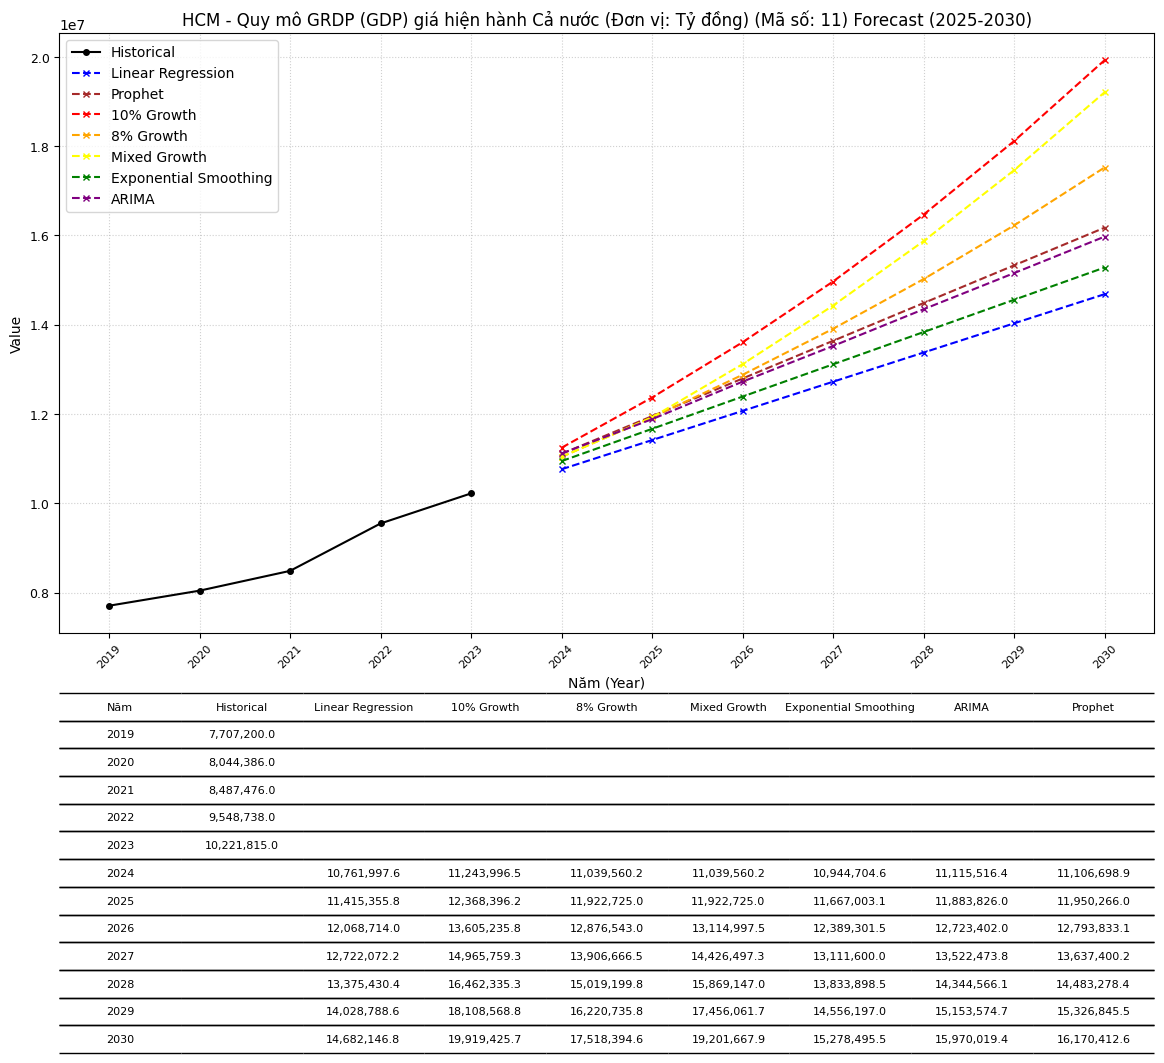

  Saved plot with table: output_plots_with_table\HCM_Quy_mô_GRDP_GDP_giá_hiện_hành_HCMnCả_nước_Đơn_vị_%_Mã_số_12_with_table.png


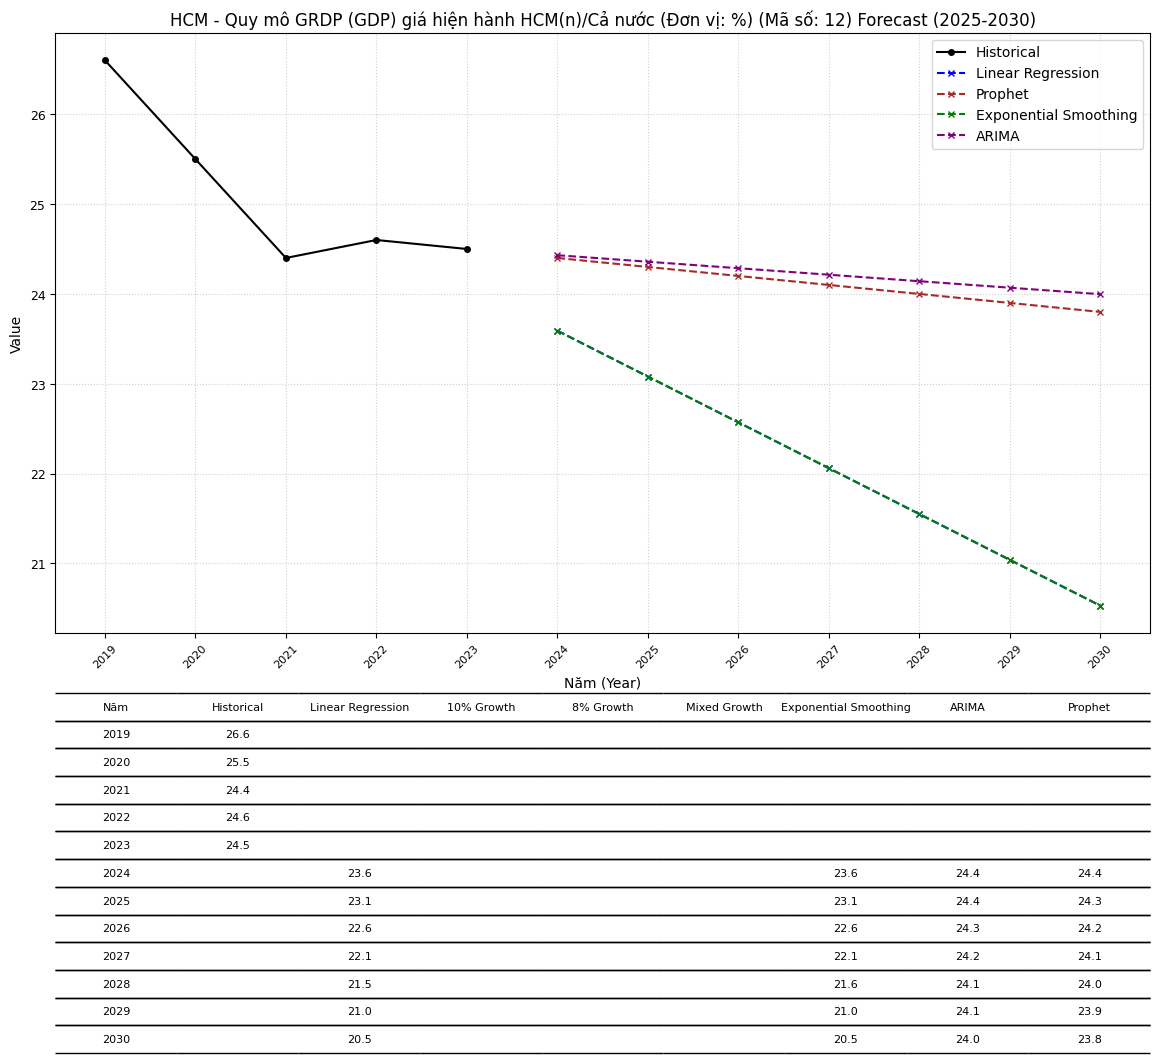

  Saved plot with table: output_plots_with_table\HCM_Quy_mô_GRDP_GDP_giá_2010_HCM_New_Đơn_vị_Tỷ_đồng_Mã_số_13_with_table.png


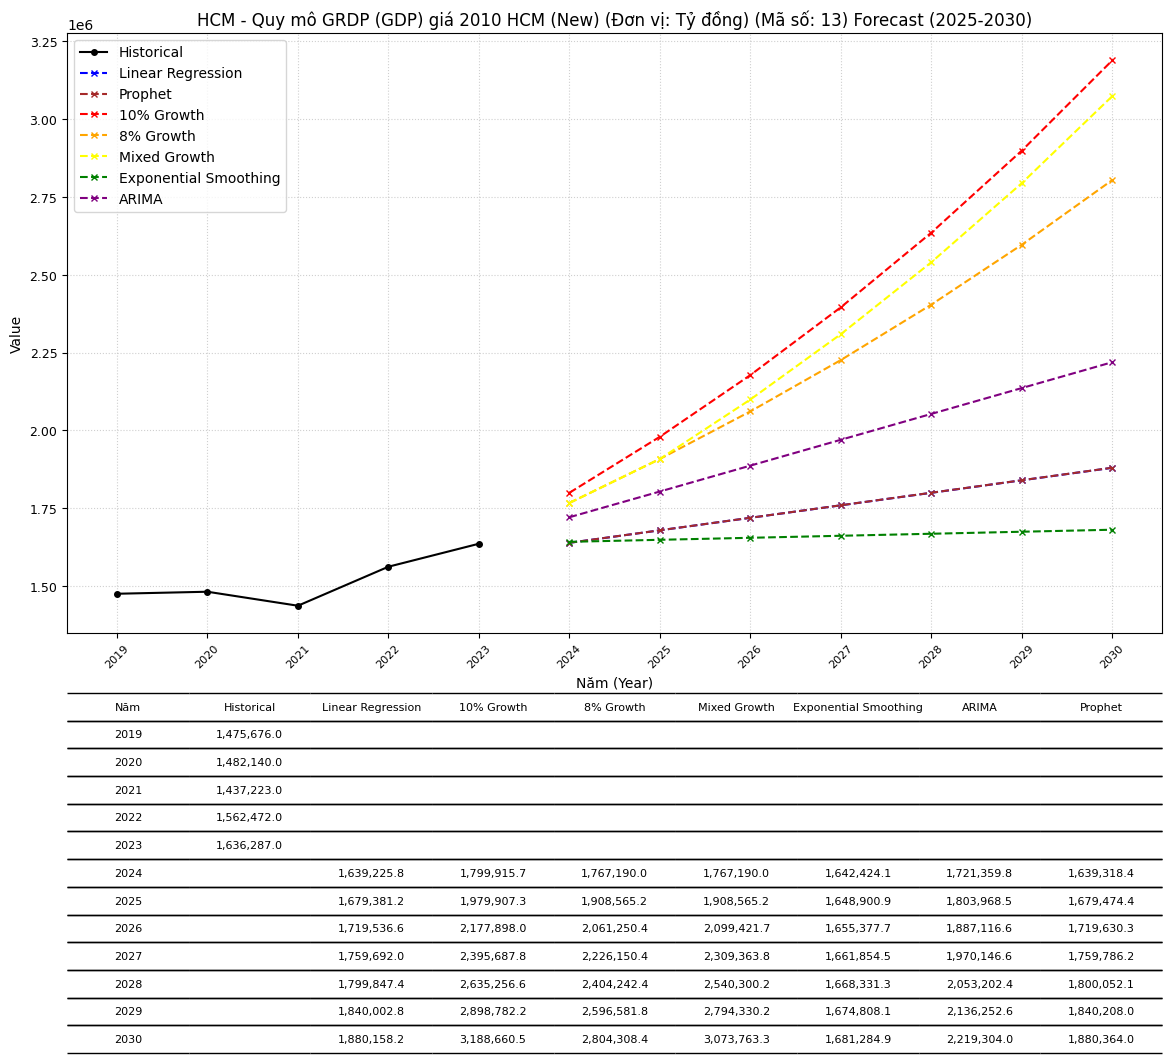

  Saved plot with table: output_plots_with_table\HCM_Quy_mô_GRDP_GDP_giá_2010_Cả_nước_Đơn_vị_Tỷ_đồng_Mã_số_14_with_table.png


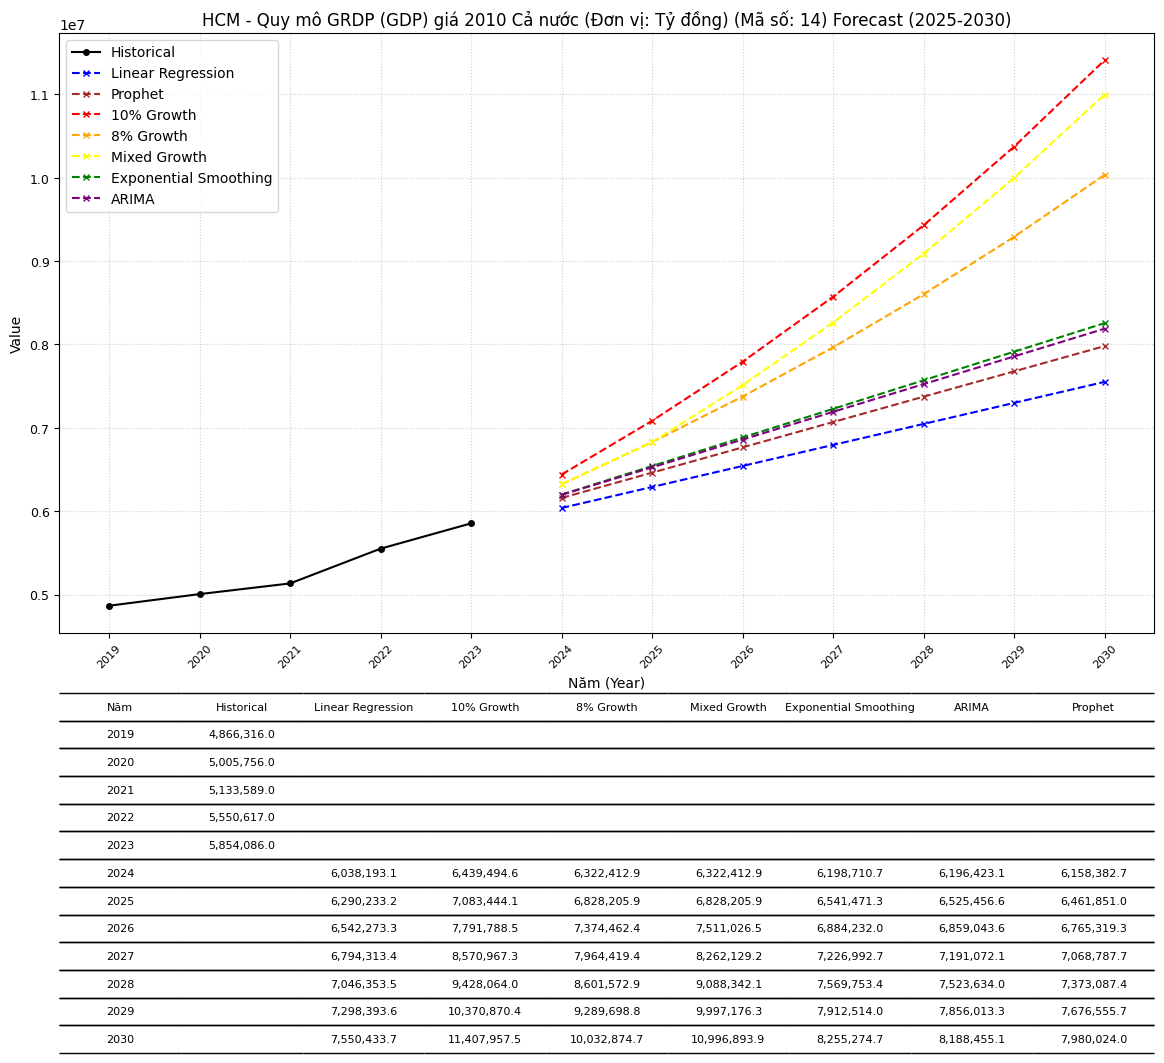

  Saved plot with table: output_plots_with_table\HCM_Quy_mô_GRDP_GDP_giá_2010_HCMnCả_nước_Đơn_vị_%_Mã_số_15_with_table.png


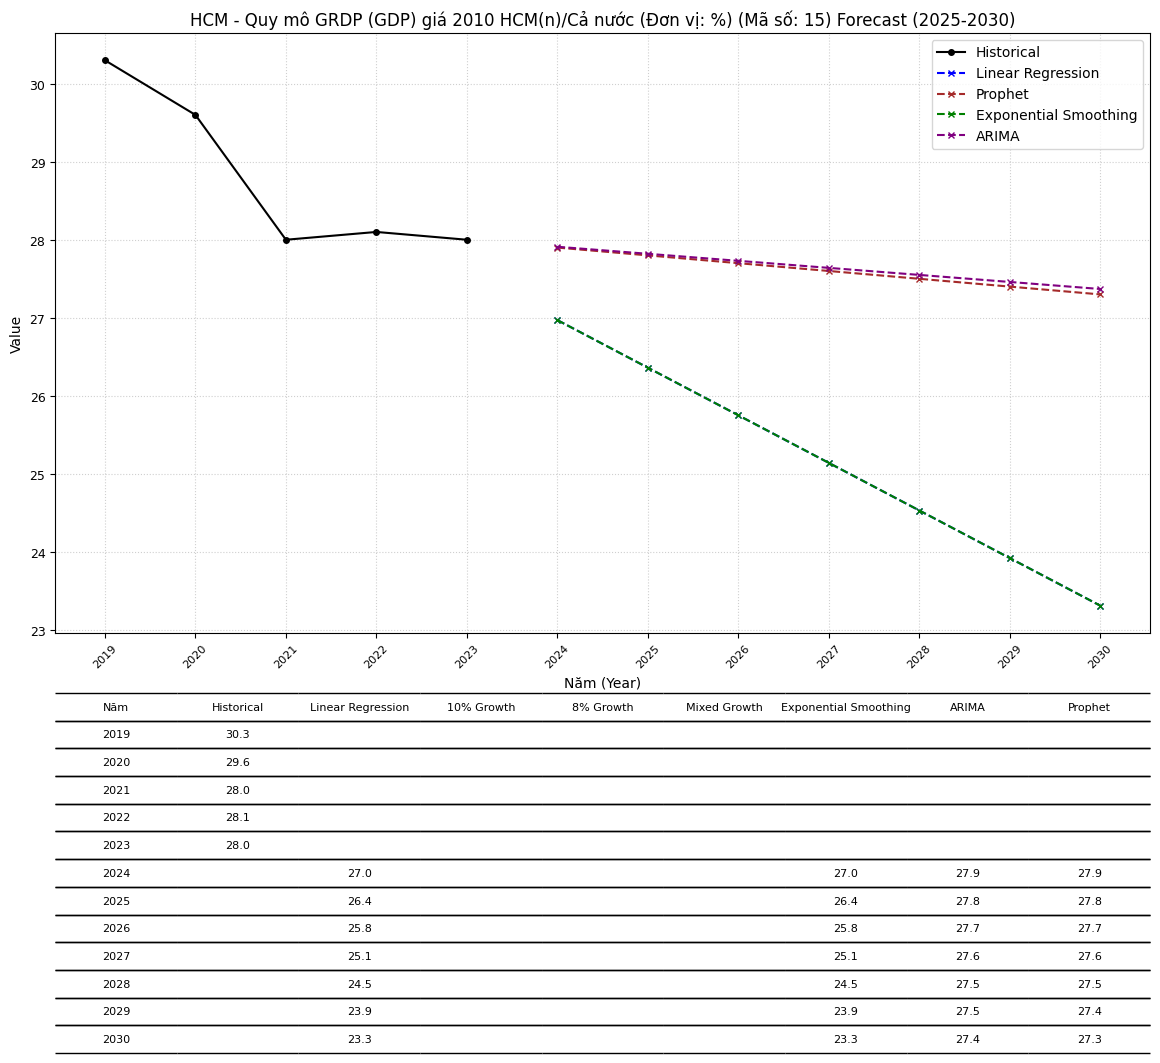

  Saved plot with table: output_plots_with_table\HCM_Chỉ_số_phát_triển_GRDP_HCM_New_Đơn_vị_%_Mã_số_16_with_table.png


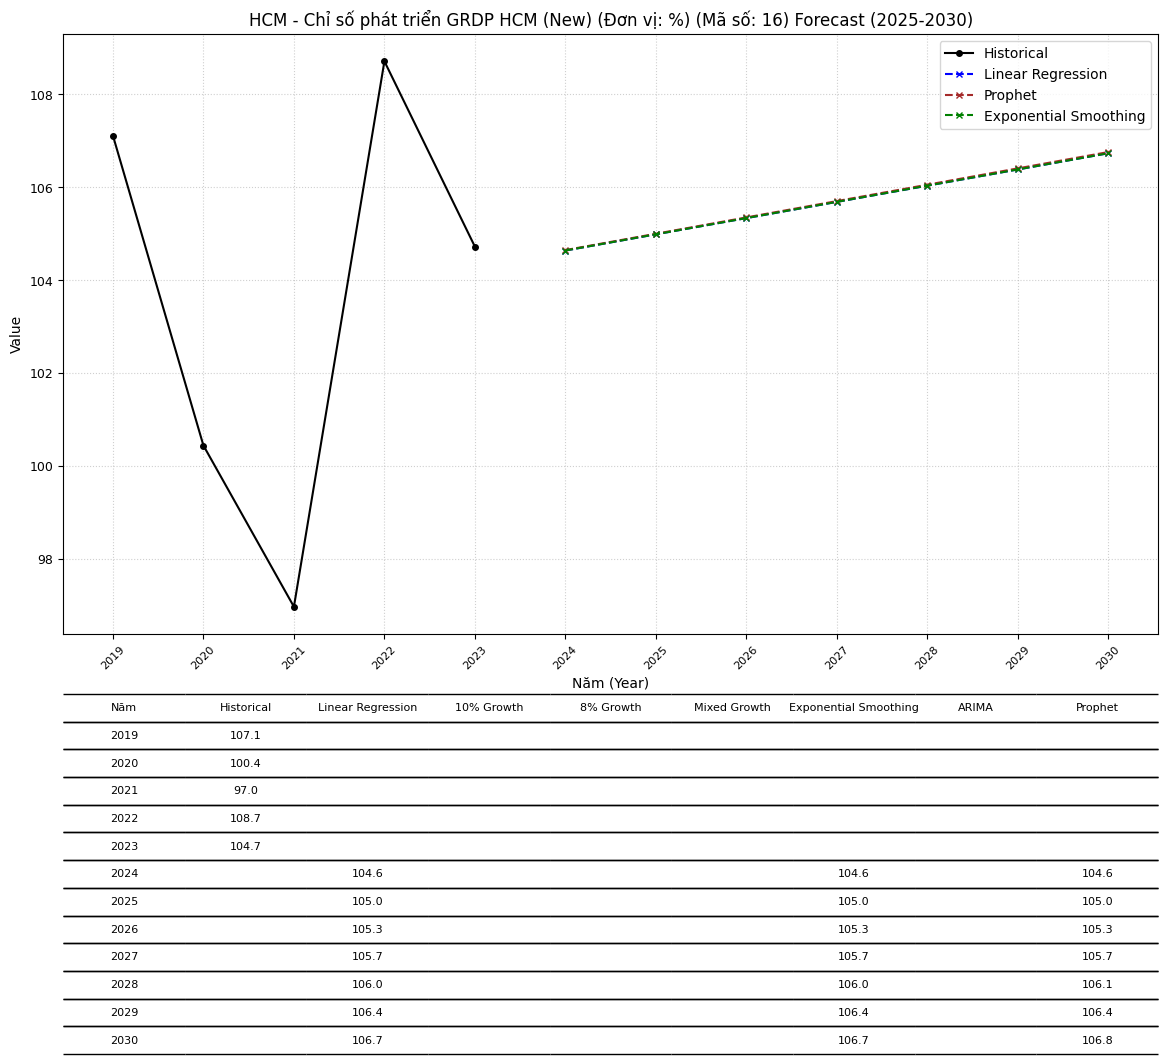

  Saved plot with table: output_plots_with_table\HCM_Chỉ_số_phát_triển_GRDP_Cả_nước_Đơn_vị_%_Mã_số_17_with_table.png


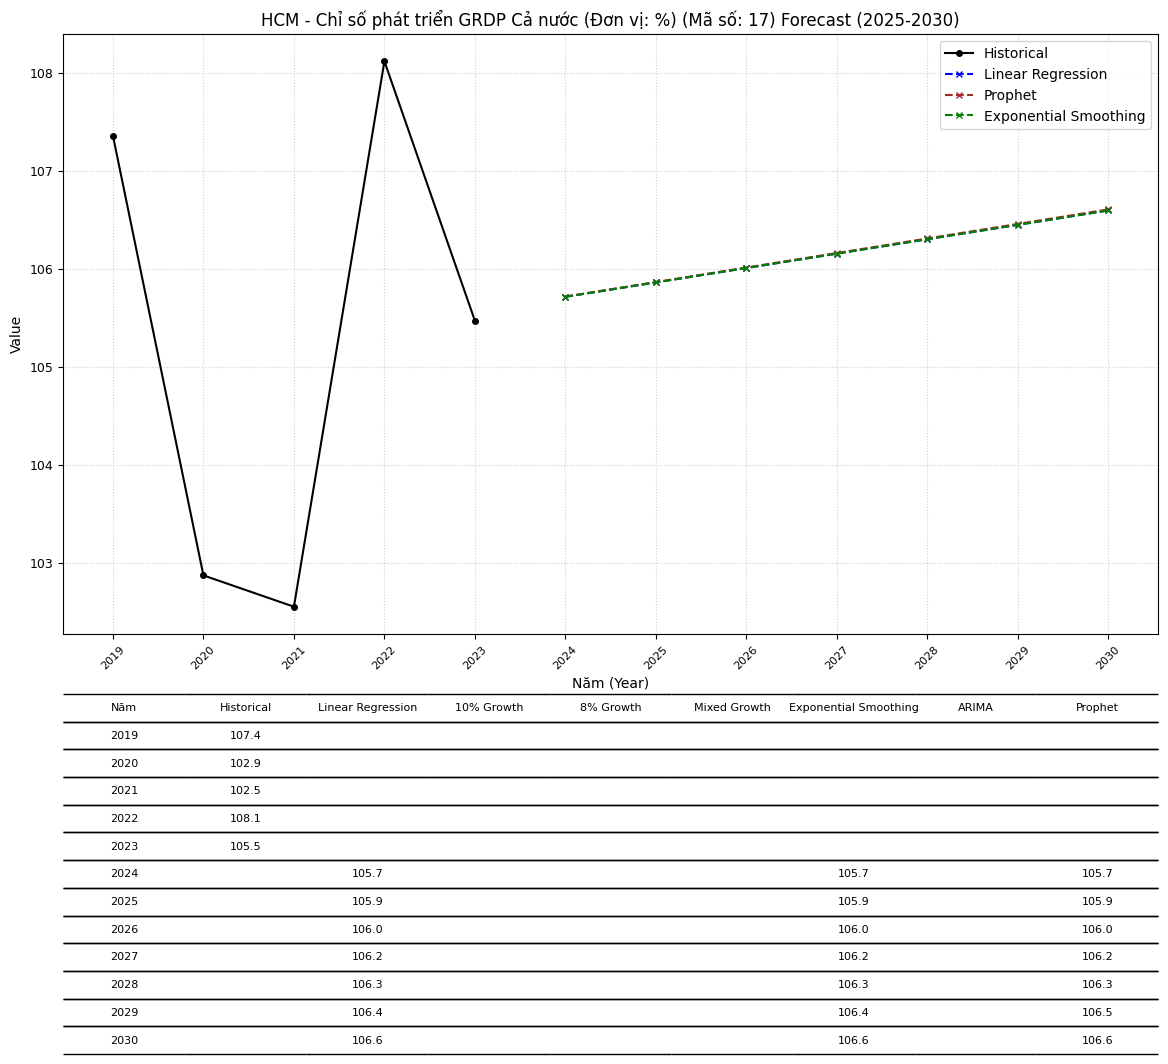

  Saved plot with table: output_plots_with_table\HCM_Chỉ_số_phát_triển_GRDP_HCMn-Cả_nước_Đơn_vị_Điểm_%_Mã_số_18_with_table.png


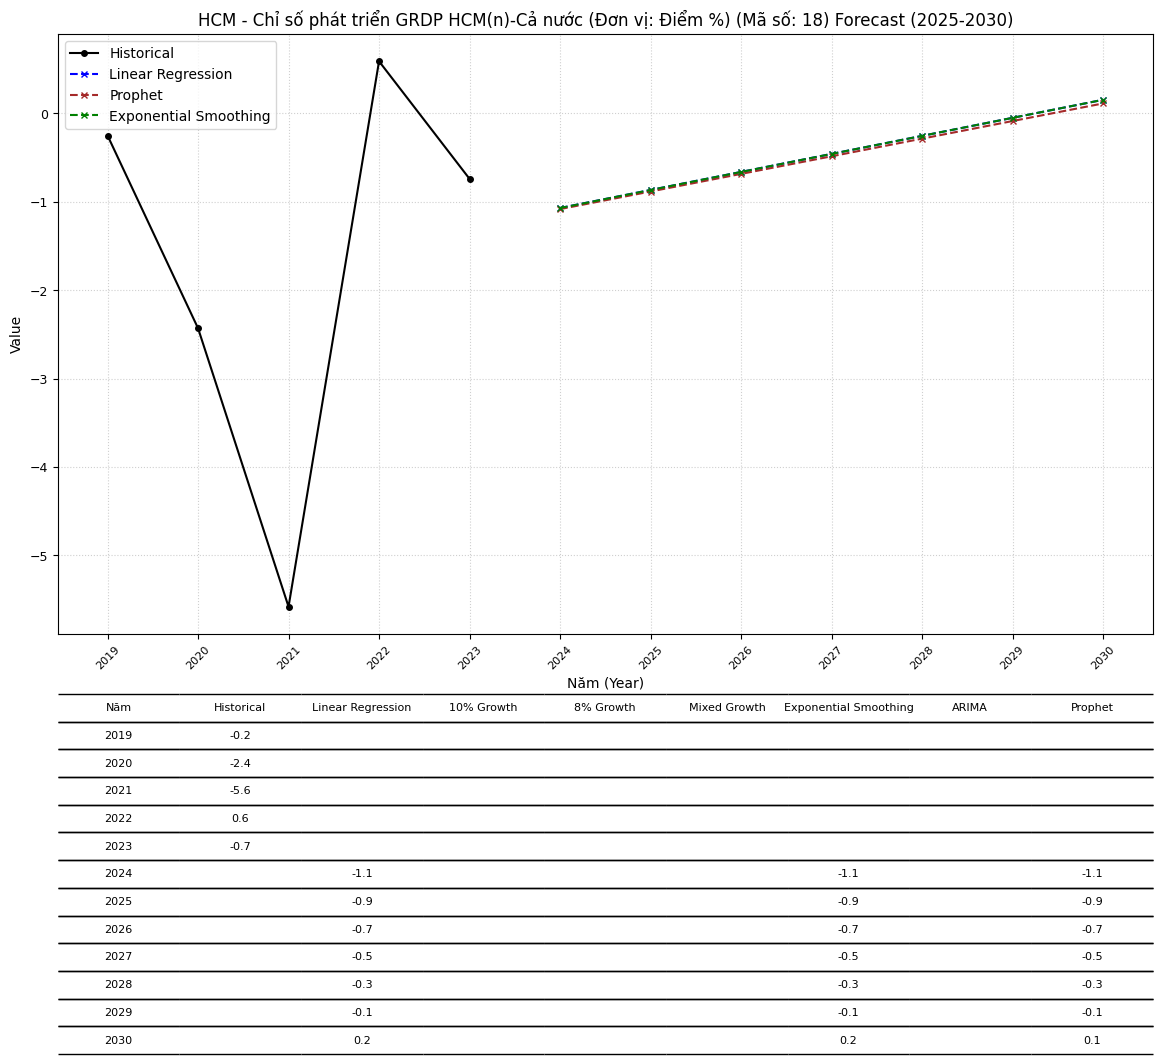

  Saved plot with table: output_plots_with_table\HCM_Thu_ngân_sách_HCM_New_Đơn_vị_Tỷ_đồng_Mã_số_19_with_table.png


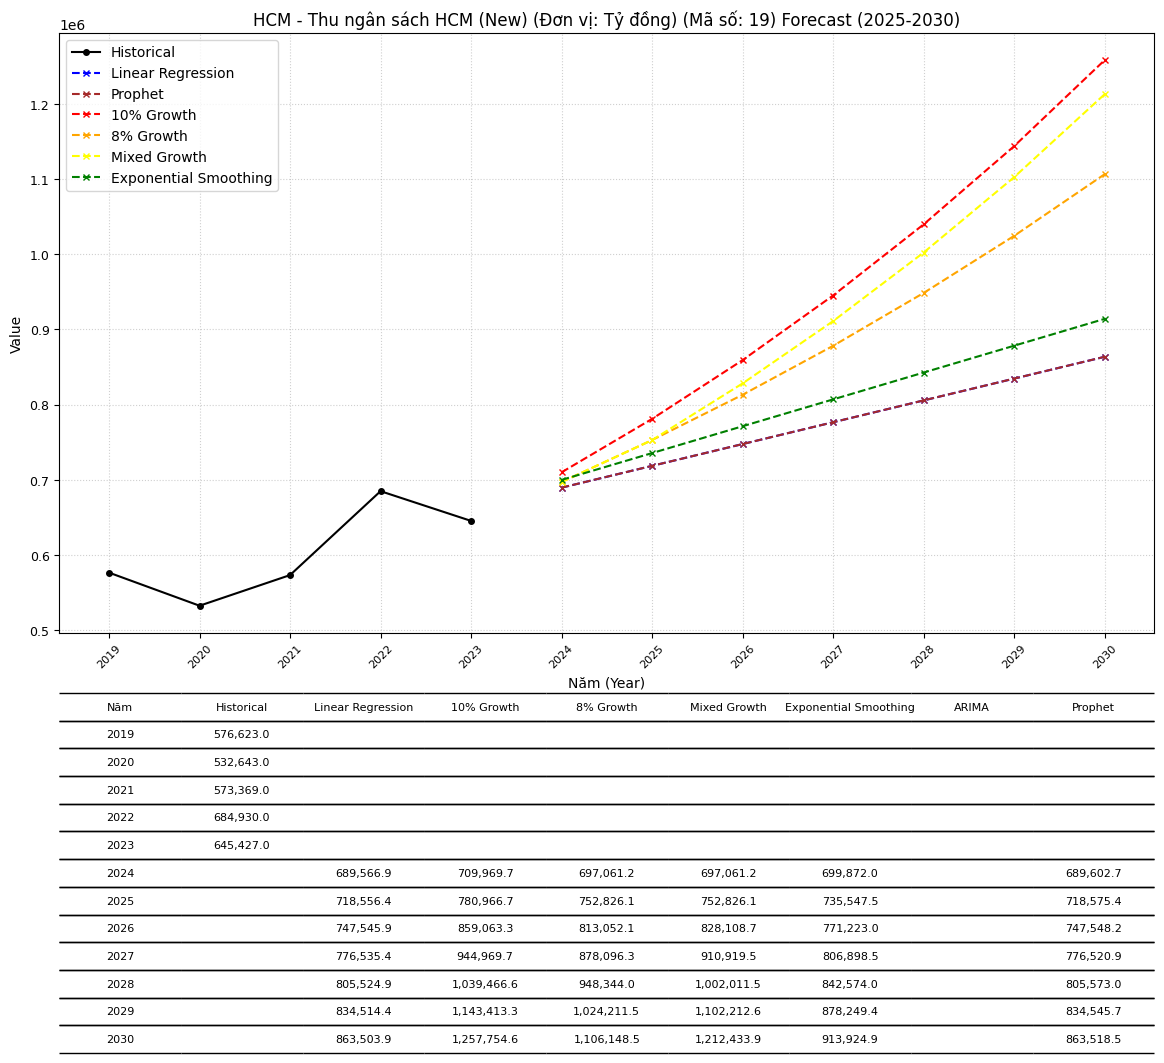

  Saved plot with table: output_plots_with_table\HCM_Thu_ngân_sách_Cả_nước_Đơn_vị_Tỷ_đồng_Mã_số_20_with_table.png


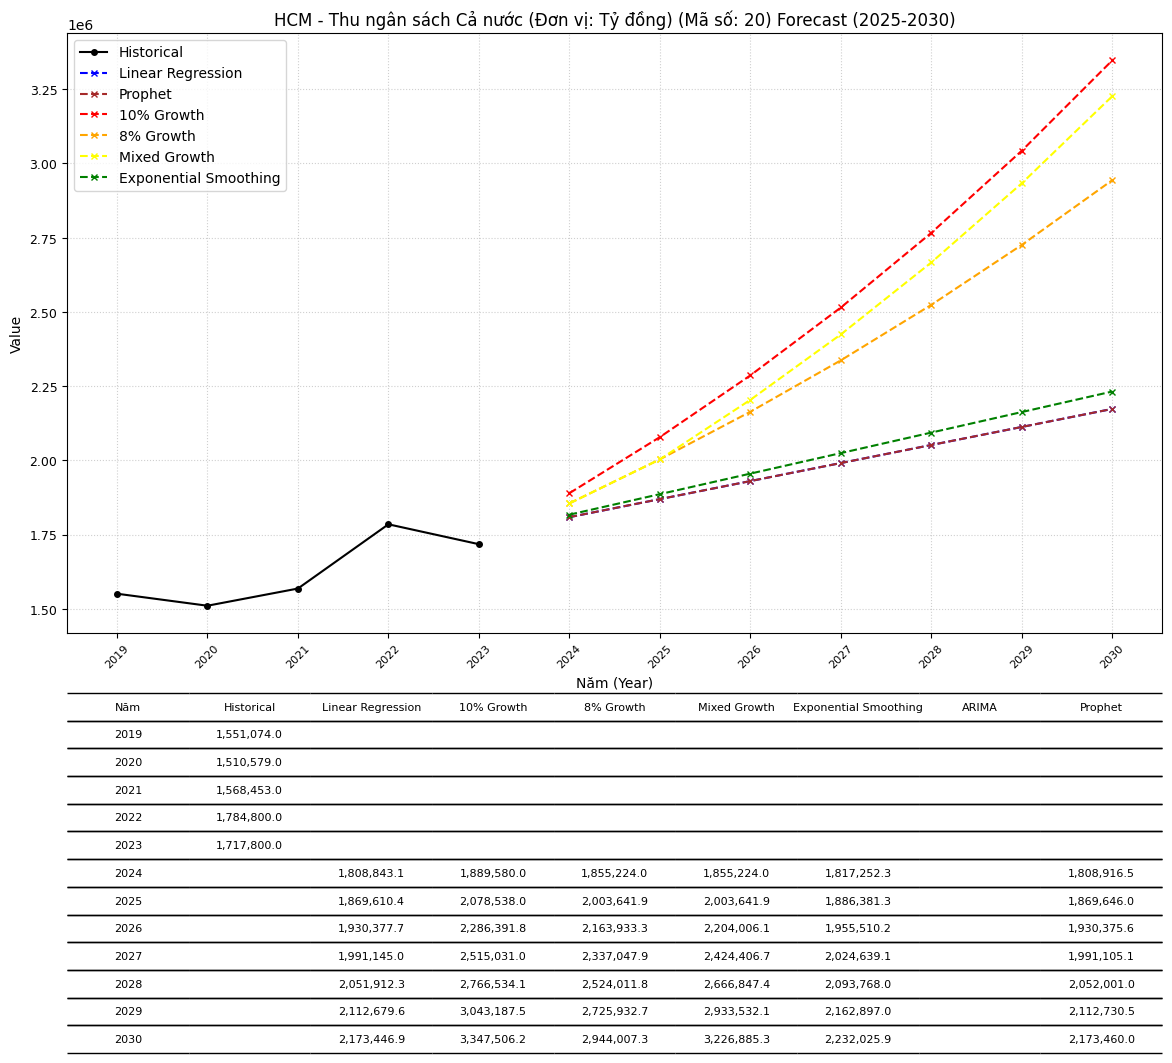

  Saved plot with table: output_plots_with_table\HCM_Thu_ngân_sách_HCMnCả_nước_Đơn_vị_%_Mã_số_21_with_table.png


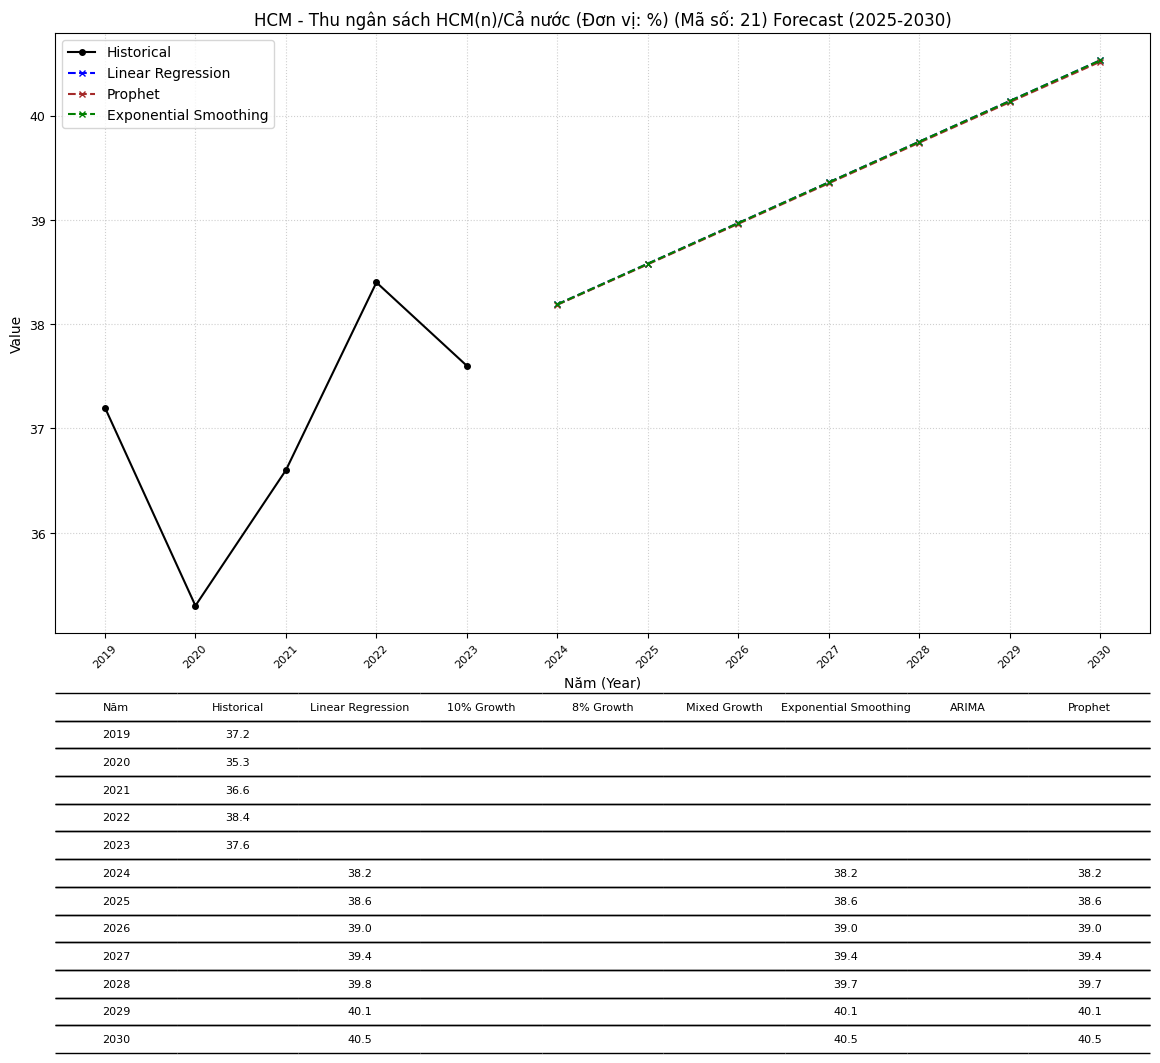

  Saved plot with table: output_plots_with_table\HCM_Chi_ngân_sách_HCM_New_Đơn_vị_Tỷ_đồng_Mã_số_22_with_table.png


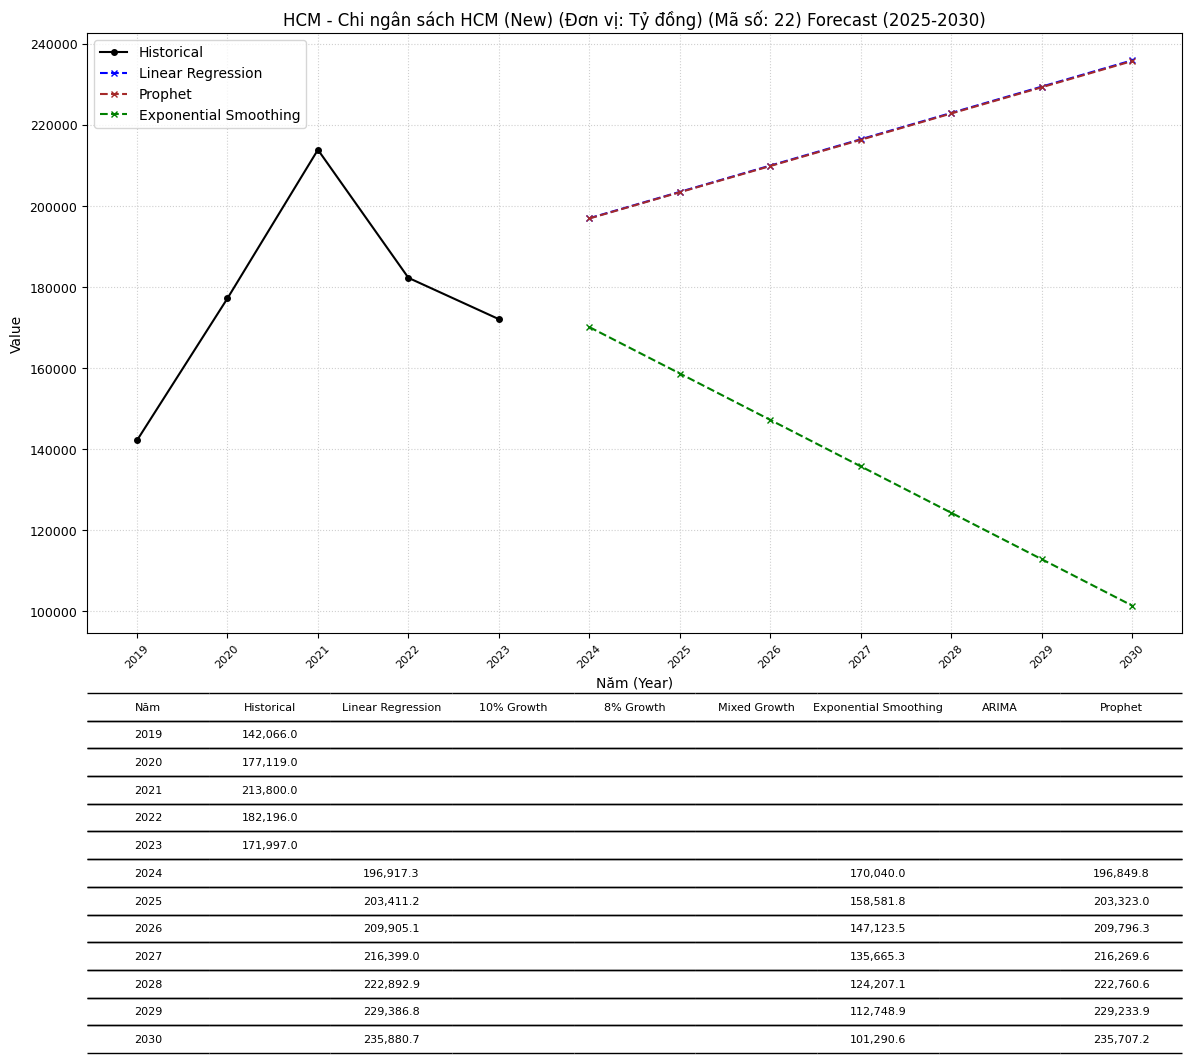

  Saved plot with table: output_plots_with_table\HCM_Chi_ngân_sách_Cả_nước_Đơn_vị_Tỷ_đồng_Mã_số_23_with_table.png


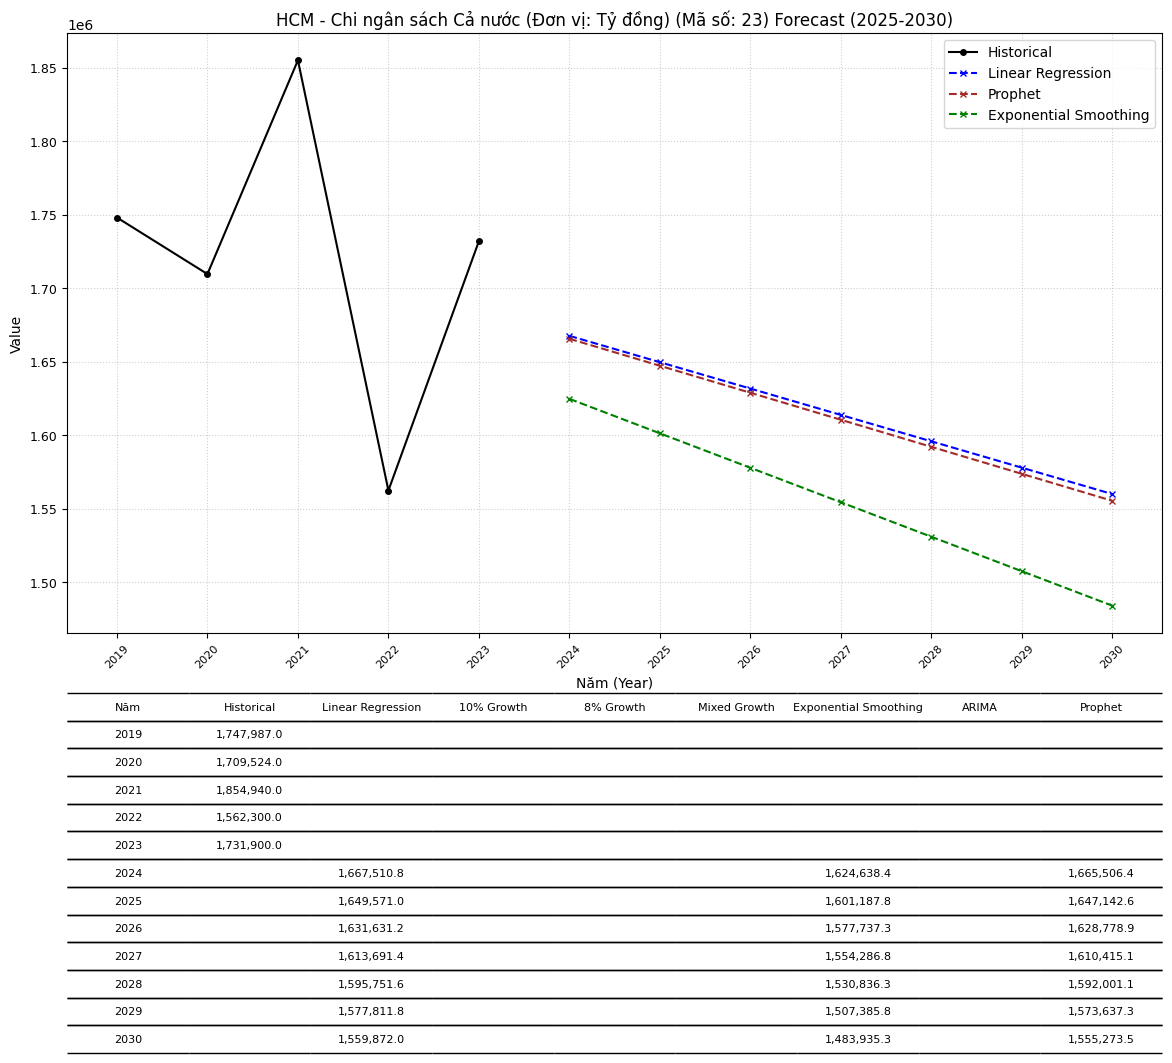

  Saved plot with table: output_plots_with_table\HCM_Chi_ngân_sách_HCMnCả_nước_Đơn_vị_%_Mã_số_24_with_table.png


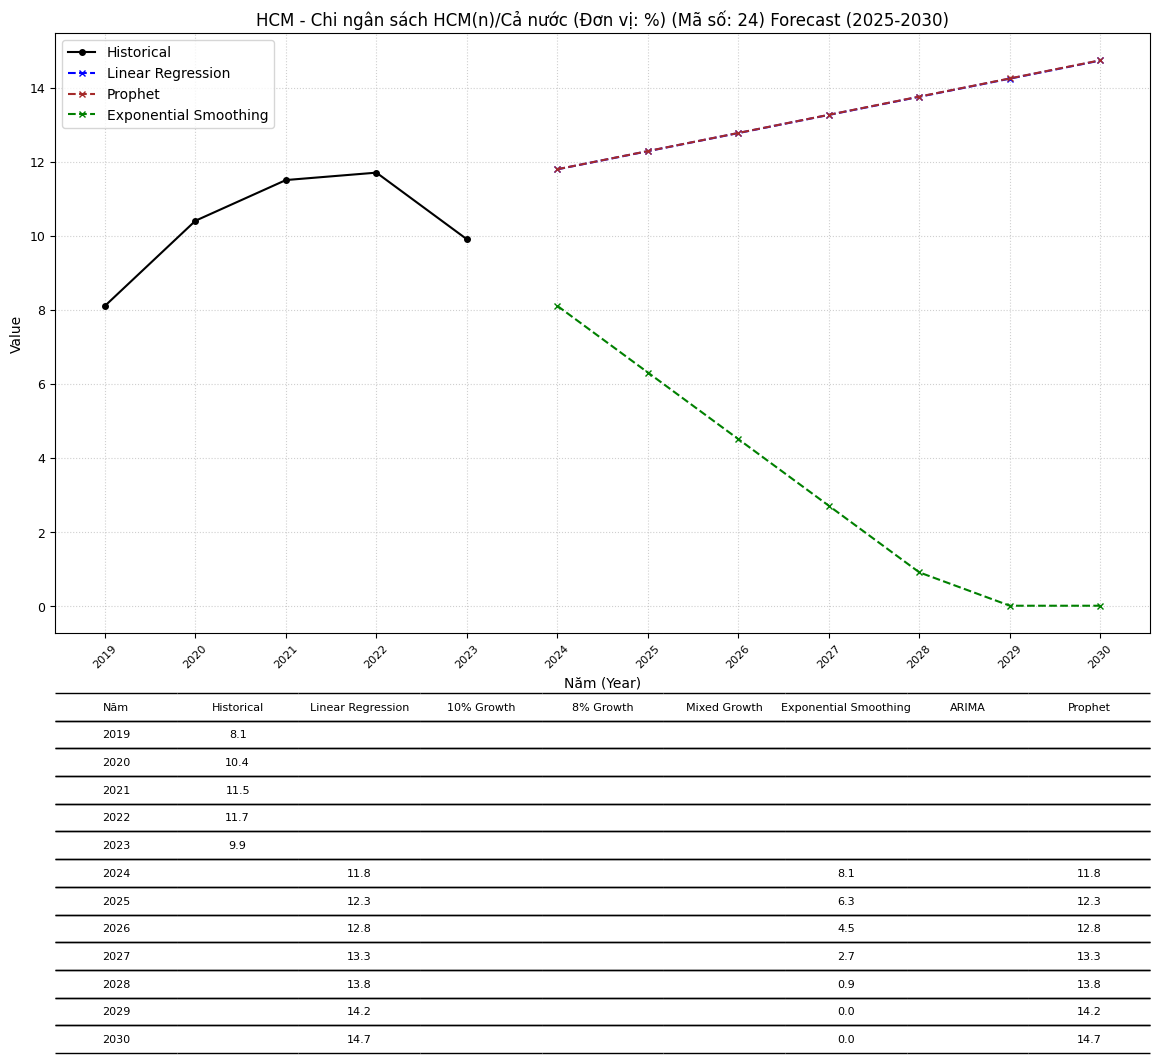

  Saved plot with table: output_plots_with_table\HCM_GRDP_bình_quân_đầu_người_HCM_New_Đơn_vị_Triệu_đồng_Mã_số_25_with_table.png


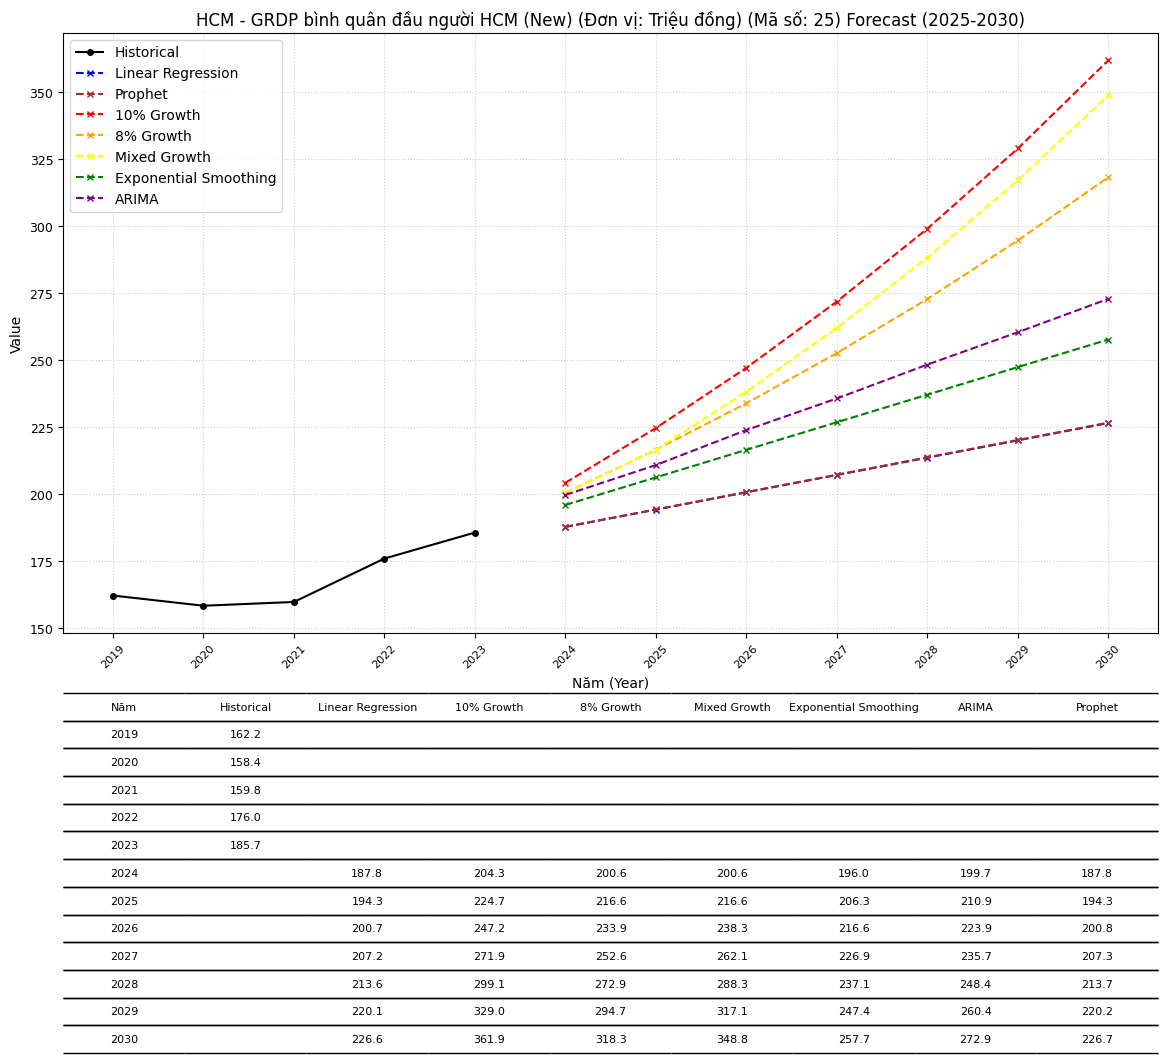

  Saved plot with table: output_plots_with_table\HCM_GRDP_bình_quân_đầu_người_Cả_nước_Đơn_vị_Triệu_đồng_Mã_số_26_with_table.png


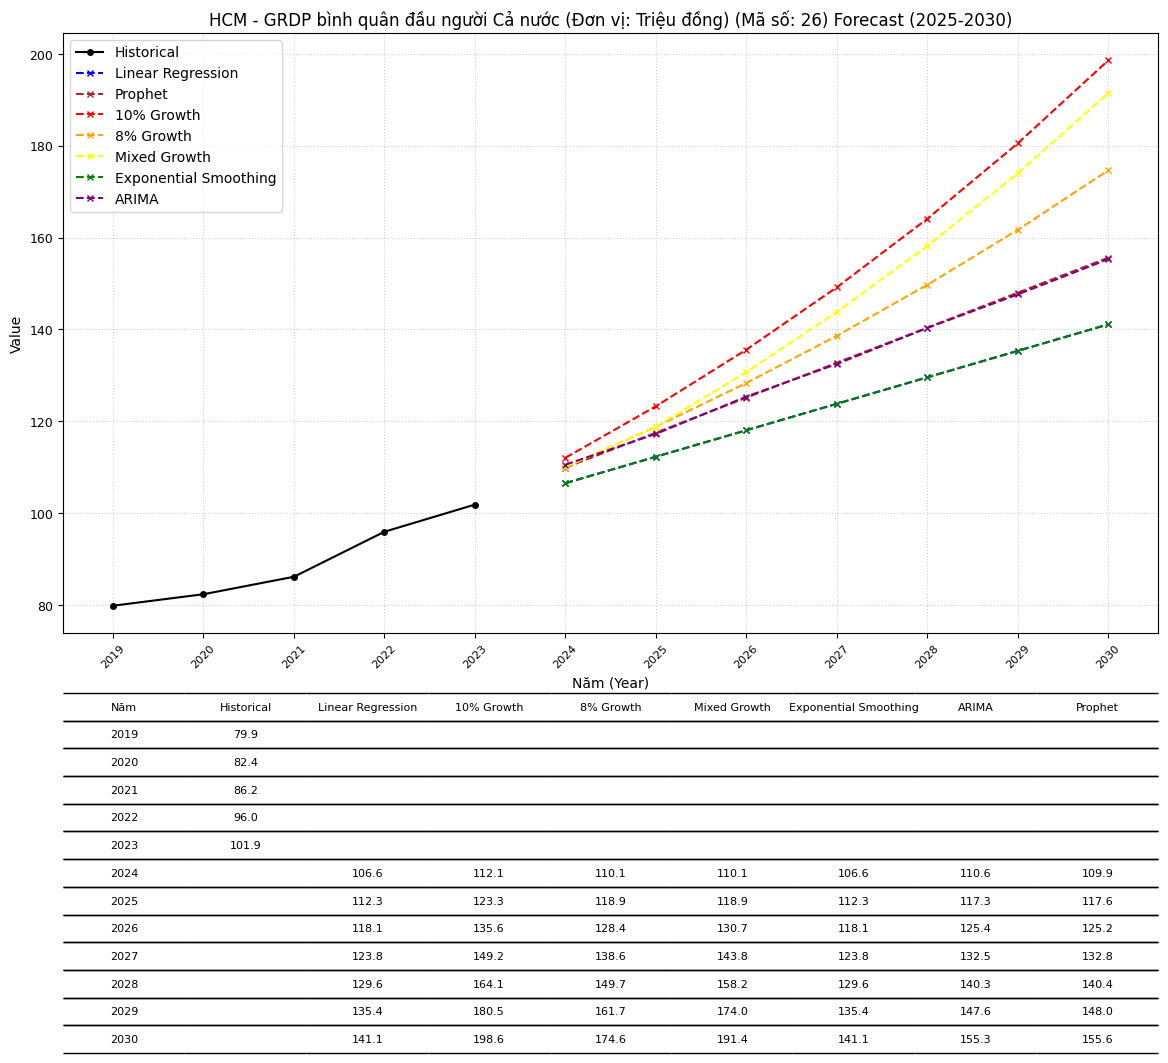

  Saved plot with table: output_plots_with_table\HCM_GRDP_bình_quân_đầu_người_HCMnCả_nước_Đơn_vị_lần_Mã_số_27_with_table.png


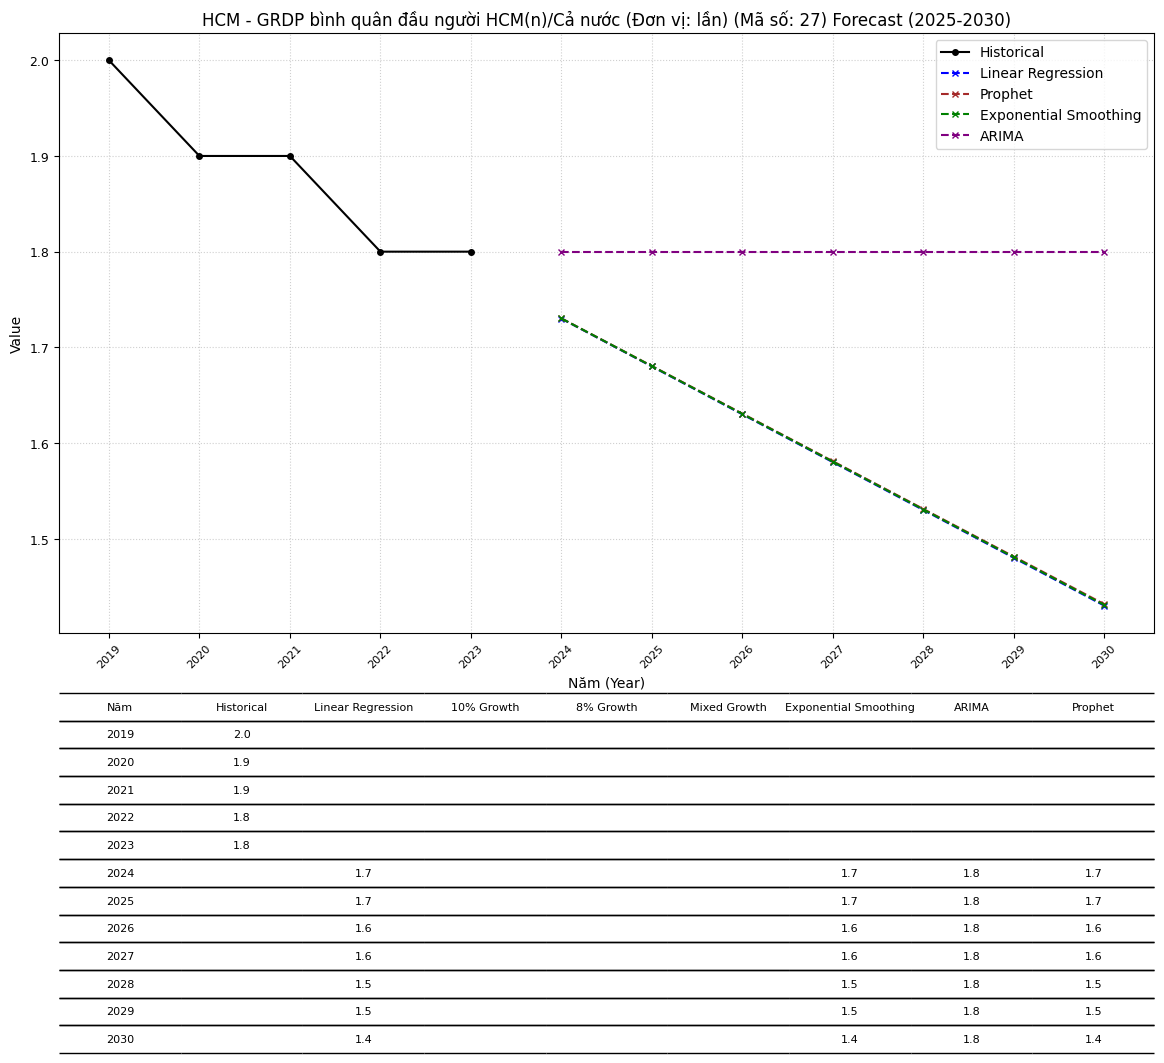

  Saved plot with table: output_plots_with_table\HCM_Vốn_đầu_tư_xã_hội_HHI_HCM_New_Đơn_vị_Tỷ_đồng_Mã_số_28_with_table.png


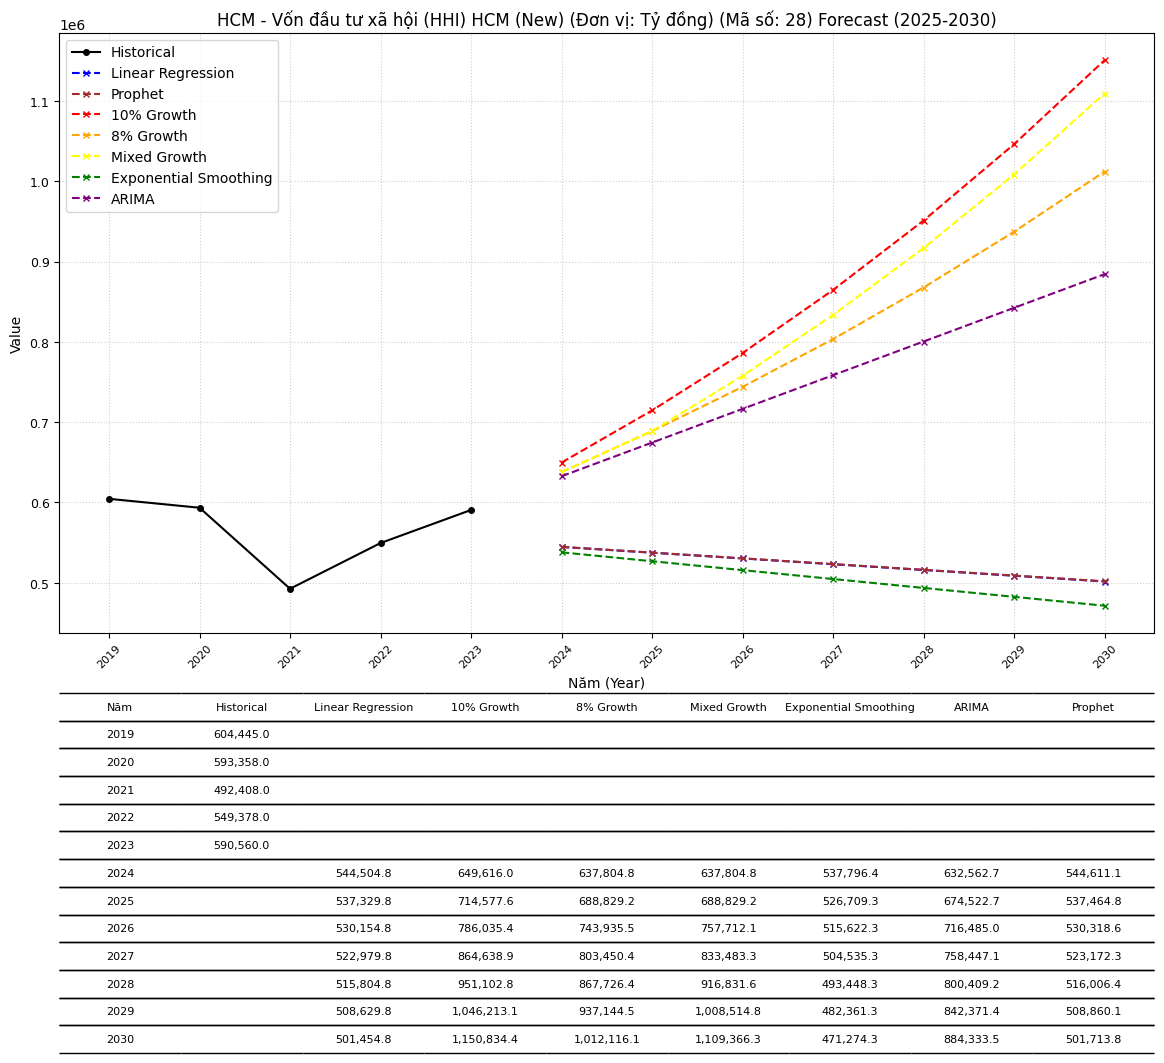

  Saved plot with table: output_plots_with_table\HCM_Vốn_đầu_tư_xã_hội_HHI_Cả_nước_Đơn_vị_Tỷ_đồng_Mã_số_29_with_table.png


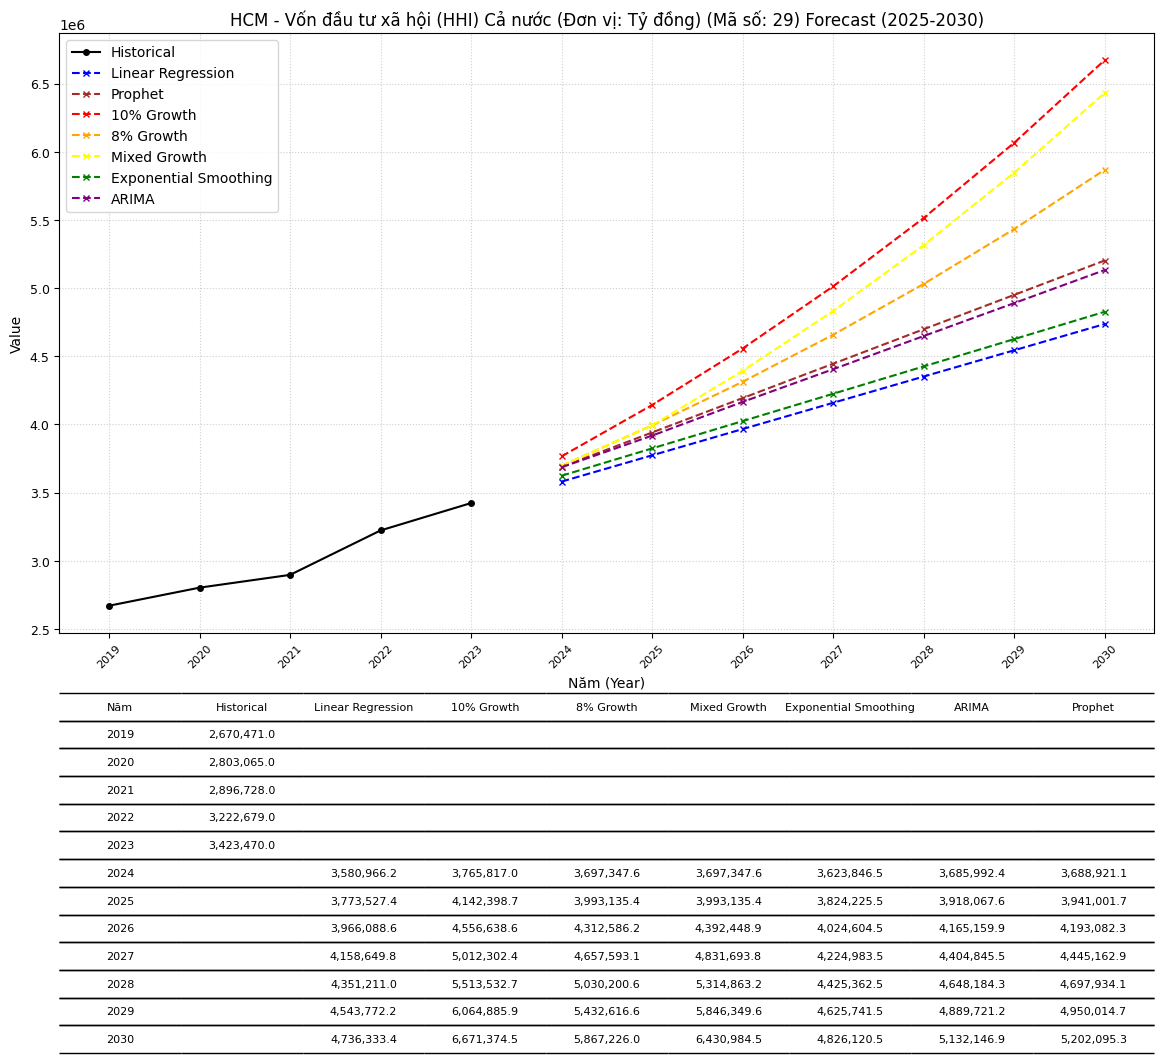

  Saved plot with table: output_plots_with_table\HCM_Vốn_đầu_tư_xã_hội_HHI_HCMnCả_nước_Đơn_vị_%_Mã_số_30_with_table.png


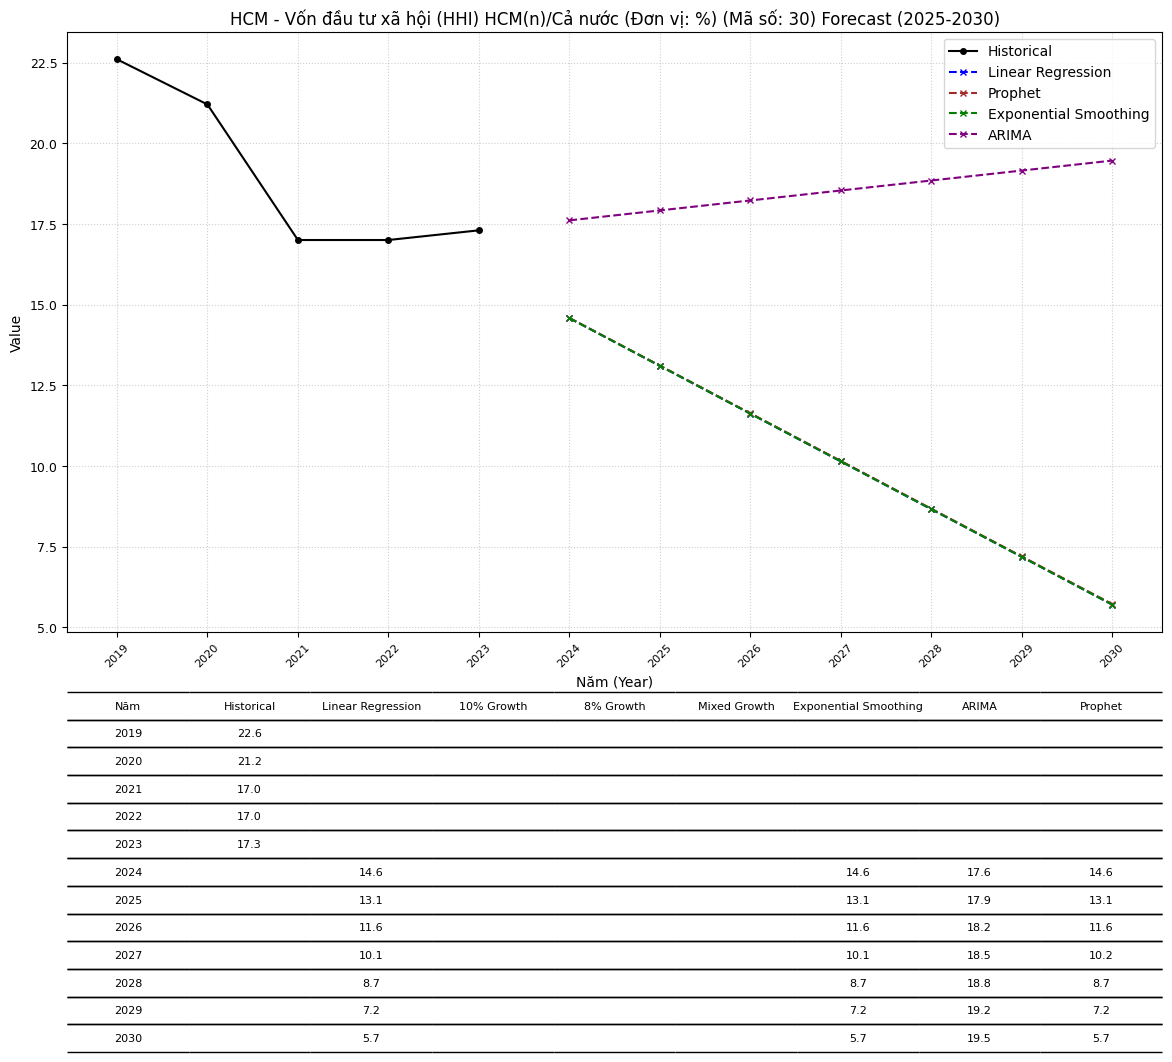

  Saved plot with table: output_plots_with_table\HCM_Số_dự_án_FDI_lũy_kế_HCM_New_Đơn_vị_Dự_án_Mã_số_31_with_table.png


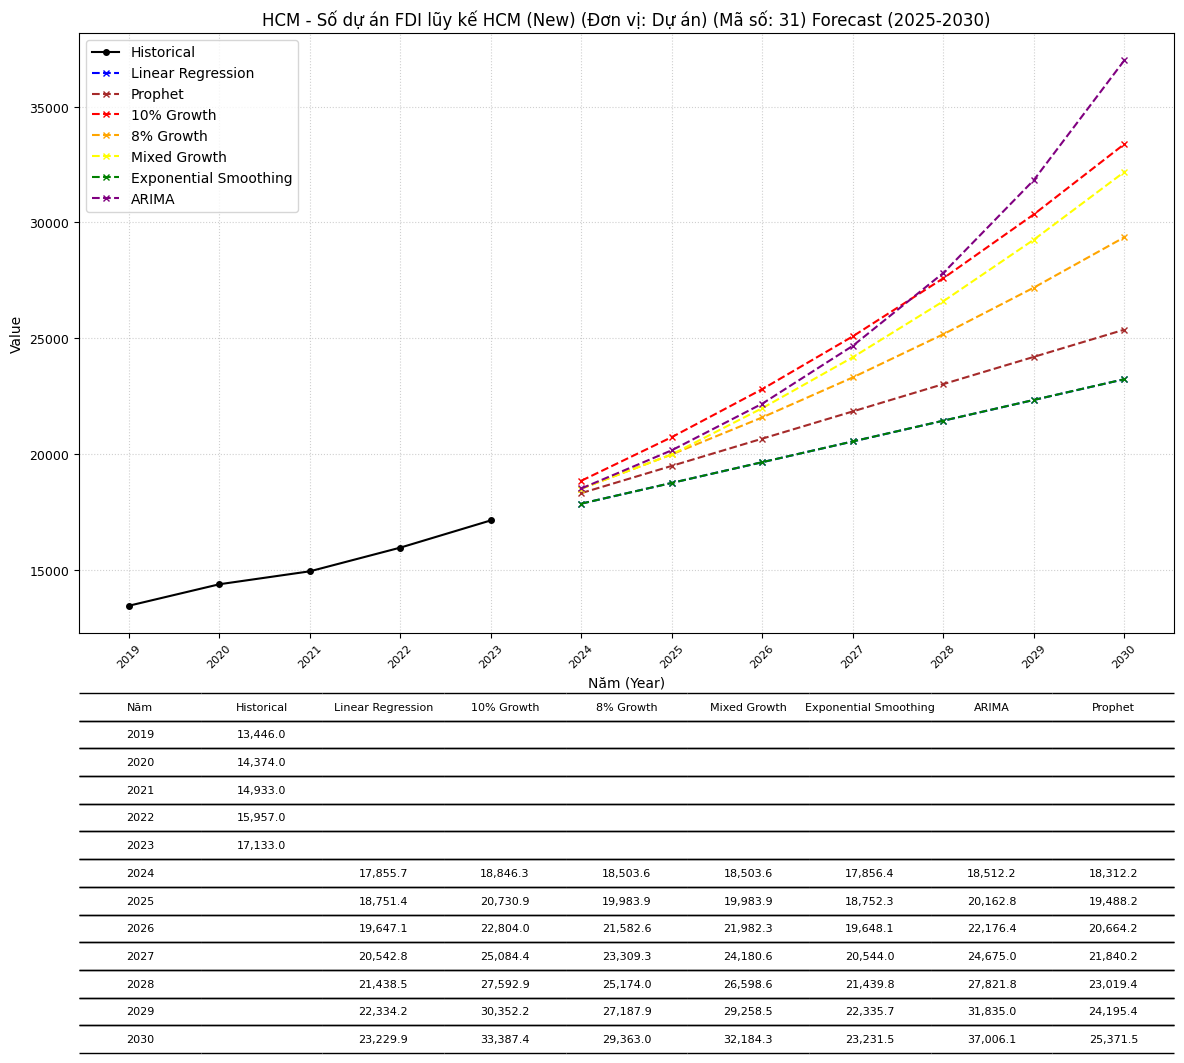

  Saved plot with table: output_plots_with_table\HCM_Số_dự_án_FDI_lũy_kế_Cả_nước_Đơn_vị_Dự_án_Mã_số_32_with_table.png


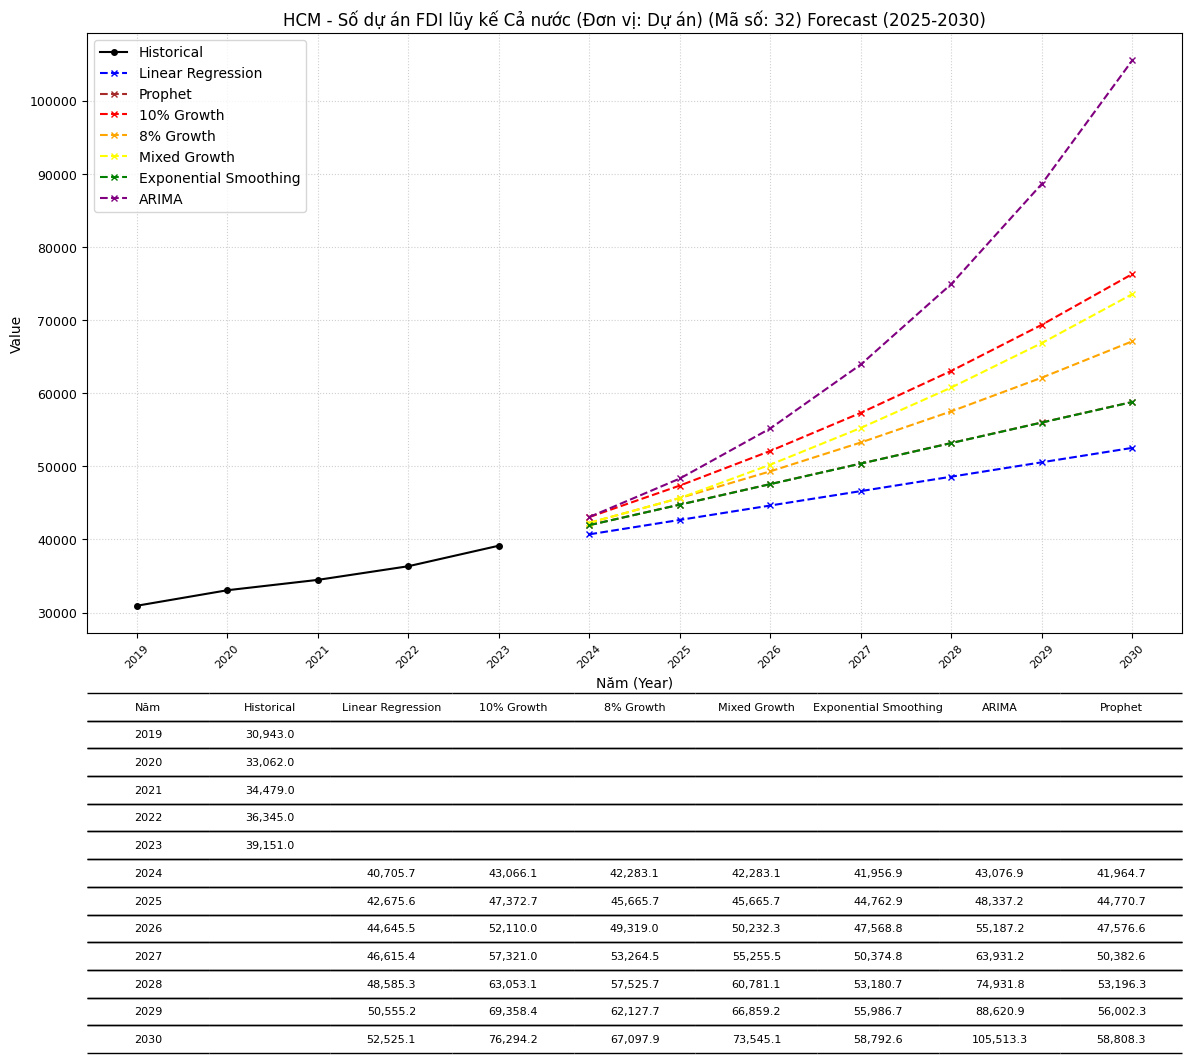

  Saved plot with table: output_plots_with_table\HCM_Số_dự_án_FDI_lũy_kế_HCMnCả_nước_Đơn_vị_%_Mã_số_33_with_table.png


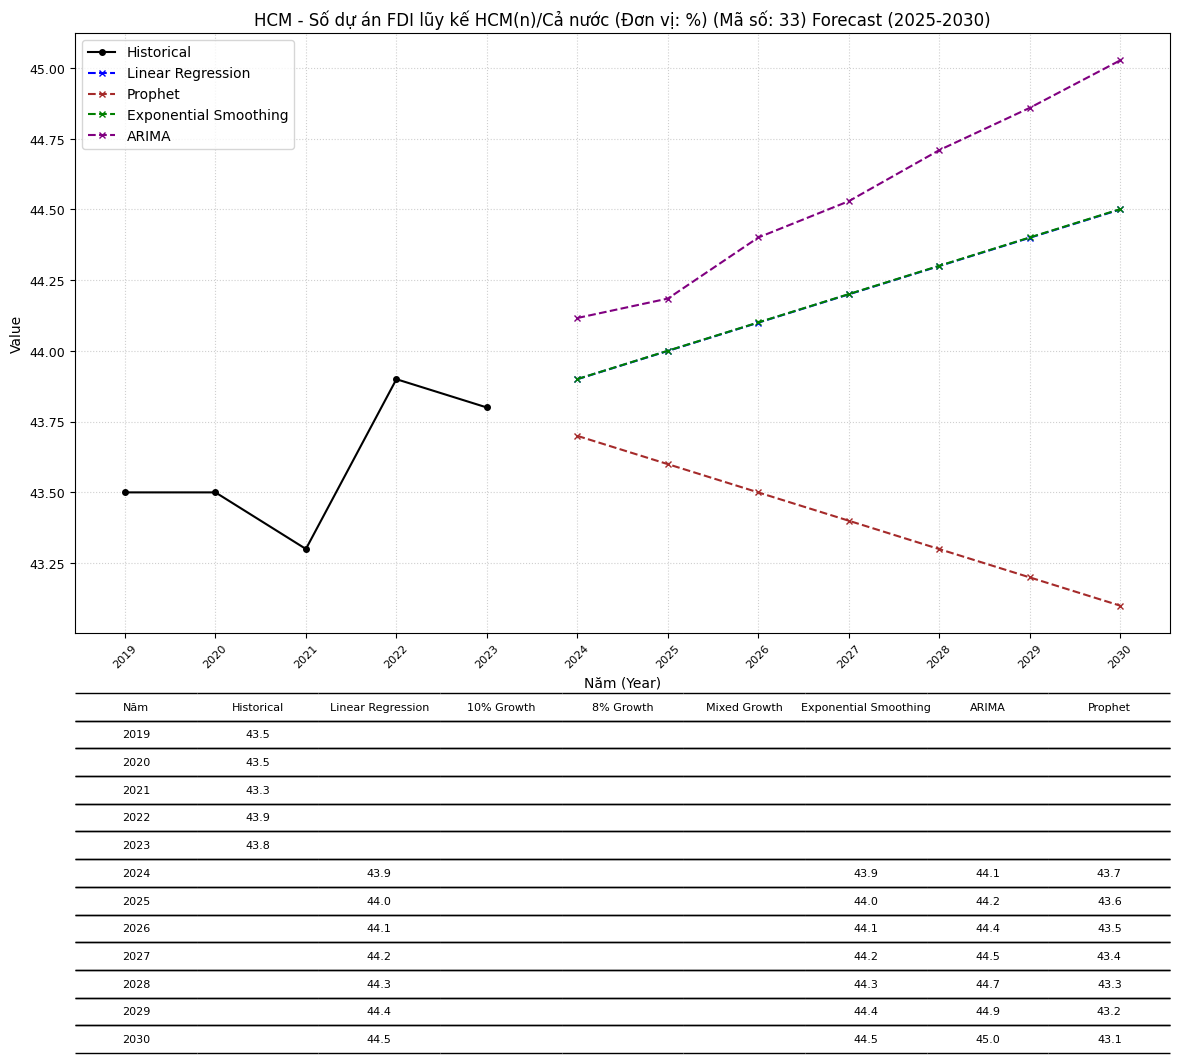

  Saved plot with table: output_plots_with_table\HCM_Vốn_FDI_lũy_kế_HCM_New_Đơn_vị_Triệu_USD_Mã_số_34_with_table.png


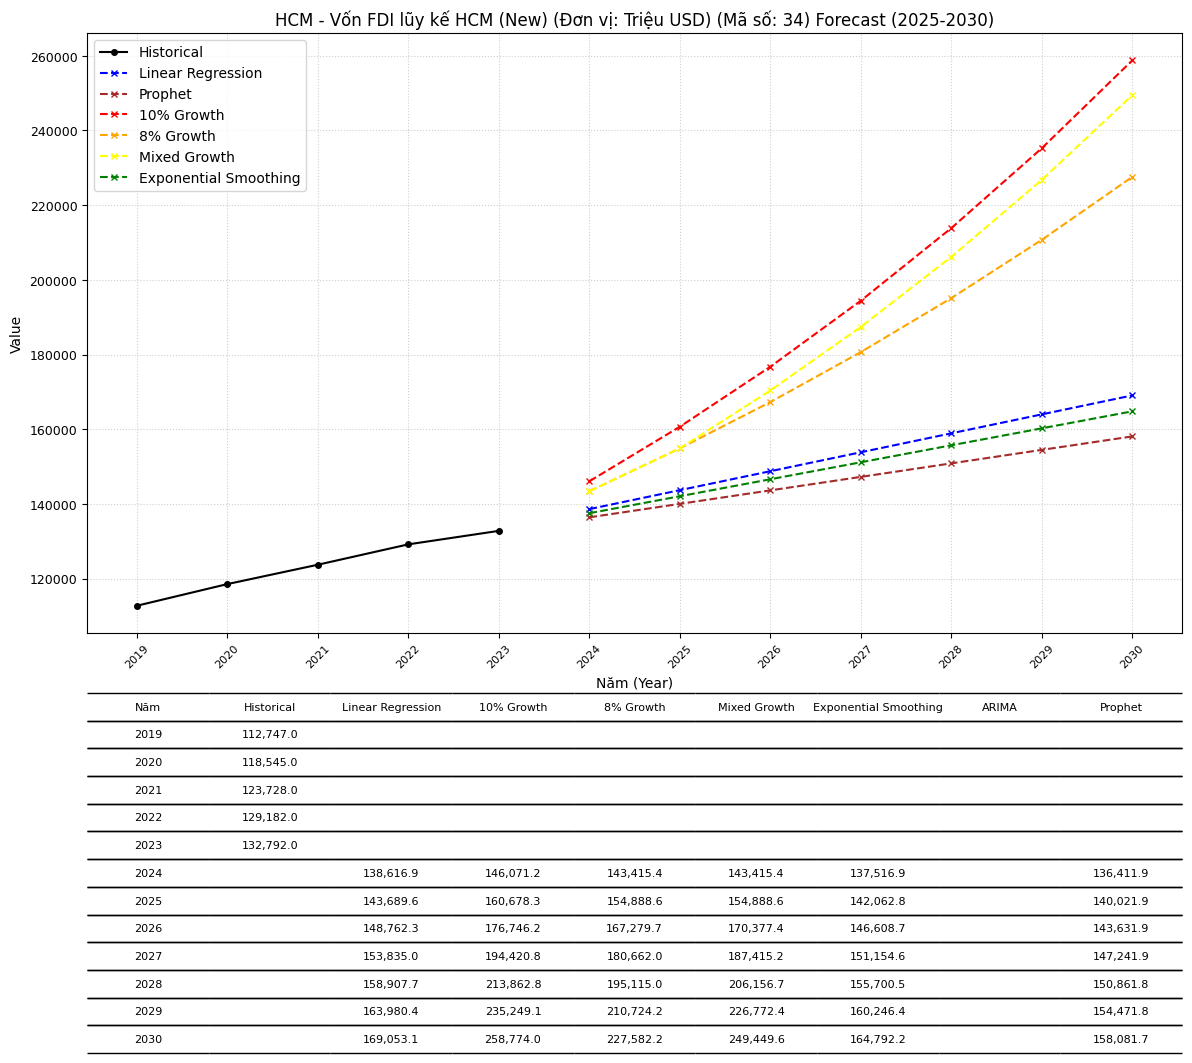

  Saved plot with table: output_plots_with_table\HCM_Vốn_FDI_lũy_kế_Cả_nước_Đơn_vị_Triệu_USD_Mã_số_35_with_table.png


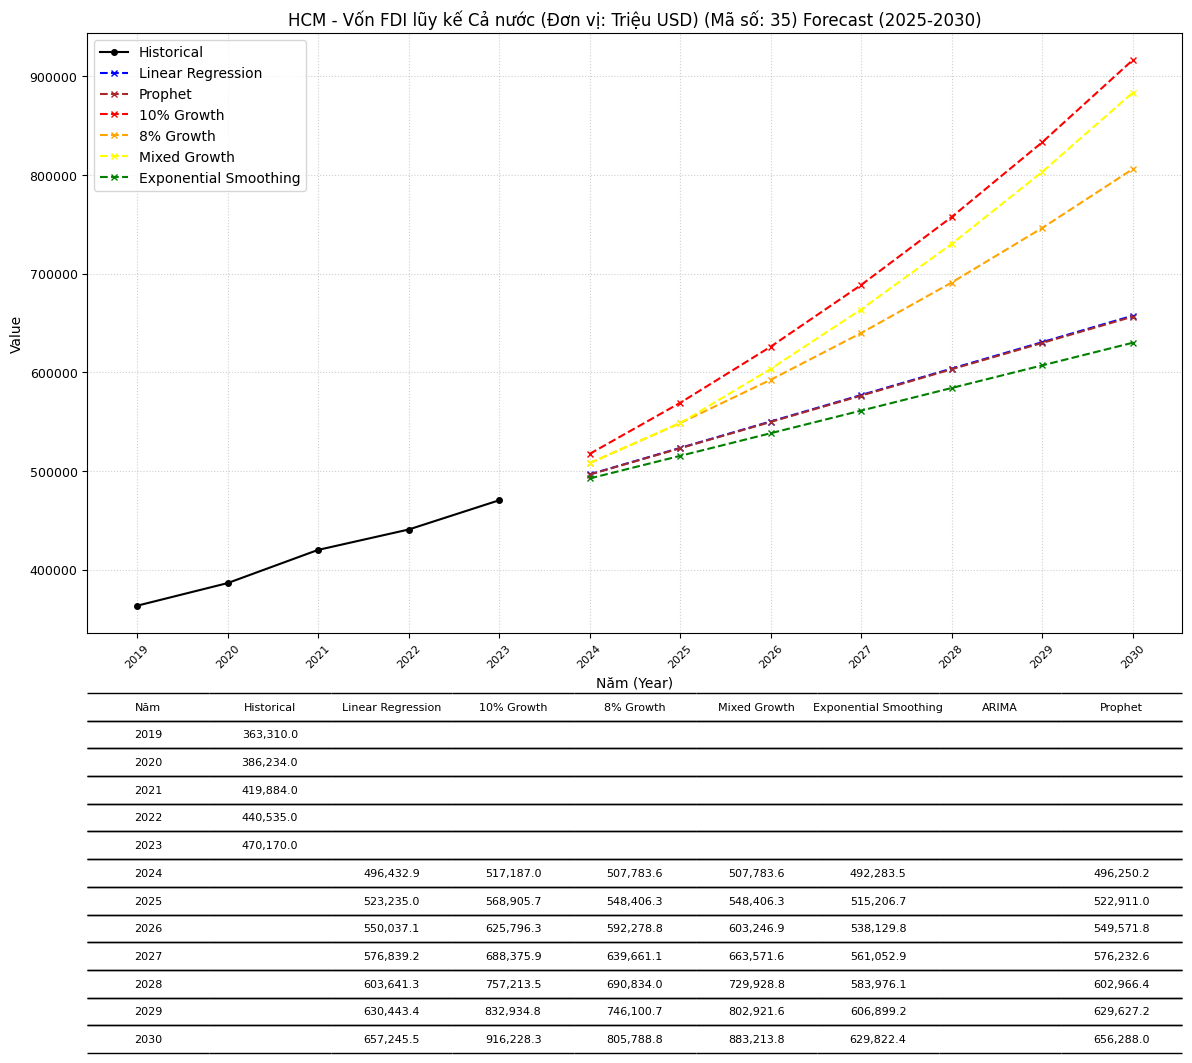

  Saved plot with table: output_plots_with_table\HCM_Vốn_FDI_lũy_kế_HCMnCả_nước_Đơn_vị_%_Mã_số_36_with_table.png


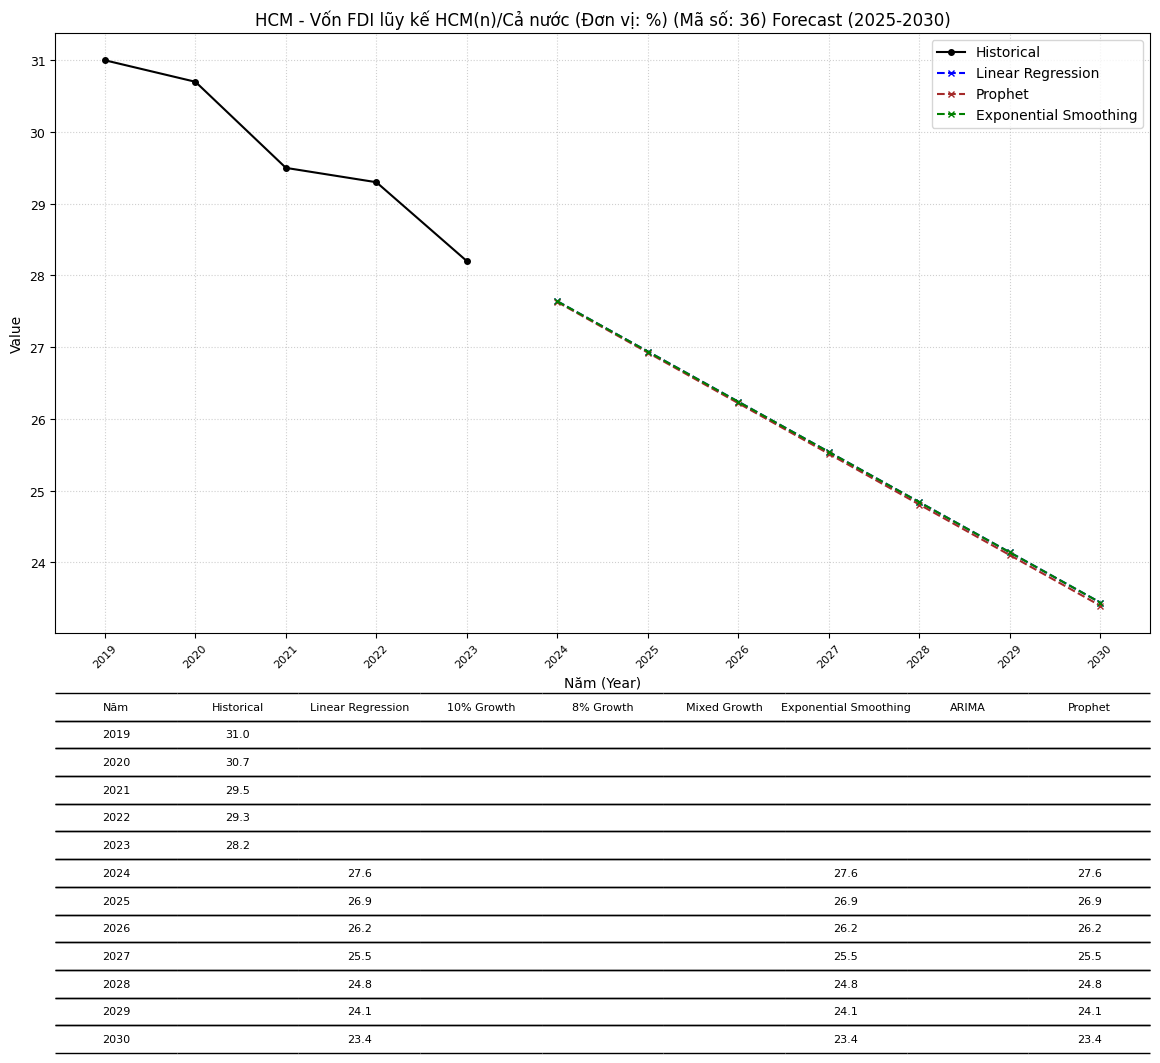

  Saved plot with table: output_plots_with_table\HCM_Số_DN_đang_hoạt_động_3112_HCM_New_Đơn_vị_DN_Mã_số_37_with_table.png


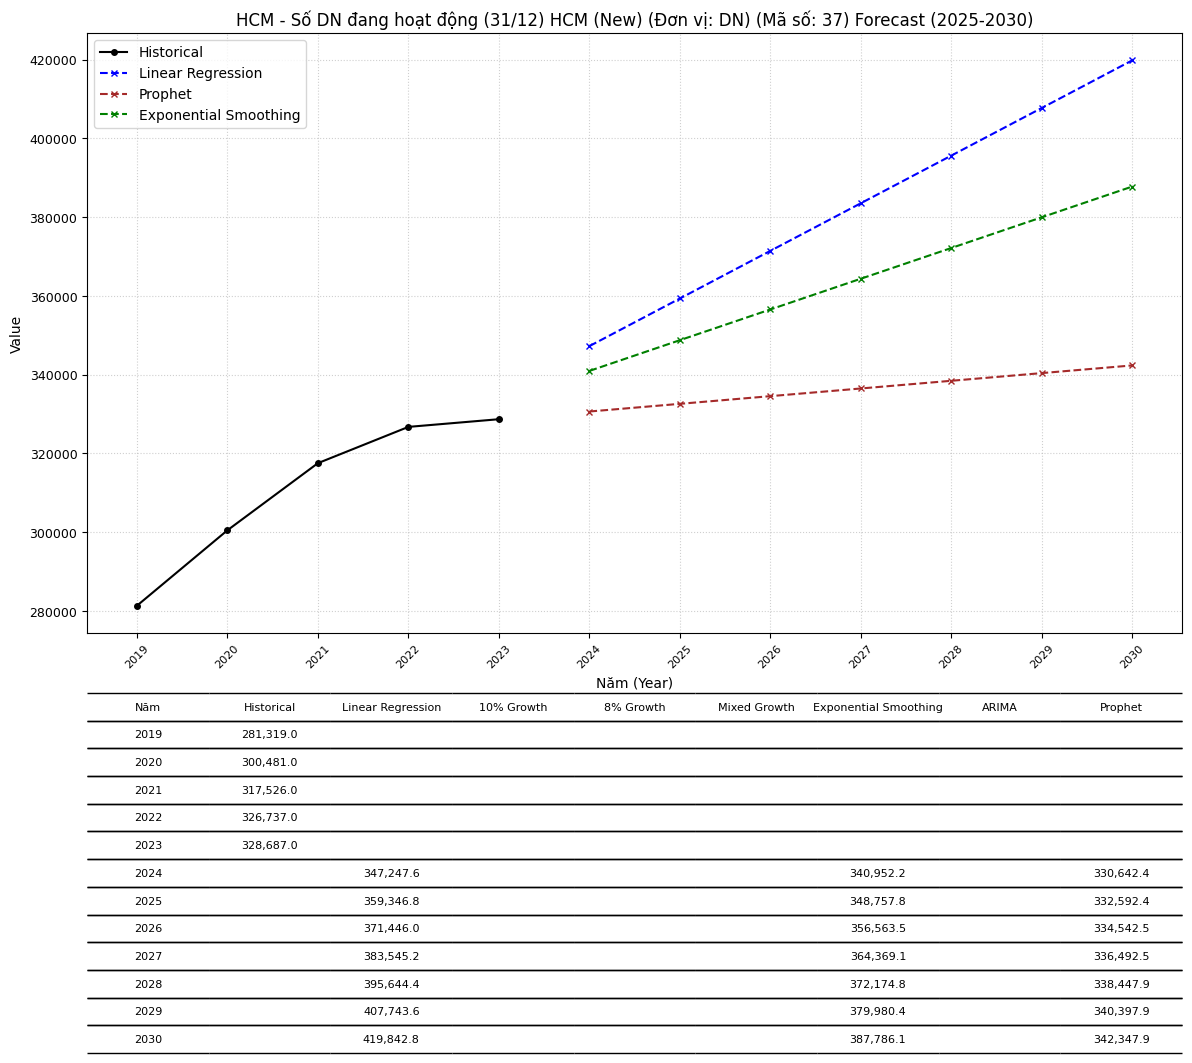

  Saved plot with table: output_plots_with_table\HCM_Số_DN_đang_hoạt_động_3112_Cả_nước_Đơn_vị_DN_Mã_số_38_with_table.png


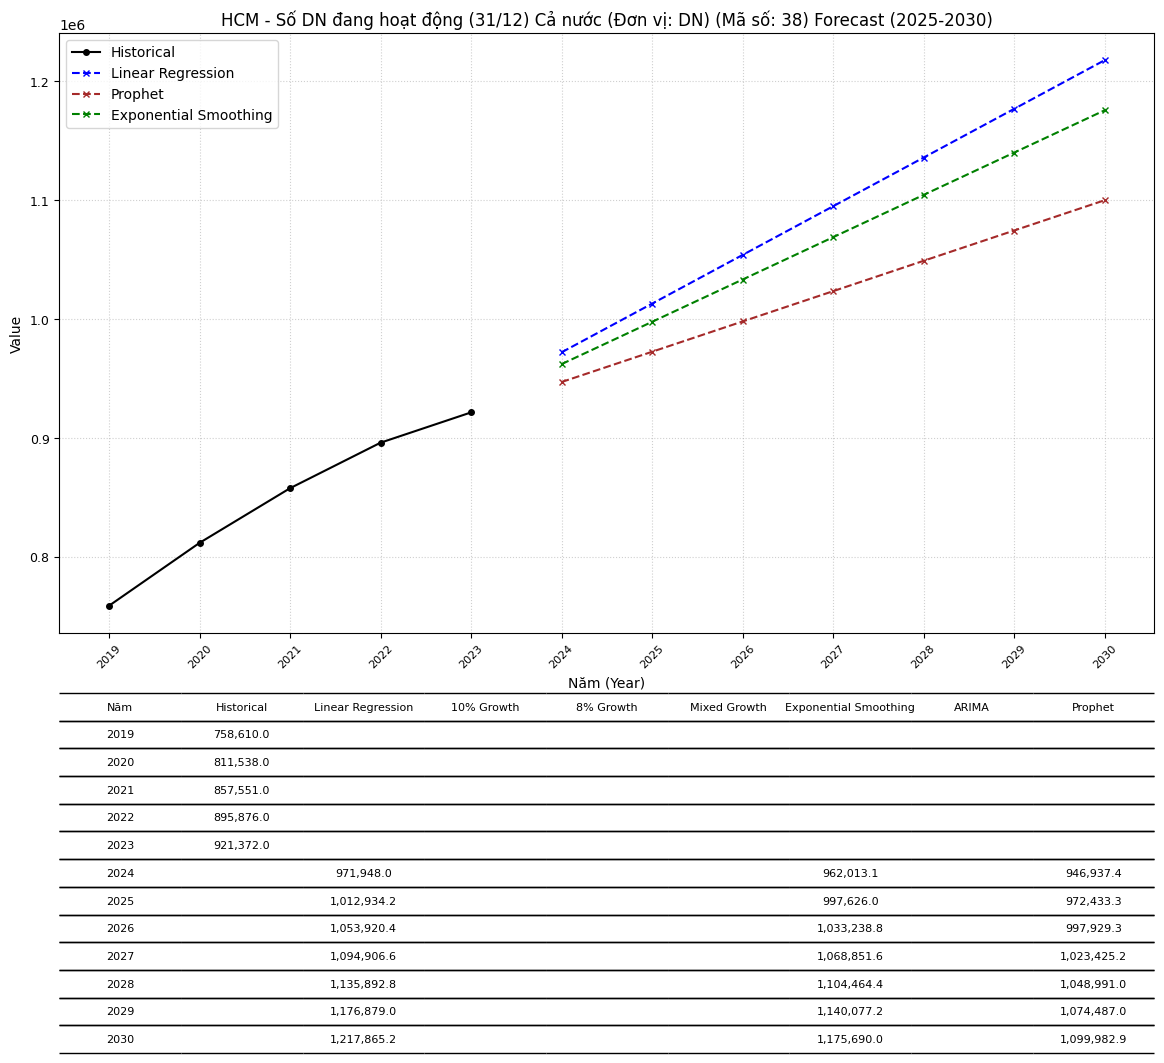

  Saved plot with table: output_plots_with_table\HCM_Số_DN_đang_hoạt_động_3112_HCMnCả_nước_Đơn_vị_%_Mã_số_39_with_table.png


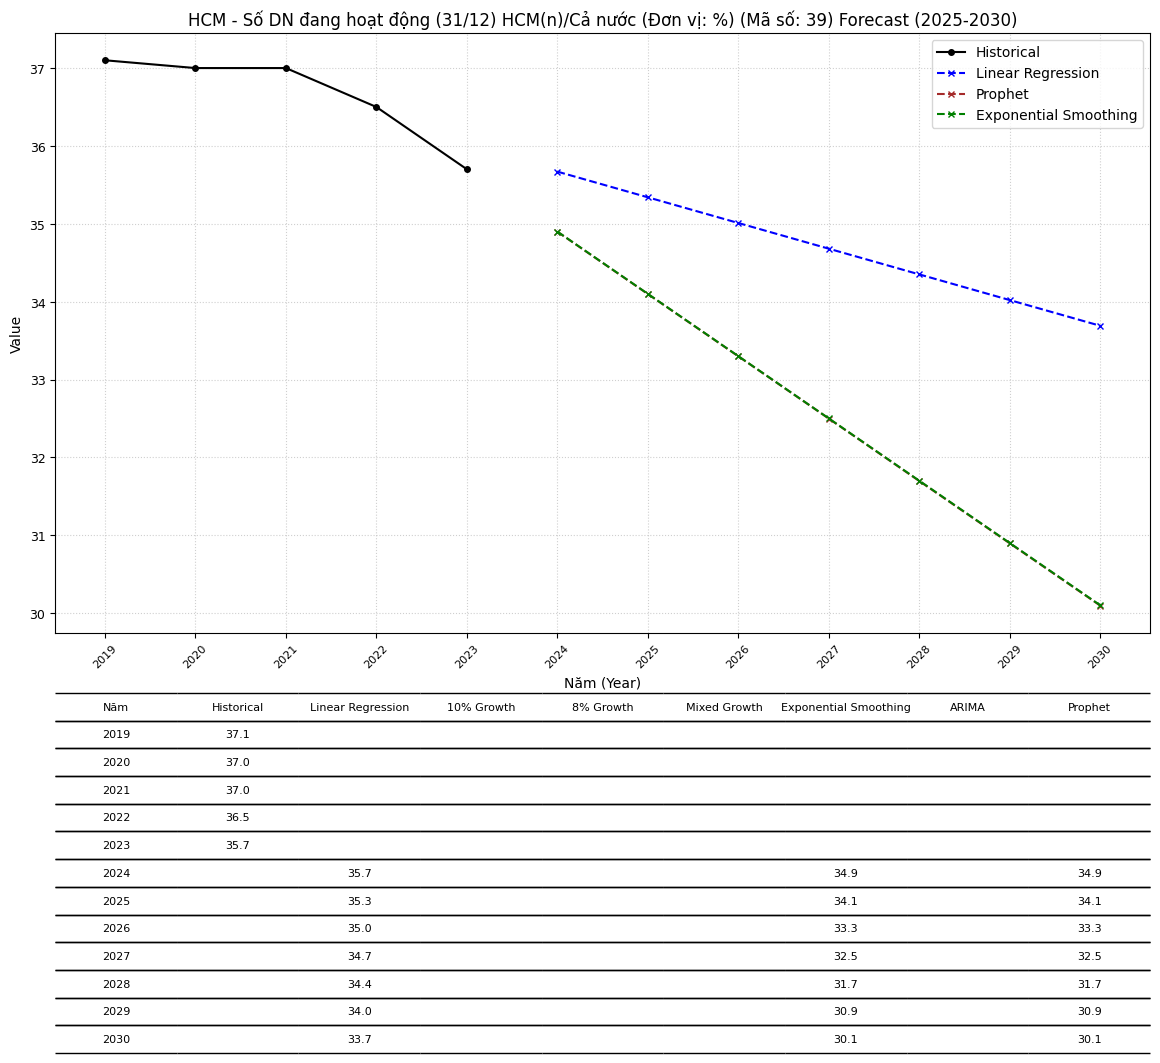

  Saved plot with table: output_plots_with_table\HCM_Số_hộ_cá_thể_HCM_New_Đơn_vị_Hộ_Mã_số_40_with_table.png


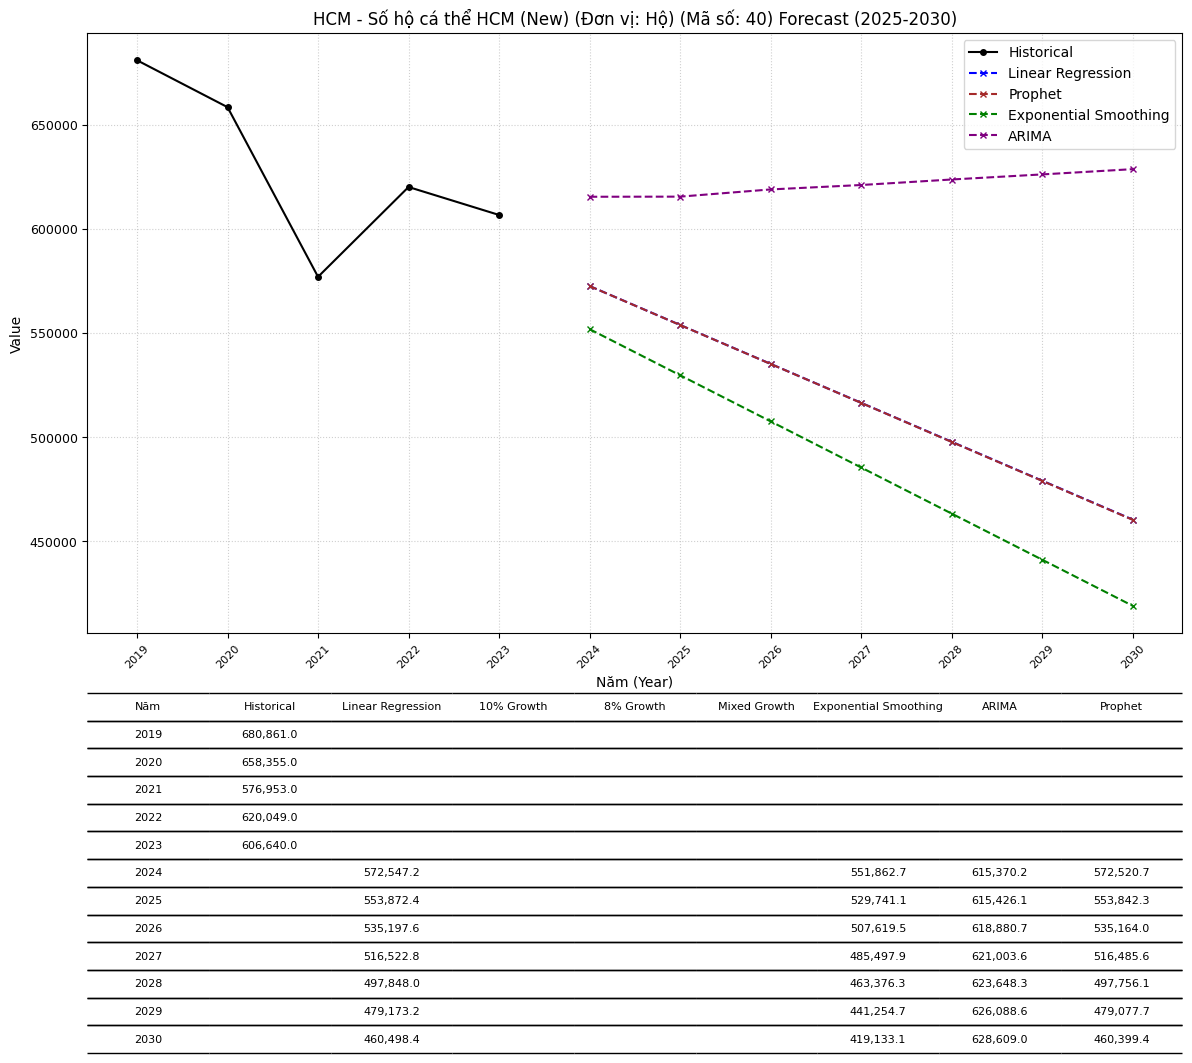

  Saved plot with table: output_plots_with_table\HCM_Số_hộ_cá_thể_Cả_nước_Đơn_vị_Hộ_Mã_số_41_with_table.png


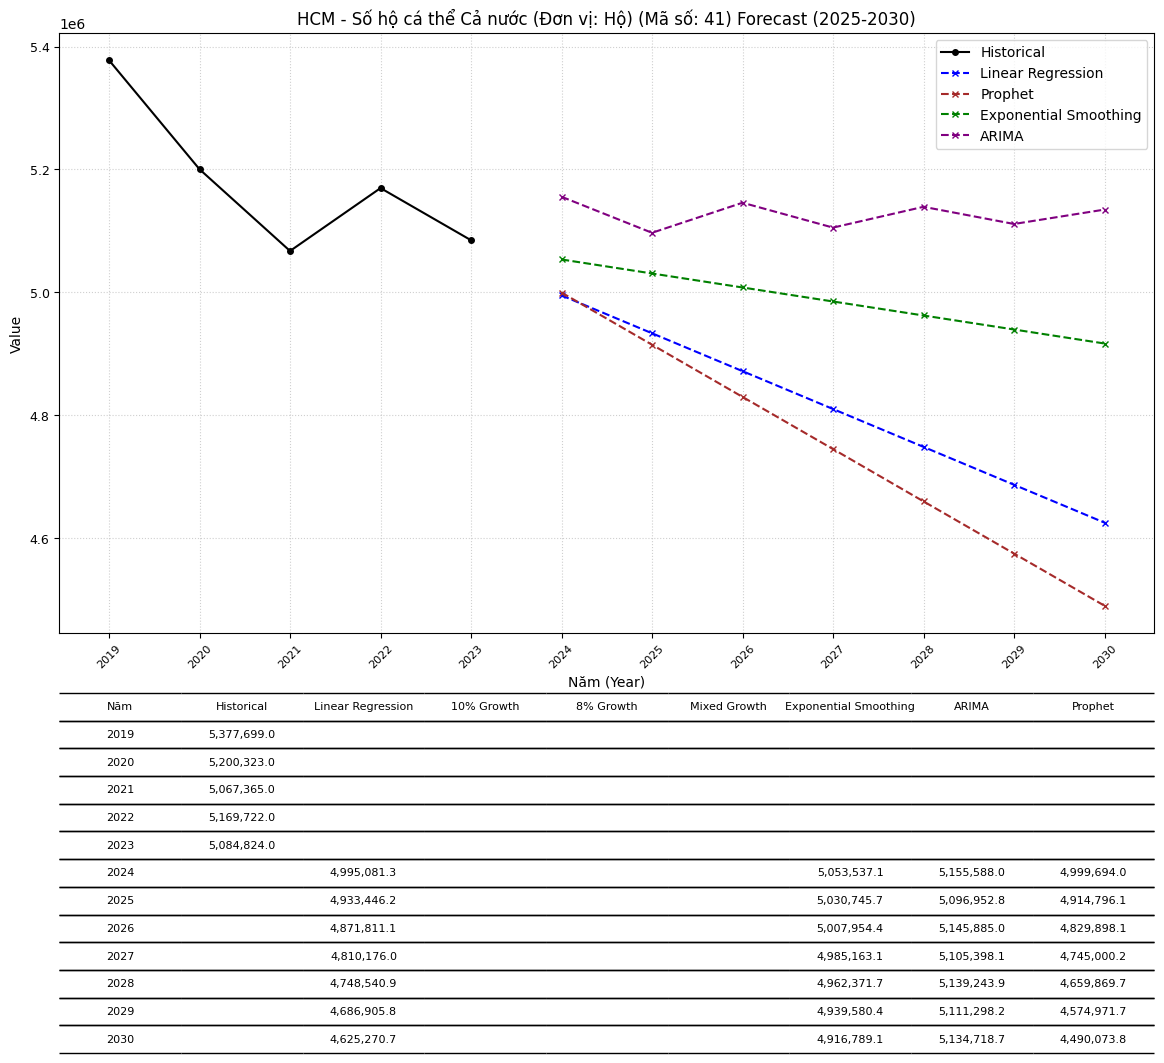

  Saved plot with table: output_plots_with_table\HCM_Số_hộ_cá_thể_HCMnCả_nước_Đơn_vị_%_Mã_số_42_with_table.png


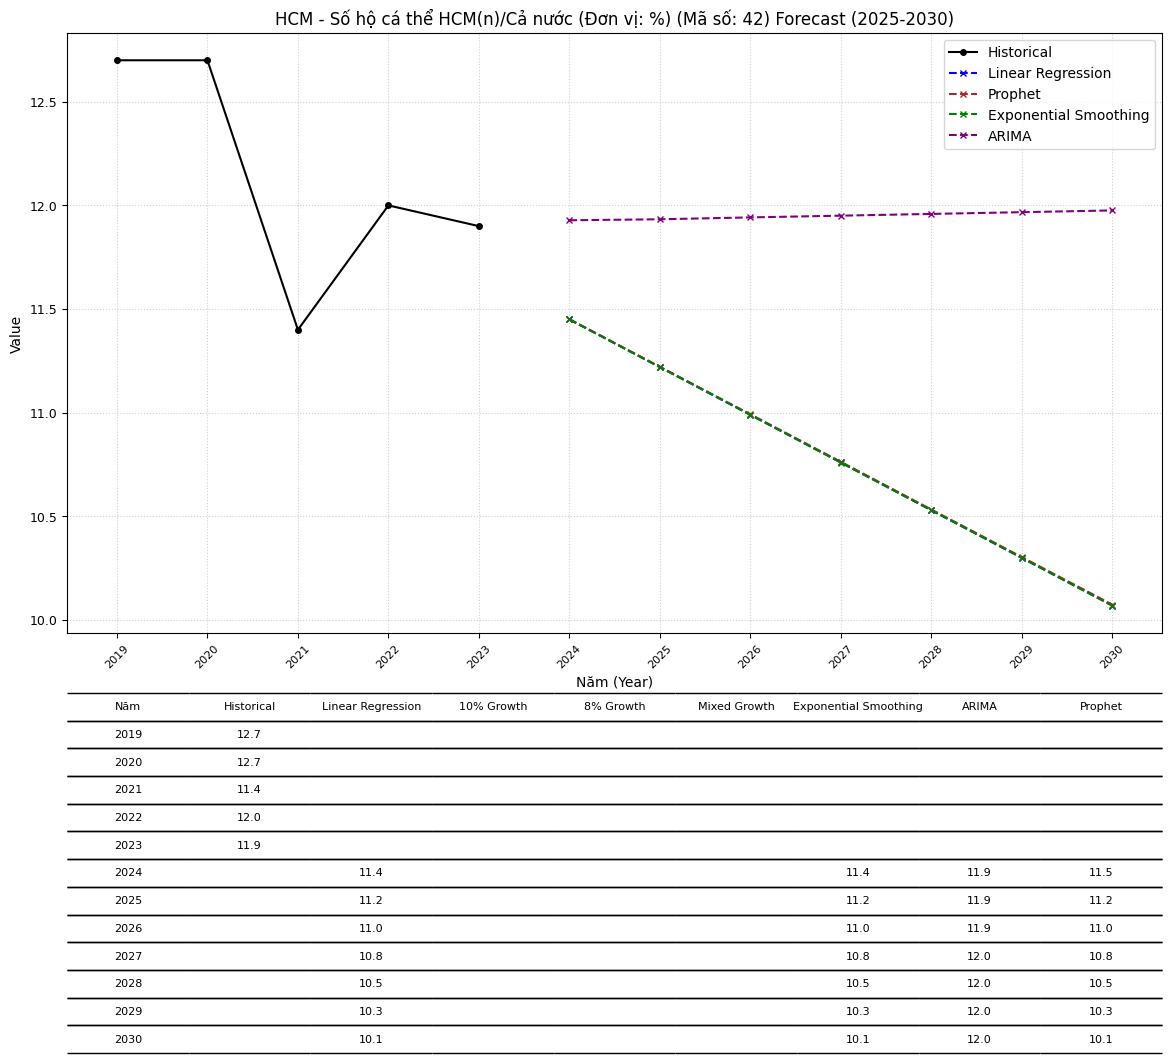

  Saved plot with table: output_plots_with_table\HCM_Doanh_thu_tổng_mức_bán_lẻ_hàng_hóa_và_dịch_vụ_HCM_New_Đơn_vị_Tỷ_đồng_Mã_số_43_with_table.png


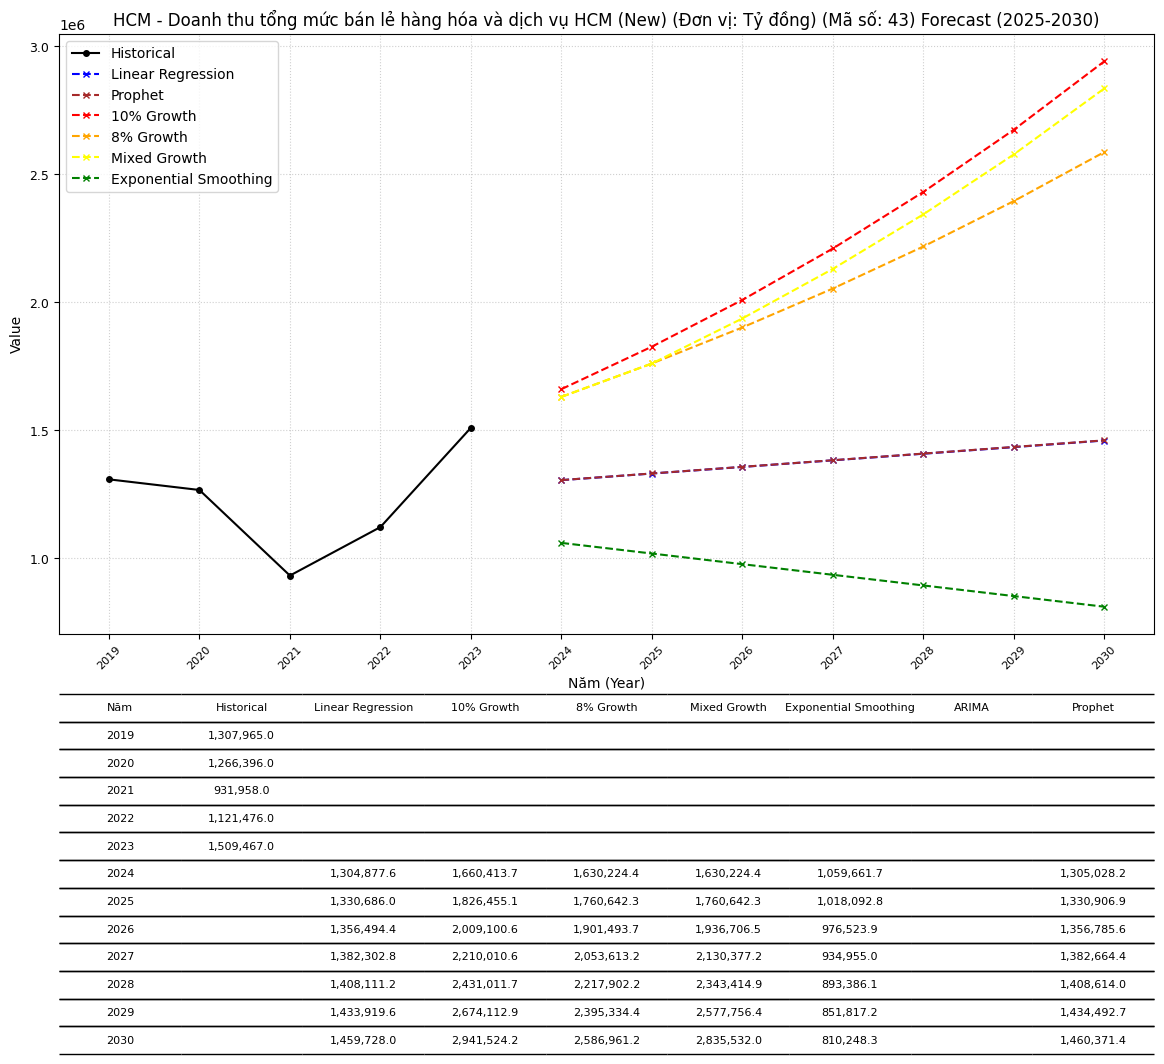

  Saved plot with table: output_plots_with_table\HCM_Doanh_thu_tổng_mức_bán_lẻ_hàng_hóa_và_dịch_vụ_Cả_nước_Đơn_vị_Tỷ_đồng_Mã_số_44_with_table.png


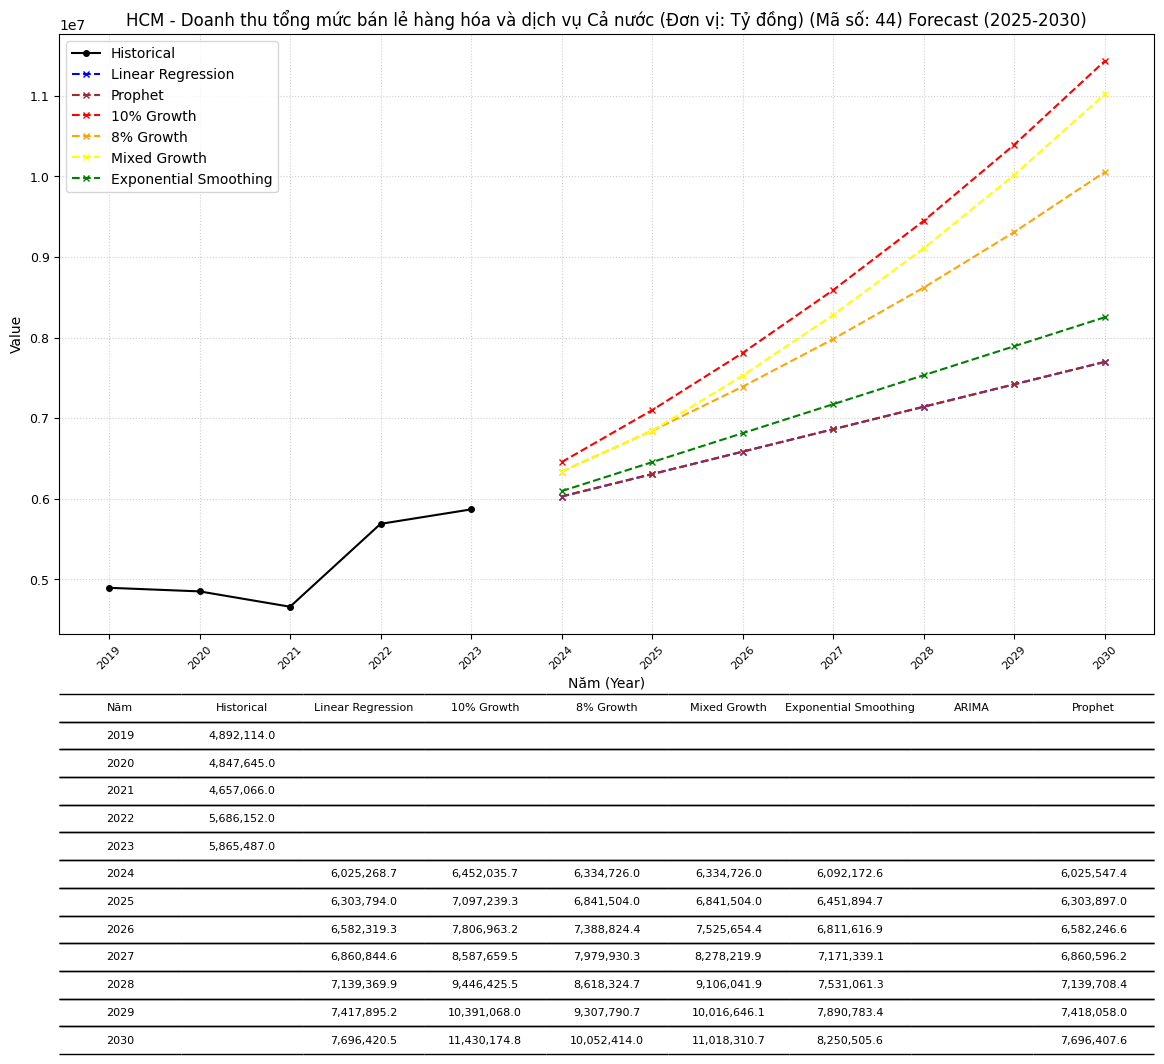

  Saved plot with table: output_plots_with_table\HCM_Doanh_thu_tổng_mức_bán_lẻ_hàng_hóa_và_dịch_vụ_HCMnCả_nước_Đơn_vị_%_Mã_số_45_with_table.png


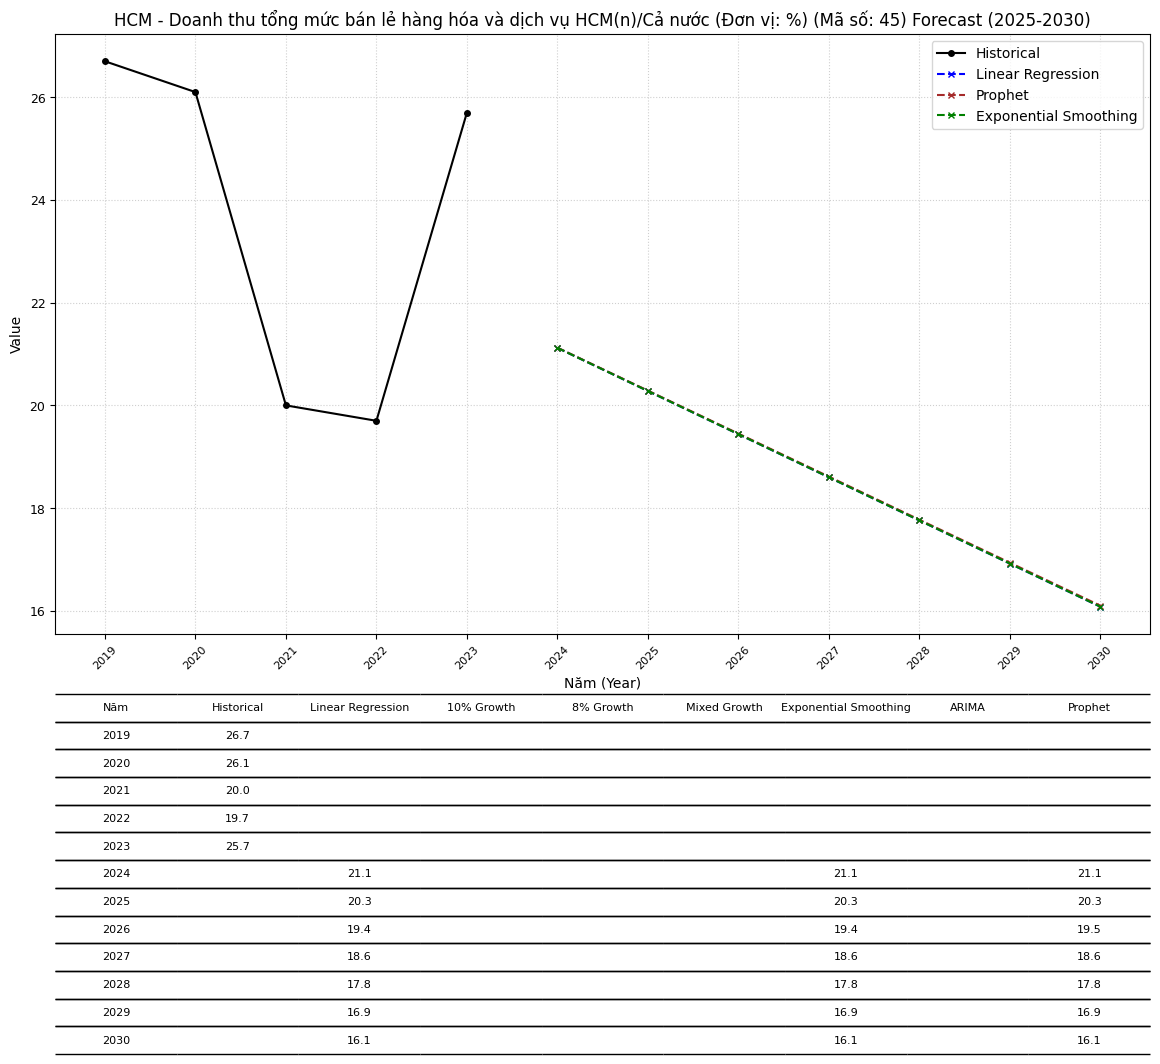

  Saved plot with table: output_plots_with_table\HCM_Giá_trị_xuất_khẩu_HCM_New_Đơn_vị_Triệu_USD_Mã_số_46_with_table.png


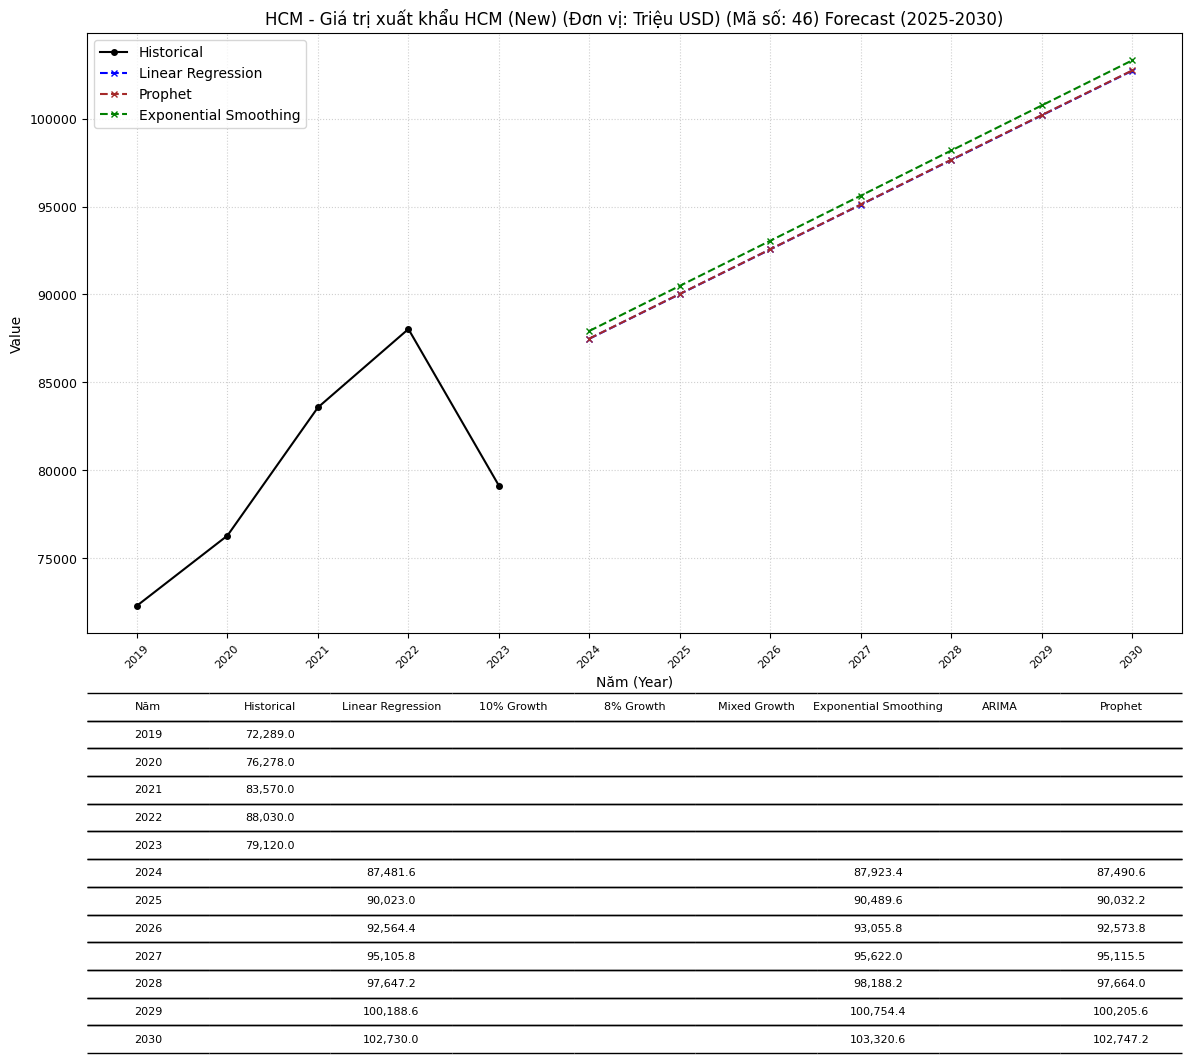

  Saved plot with table: output_plots_with_table\HCM_Giá_trị_xuất_khẩu_Cả_nước_Đơn_vị_Triệu_USD_Mã_số_47_with_table.png


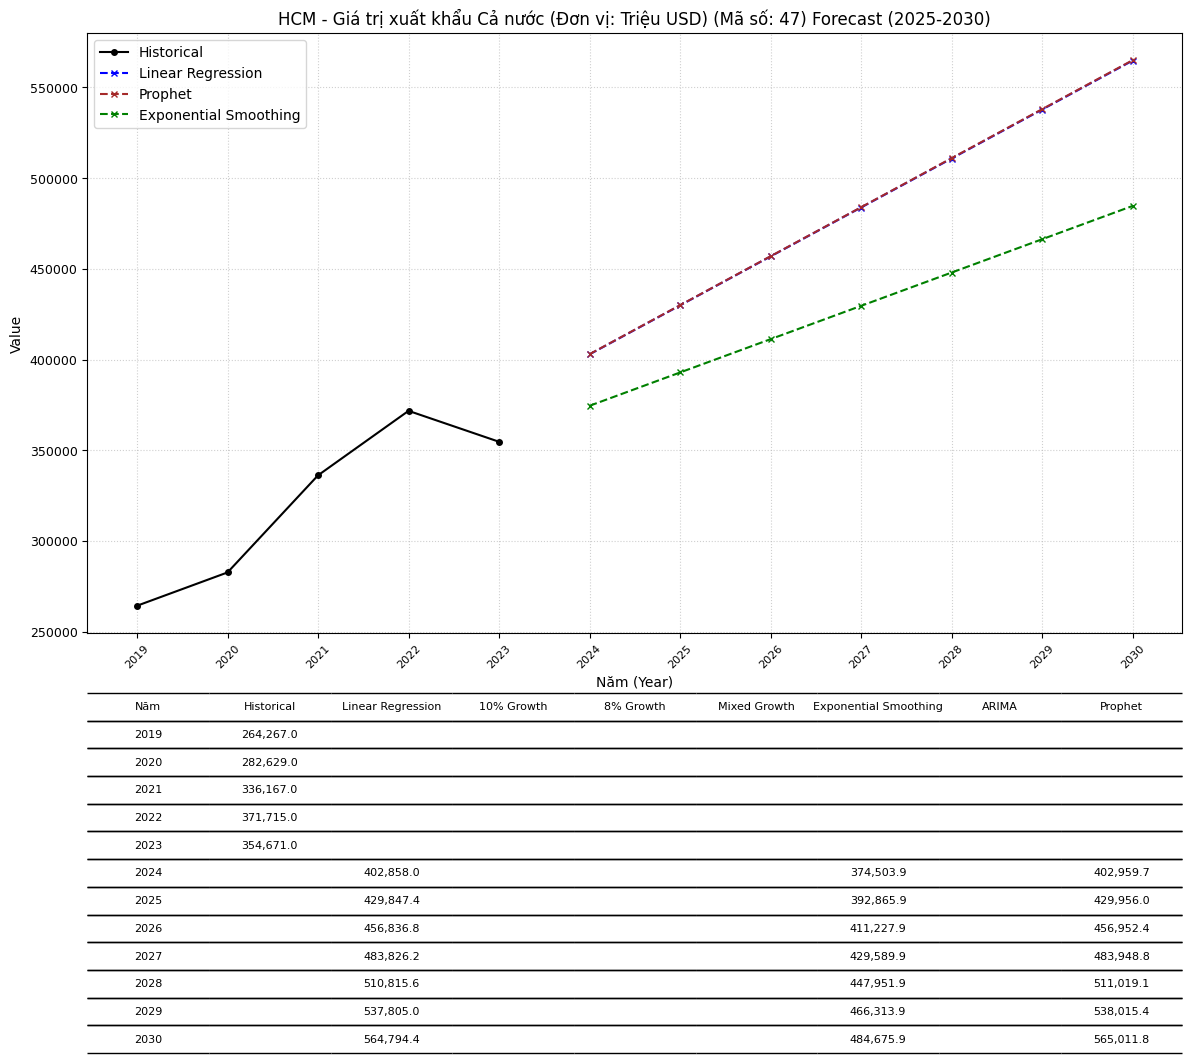

  Saved plot with table: output_plots_with_table\HCM_Giá_trị_xuất_khẩu_HCMnCả_nước_Đơn_vị_%_Mã_số_48_with_table.png


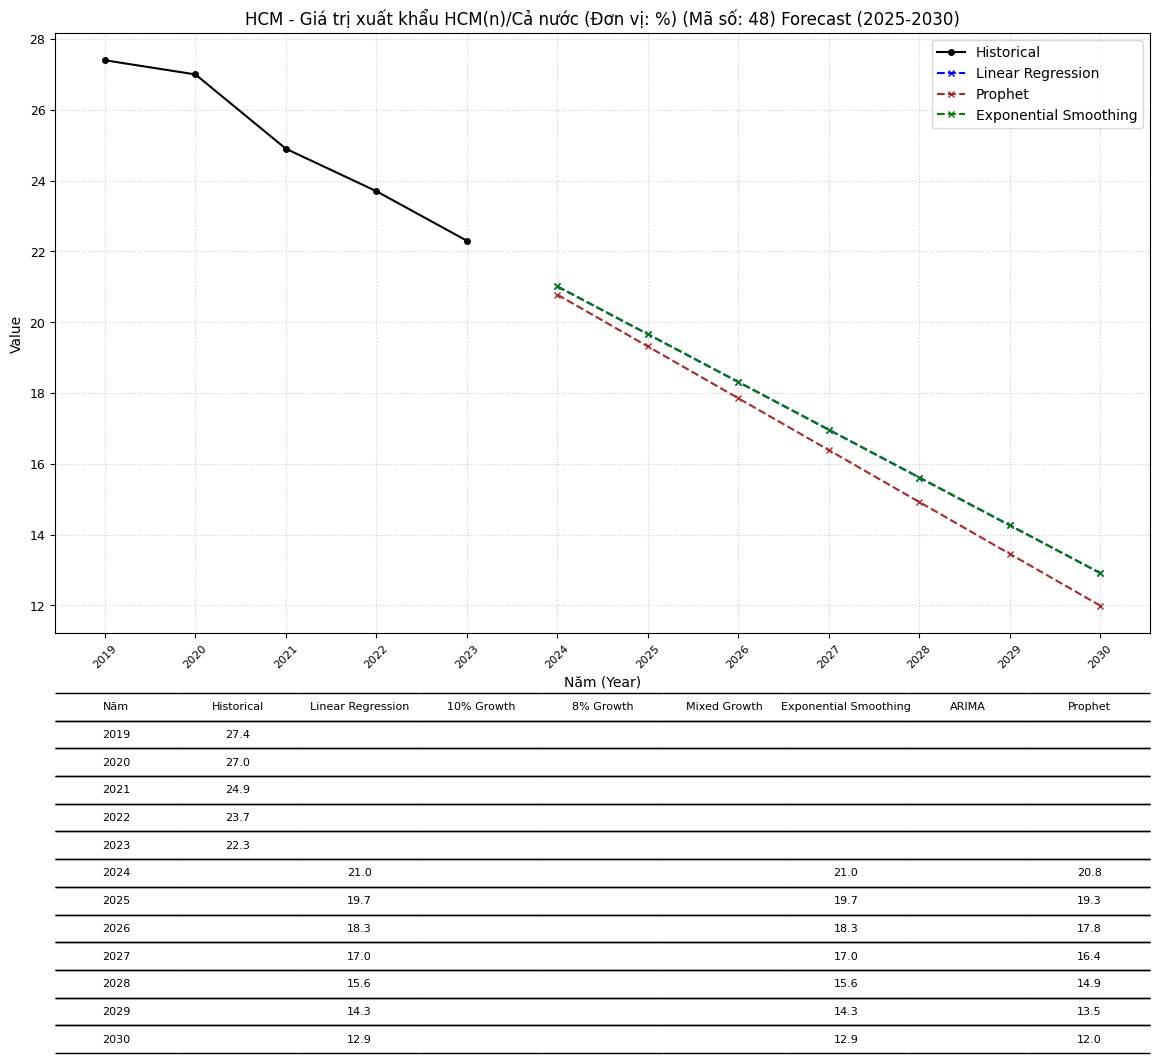


--- All visualizations with tables saved to 'output_plots_with_table' directory ---


In [37]:
for name, forecasts in all_forecasts.items():
    # Use the display name for titles/filenames
    # display_name = "Sáp nhập 3 tỉnh" if name == "Merged" else name
    display_name = "HCM"
    print(f"\nProcessing plots for: {display_name}")
    historical_df = historical_data_map[name] # Use original key for lookup

    for feature in features_to_forecast:
        # Check if the feature exists in both historical and forecast data
        if feature not in historical_df.columns:
             print(f"  Skipping plot for '{feature}' in '{display_name}' (historical data missing).")
             continue
        # Also check forecast data existence
        forecast_feature_exists = False
        if feature in forecasts.columns.get_level_values(0):
             forecast_feature_exists = True


        # Prepare data for the table
        hist_series = historical_df[feature].astype(float)
        table_data_list = [hist_series.rename('Historical')]

        if forecast_feature_exists:
            feature_forecasts = forecasts[feature]
            for model_name in models_for_table:
                 # Skip 'Historical' as it's already added
                 if model_name == 'Historical':
                     continue
                 if model_name in feature_forecasts.columns:
                     table_data_list.append(feature_forecasts[model_name].astype(float).rename(model_name))
                 else:
                     # Add an empty series if model forecast doesn't exist
                     table_data_list.append(pd.Series(name=model_name, dtype=float))

            # Combine all series into a DataFrame, filling NaNs for non-overlapping years
            # Only include years present in historical or any forecast
            combined_index = hist_series.index.union(feature_forecasts.index)
            table_df = pd.concat(table_data_list, axis=1).reindex(combined_index).sort_index()
            table_df.index.name = 'Năm'
            table_df = table_df.applymap(lambda x: f'{x:,.1f}' if pd.notna(x) else '') # Format numbers
            table_df = table_df.reset_index() # Make 'Năm' a column for the table function
        else:
            # If no forecast data, just format historical for the table
            print(f"  Feature '{feature}' not found in forecast data for '{display_name}'. Table will only show historical.")
            table_df = hist_series.reset_index()
            table_df.columns = ['Năm', 'Historical']
            table_df['Historical'] = table_df['Historical'].apply(lambda x: f'{x:,.1f}' if pd.notna(x) else '')


        # Start plotting
        # Adjust figsize: slightly wider, taller to give table more room
        fig, ax = plt.subplots(figsize=(15, 12)) # Use fig, ax for easier table positioning

        # --- Plotting Lines and Points (No text labels) ---
        hist_series_plot = hist_series.dropna()
        if not hist_series_plot.empty:
            ax.plot(hist_series_plot.index, hist_series_plot, label='Historical', marker='o', color=colors['Historical'], markersize=4)
            # Removed: ax.text() for historical points

        if forecast_feature_exists:
             feature_forecasts_plot = forecasts[feature]
             for model_name in feature_forecasts_plot.columns:
                 forecast_series_plot = feature_forecasts_plot[model_name].astype(float).dropna()
                 if not forecast_series_plot.empty:
                     color = colors.get(model_name, 'gray')
                     ax.plot(forecast_series_plot.index, forecast_series_plot, label=model_name, marker='x', linestyle='--', color=color, markersize=4)
                     # Removed: ax.text() for forecast points
        # --- End Plotting Lines and Points ---


        ax.set_title(f'{display_name} - {feature} Forecast (2025-2030)')
        ax.set_xlabel('Năm (Year)')
        ax.set_ylabel('Value')
        # Move legend to upper right to avoid potential overlap with steep lines
        ax.legend()
        ax.grid(True, linestyle=':', alpha=0.6)
        # Removed: ax.margins(y=0.1)

        # Adjust x-axis ticks
        all_years_indices = table_df['Năm'].tolist() # Get years from table data
        all_years = sorted(list(set(all_years_indices)))
        plt.xticks(all_years, rotation=45) # Set ticks explicitly to all years in the table
        # ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=len(all_years), integer=True)) # Alternative ticker approach
        ax.tick_params(axis='x', labelsize=8) # Smaller x-tick labels
        ax.tick_params(axis='y', labelsize=9)


        # --- Add Table ---
        if table_df is not None:
             # Adjust plot area: make bottom margin larger, top margin slightly smaller
             plt.subplots_adjust(left=0.2, bottom=0.35, right=0.93, top=0.85)

             # Filter table_df to only include relevant columns for display if needed
             display_cols = ['Năm'] + [col for col in models_for_table if col in table_df.columns]
             table_display_df = table_df[display_cols]


             # Add the table
             the_table = ax.table(cellText=table_display_df.values,
                                  colLabels=table_display_df.columns,
                                  loc='bottom', # Position table below the axes
                                  cellLoc='center',
                                  edges='horizontal',
                                  # Adjust bbox: [left, bottom, width, height]
                                  # bottom value (-0.6) pushes it further down, height (0.4) makes it taller
                                  bbox=[0.0, -0.7, 1.0, 0.6]
                                )

             the_table.auto_set_font_size(False)
             the_table.set_fontsize(8)
             the_table.scale(1, 1.1) # Adjust scale slightly
        else:
             plt.tight_layout() # Use tight layout if no table


        # Create a clean filename using display_name
        clean_feature_name = re.sub(r'[\\/*?:"<>|()]', '', feature)
        clean_feature_name = clean_feature_name.replace(' ', '_').replace('.', '')
        # Use display_name (which might contain spaces) cleaned for filename
        clean_name = display_name.replace(' ', '_')
        filename = f"{clean_name}_{clean_feature_name}_with_table.png"
        filepath = os.path.join(output_dir, filename)

        # Save the figure
        try:
             plt.savefig(filepath, dpi=150, bbox_inches='tight') # Use bbox_inches='tight' to help fit table
             print(f"  Saved plot with table: {filepath}")
        except Exception as e:
             print(f"  Error saving plot {filepath}: {e}")
        plt.show()
        plt.close(fig) # Close the figure explicitly

print(f"\n--- All visualizations with tables saved to '{output_dir}' directory ---")

In [38]:
print("\n--- Exporting Forecast Results to Excel ---")

# Define the output Excel filename
excel_filename = 'forecast_results.xlsx'

try:
    # Create an Excel writer object
    with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
        for name, forecasts_df in all_forecasts.items():
            # Clean the name for the sheet title (Excel sheet names have limitations)
            # Replace invalid chars, limit length (optional but good practice)
            clean_sheet_name = re.sub(r'[\\/*?:"<>|\[\]]', '', name) # Remove invalid Excel sheet chars
            clean_sheet_name = clean_sheet_name[:30] # Limit sheet name length (Excel limit is 31)

            display_name = "Sáp nhập 3 tỉnh" if name == "Merged" else clean_sheet_name

            print(f"  Writing sheet: {display_name}")

            # Prepare DataFrame for export: Reset index to include 'Năm' as a column
            df_to_export = forecasts_df.copy()
            # Flatten MultiIndex columns for easier reading in Excel (optional but helpful)
            # Format: 'Feature - Model'
            df_to_export.columns = [' - '.join(col).strip() for col in df_to_export.columns.values]
            df_to_export = df_to_export.reset_index().rename(columns={'index': 'Năm'})


            # Write the dataframe to a specific sheet
            df_to_export.to_excel(writer, sheet_name=display_name, index=False)

    print(f"\n--- Forecast results successfully exported to '{excel_filename}' ---")

except Exception as e:
    print(f"\nError exporting forecasts to Excel: {e}")
    # You might need to install the engine: pip install openpyxl


--- Exporting Forecast Results to Excel ---
  Writing sheet: HCM

--- Forecast results successfully exported to 'forecast_results.xlsx' ---
